# 1. Análisis Exploratorio de los Datos


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('Consulta.csv')

## 1.1 Resumen General

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CODE             50000 non-null  object
 1   PRODUCTO         50000 non-null  object
 2   TIPO_CARROCERIA  50000 non-null  object
 3   COMBUSTIBLE      50000 non-null  object
 4   Potencia         50000 non-null  object
 5   TRANS            50000 non-null  object
 6   FORMA_PAGO       50000 non-null  object
 7   ESTADO_CIVIL     49221 non-null  object
 8   GENERO           49244 non-null  object
 9   OcupaciOn        50000 non-null  object
 10  PROVINCIA        50000 non-null  object
 11  Campanna1        50000 non-null  object
 12  Campanna2        50000 non-null  object
 13  Campanna3        50000 non-null  object
 14  Zona_Renta       38557 non-null  object
 15  REV_Garantia     50000 non-null  object
 16  Averia_grave     50000 non-null  object
 17  QUEJA_CAC        50000 non-null

In [ ]:
# Ver las primeras 5 filas completas
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.max_colwidth', None)  # No trunca el contenido de las celdas
df.head(5)

CODE PRODUCTO TIPO_CARROCERIA COMBUSTIBLE Potencia TRANS        FORMA_PAGO  \
0  CLI1        A           TIPO1      FUEL 1     Baja     M           Contado   
1  CLI2        A           TIPO1      FUEL 1     Baja     M           Contado   
2  CLI3        A           TIPO1      FUEL 1     Baja     M             Otros   
3  CLI4        A           TIPO1      FUEL 1     Baja     M  Financiera Marca   
4  CLI5        A           TIPO1      FUEL 1     Baja     M  Financiera Marca   

  ESTADO_CIVIL GENERO    OcupaciOn               PROVINCIA Campanna1  \
0       CASADO      M      Empresa                Asturias        SI   
1       CASADO      F      Empresa                  Toledo        NO   
2       CASADO      M      Empresa                  Lerida        NO   
3       CASADO      F      Empresa                  Madrid        SI   
4       CASADO      F  Funcionario  Santa Cruz de Tenerife        SI   

  Campanna2 Campanna3  Zona_Renta REV_Garantia      Averia_grave QUEJA_CAC  \
0        NO        NO  Medio-Bajo      NO DATA  Averia muy grave        SI   
1        NO        NO  Medio-Bajo           SI                No        NO   
2        NO        NO       Medio      NO DATA                No        NO   
3        NO        NO       Medio           SI  Averia muy grave        SI   
4        NO        SI        Alto      NO DATA                No        NO   

   EDAD_COCHE  COSTE_VENTA  km_anno  Mas_1_coche  Revisiones  Edad_Cliente  \
0         208         2892        0        False           2            18   
1         245         1376     7187        False           2            53   
2         251         1376        0         True           4            21   
3         243         2015     7256         True           4            48   
4          23         1818        0         True           3            21   

   Tiempo  
0       0  
1       0  
2       3  
3       5  
4       3

In [7]:
df.describe()

EDAD_COCHE   COSTE_VENTA        km_anno    Revisiones  Edad_Cliente  \
count  50000.000000  50000.000000   50000.000000  50000.000000  50000.000000   
mean     472.360860   2536.918340   11740.855280      3.553600     47.249460   
std      310.071905   1599.789875   10167.041268      2.540861     11.312025   
min        2.000000      0.000000       0.000000      0.000000     18.000000   
25%      192.000000   1590.000000       0.000000      1.000000     40.000000   
50%      385.000000   2352.000000   11417.000000      3.000000     48.000000   
75%      784.000000   3301.000000   17904.250000      5.000000     56.000000   
max      975.000000  18455.000000  182331.000000     13.000000     71.000000   

             Tiempo  
count  50000.000000  
mean       1.847640  
std        3.082657  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        4.000000  
max       14.000000

In [8]:
df.describe(include=['O'])

CODE PRODUCTO TIPO_CARROCERIA COMBUSTIBLE Potencia  TRANS  \
count      50000    50000           50000       50000    50000  50000   
unique     50000       11               8           2        3      2   
top     CLI36841        B           TIPO1      FUEL 2    Media      M   
freq           1    14441           20735       28103    34409  45775   

       FORMA_PAGO ESTADO_CIVIL GENERO OcupaciOn PROVINCIA Campanna1 Campanna2  \
count       50000        49221  49244     50000     50000     50000     50000   
unique          4            4      2         3        53         2         2   
top       Contado       CASADO      M   Empresa    Madrid        NO        NO   
freq        26055        37340  34497     45837      9429     32436     44135   

       Campanna3 Zona_Renta REV_Garantia Averia_grave QUEJA_CAC  
count      50000      38557        50000        50000     50000  
unique         2          4            2            4         2  
top           NO       Alto      NO DATA           No        NO  
freq       43965      14766        27810        25867     31256

## 1.2 Valores Nulos

In [10]:
df.isnull().sum()

CODE                   0
PRODUCTO               0
TIPO_CARROCERIA        0
COMBUSTIBLE            0
Potencia               0
TRANS                  0
FORMA_PAGO             0
ESTADO_CIVIL         779
GENERO               756
OcupaciOn              0
PROVINCIA              0
Campanna1              0
Campanna2              0
Campanna3              0
Zona_Renta         11443
REV_Garantia           0
Averia_grave           0
QUEJA_CAC              0
EDAD_COCHE             0
COSTE_VENTA            0
km_anno                0
Mas_1_coche            0
Revisiones             0
Edad_Cliente           0
Tiempo                 0
dtype: int64

Conclusiones: Vemos que hay nulos en las columnas de "ESTADO_CIVIL", "GENERO" y "Zona_Renta".
 - **Idea**: Imputarlos como "desconocidos". En la columna Zona_Renta hay que ver si "otros" es de alto poder adquisitivo, en el caso de que no, imputamos a los nulos como "otros"



c:\Users\Usuario\Desktop\UAX_3\SegundoCutrimestre\Redes Neuronales\Actividad_1\venv-deep-learning\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


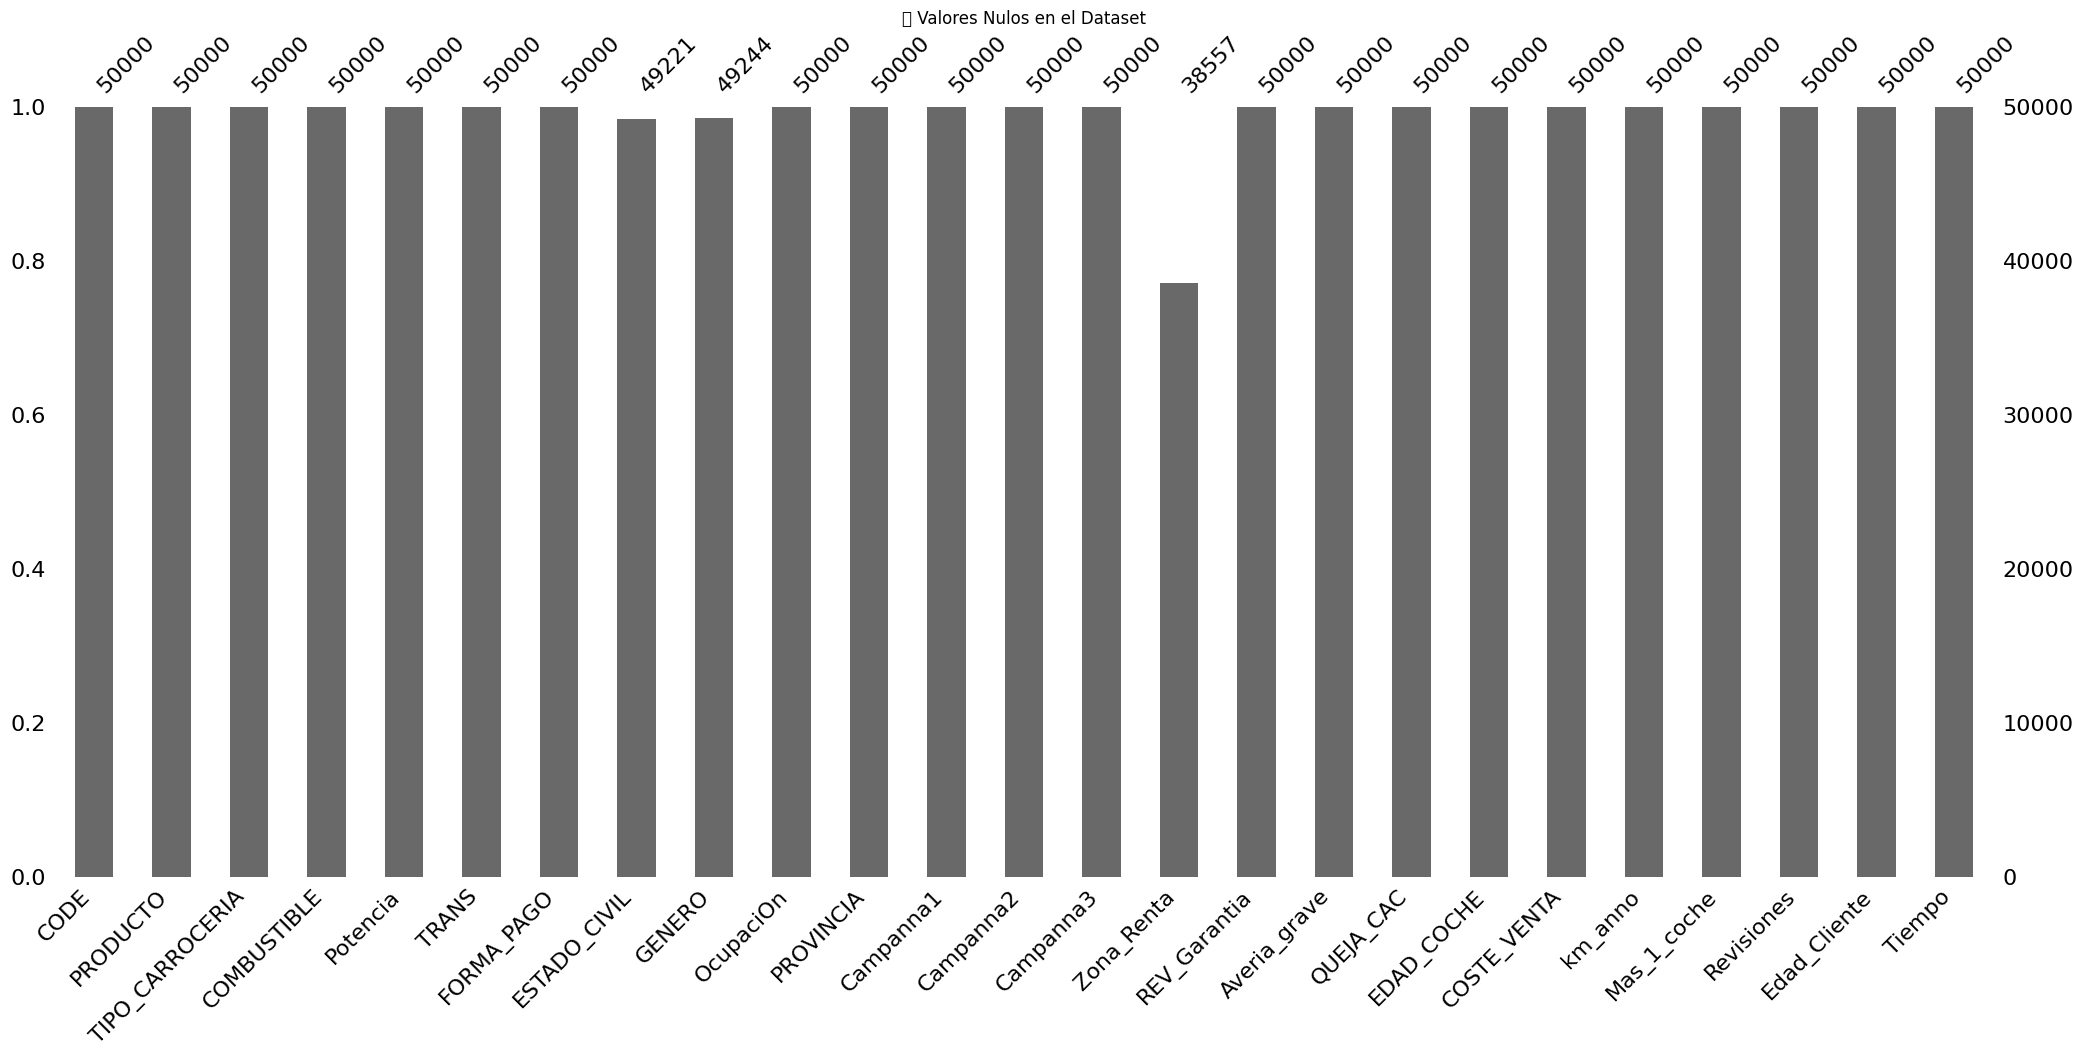

In [12]:
plt.figure(figsize=(10, 5))
msno.bar(df)
plt.title("📉 Valores Nulos en el Dataset")
plt.show()

**Valores Únicos de las columnas con nulos**

In [8]:
print(df['Zona_Renta'].unique())

['Medio-Bajo' 'Medio' 'Alto' nan 'Otros']


In [15]:
df['GENERO'].unique()

array(['M', 'F', nan], dtype=object)

In [16]:
df['ESTADO_CIVIL'].unique()

array(['CASADO', 'SOLTERO', 'OTROS', 'EN PAREJA', nan], dtype=object)

### 1.2.1 Columna Zona Renta

- Si 'otros' que características tienen
- Si se asemejan a los "nan"

In [ ]:
# Filtrar el DataFrame donde Zona_Renta es 'Otros'
df_filtrado = df[df['Zona_Renta'] == 'Otros']

# Mostrar todas las filas sin truncar
# pd.set_option('display.max_rows', None)  # Ver todas las filas
pd.set_option('display.max_columns', None)  # Ver todas las columnas
pd.set_option('display.max_colwidth', None)  # No truncar contenido de las celdas

# Imprimir el DataFrame filtrado
df_filtrado


CODE PRODUCTO TIPO_CARROCERIA COMBUSTIBLE Potencia TRANS  \
1288    CLI1289        A           TIPO1      FUEL 2    Media     M   
2011    CLI2012        B           TIPO1      FUEL 1    Media     M   
3864    CLI3865        B           TIPO6      FUEL 1    Media     M   
4098    CLI4099        B           TIPO6      FUEL 2    Media     M   
4199    CLI4200        B           TIPO6      FUEL 2    Media     M   
...         ...      ...             ...         ...      ...   ...   
49927  CLI35694        D           TIPO1      FUEL 2    Media     M   
49935  CLI35896        D           TIPO1      FUEL 2    Media     M   
49950  CLI36182        D           TIPO1      FUEL 2    Media     M   
49965  CLI36491        D           TIPO1      FUEL 2    Media     M   
49996  CLI37035        D           TIPO1      FUEL 1    Media     M   

             FORMA_PAGO ESTADO_CIVIL GENERO OcupaciOn               PROVINCIA  \
1288   Financiera Marca       CASADO      F   Empresa              Pontevedra   
2011              Otros      SOLTERO      M   Empresa  Santa Cruz de Tenerife   
3864            Contado       CASADO      M  Autonomo                  Gerona   
4098            Contado       CASADO      M   Empresa                  Murcia   
4199              Otros       CASADO      F   Empresa                   Cadiz   
...                 ...          ...    ...       ...                     ...   
49927           Contado       CASADO      F   Empresa                Lacoruna   
49935             Otros      SOLTERO      M   Empresa                   Cadiz   
49950           Contado          NaN    NaN   Empresa                 Sevilla   
49965             Otros       CASADO      M   Empresa                 Sevilla   
49996           Contado       CASADO      M   Empresa               Barcelona   

      Campanna1 Campanna2 Campanna3 Zona_Renta REV_Garantia      Averia_grave  \
1288         SI        NO        SI      Otros      NO DATA  Averia muy grave   
2011         SI        NO        NO      Otros      NO DATA                No   
3864         NO        NO        NO      Otros      NO DATA       Averia leve   
4098         NO        NO        NO      Otros      NO DATA  Averia muy grave   
4199         NO        NO        NO      Otros           SI  Averia muy grave   
...         ...       ...       ...        ...          ...               ...   
49927        NO        NO        NO      Otros      NO DATA  Averia muy grave   
49935        SI        NO        NO      Otros      NO DATA                No   
49950        NO        NO        NO      Otros      NO DATA  Averia muy grave   
49965        SI        NO        NO      Otros           SI      Averia grave   
49996        NO        NO        NO      Otros      NO DATA  Averia muy grave   

      QUEJA_CAC  EDAD_COCHE  COSTE_VENTA  km_anno  Mas_1_coche  Revisiones  \
1288         SI         185         4082        0         True           1   
2011         NO          21         3729        0         True           1   
3864         NO         934         4177    10180        False           7   
4098         SI         839         4869    21644        False           7   
4199         SI         837         3115     6661        False           8   
...         ...         ...          ...      ...          ...         ...   
49927        SI         897            0    10305        False           8   
49935        SI         845          992    15885        False           4   
49950        SI         856         3194    15030        False           7   
49965        NO         968            0    20167        False           9   
49996        SI         871         1450     8060        False           4   

       Edad_Cliente  Tiempo  
1288             21       6  
2011             55       5  
3864             39       0  
4098             50       0  
4199             59       0  
...             ...     ...  
49927            53       0  
49935            42       0  
49950

In [20]:
# Filtrar el DataFrame donde Zona_Renta es NaN
df_filtrado_nan = df[pd.isna(df['Zona_Renta'])]
df_filtrado_alta_renta = df[df['Zona_Renta'] == 'Alto']


In [11]:
# Calcular la moda de cada columna en df_filtrado
moda_por_variable = df_filtrado.mode().iloc[0]  # Tomamos solo la primera moda en caso de múltiples

# Mostrar la moda por variable
moda_por_variable


CODE                       CLI10075
PRODUCTO                          D
TIPO_CARROCERIA               TIPO1
COMBUSTIBLE                  FUEL 2
Potencia                      Media
TRANS                             M
FORMA_PAGO                  Contado
ESTADO_CIVIL                 CASADO
GENERO                            M
OcupaciOn                   Empresa
PROVINCIA                 Barcelona
Campanna1                        NO
Campanna2                        NO
Campanna3                        NO
Zona_Renta                    Otros
REV_Garantia                NO DATA
Averia_grave       Averia muy grave
QUEJA_CAC                        SI
EDAD_COCHE                    751.0
COSTE_VENTA                     0.0
km_anno                         0.0
Mas_1_coche                   False
Revisiones                      4.0
Edad_Cliente                   50.0
Tiempo                          0.0
Name: 0, dtype: object

In [14]:
# Calcular la moda de cada columna en df_filtrado
moda_por_variable_nan = df_filtrado_nan.mode().iloc[0]  # Tomamos solo la primera moda en caso de múltiples

# Mostrar la moda por variable
moda_por_variable_nan

CODE                       CLI10005
PRODUCTO                          I
TIPO_CARROCERIA               TIPO7
COMBUSTIBLE                  FUEL 2
Potencia                      Media
TRANS                             M
FORMA_PAGO         Financiera Marca
ESTADO_CIVIL                 CASADO
GENERO                            M
OcupaciOn                   Empresa
PROVINCIA                    Madrid
Campanna1                        NO
Campanna2                        NO
Campanna3                        NO
Zona_Renta                      NaN
REV_Garantia                NO DATA
Averia_grave                     No
QUEJA_CAC                        NO
EDAD_COCHE                    168.0
COSTE_VENTA                  1829.0
km_anno                         0.0
Mas_1_coche                   False
Revisiones                      1.0
Edad_Cliente                   43.0
Tiempo                          0.0
Name: 0, dtype: object

In [22]:
# Calcular la moda de cada columna en df_filtrado
moda_por_variable_renta_alta = df_filtrado_alta_renta.mode().iloc[0]  # Tomamos solo la primera moda en caso de múltiples

# Mostrar la moda por variable
moda_por_variable_renta_alta

CODE               CLI10000
PRODUCTO                  B
TIPO_CARROCERIA       TIPO1
COMBUSTIBLE          FUEL 2
Potencia              Media
TRANS                     M
FORMA_PAGO          Contado
ESTADO_CIVIL         CASADO
GENERO                    M
OcupaciOn           Empresa
PROVINCIA            Madrid
Campanna1                NO
Campanna2                NO
Campanna3                NO
Zona_Renta             Alto
REV_Garantia        NO DATA
Averia_grave             No
QUEJA_CAC                NO
EDAD_COCHE            193.0
COSTE_VENTA             0.0
km_anno                 0.0
Mas_1_coche            True
Revisiones              2.0
Edad_Cliente           41.0
Tiempo                  0.0
Name: 0, dtype: object

Concluimos en imputar los NAN de "Zona_Renta" en "otros" por la similitud que representa es sus valores modales.

## 1.3 Distribución de variables numéricas

Ver si las columnas están bien tipificados:

In [ ]:
df.columns

Index(['CODE', 'PRODUCTO', 'TIPO_CARROCERIA', 'COMBUSTIBLE', 'Potencia',
       'TRANS', 'FORMA_PAGO', 'ESTADO_CIVIL', 'GENERO', 'OcupaciOn',
       'PROVINCIA', 'Campanna1', 'Campanna2', 'Campanna3', 'Zona_Renta',
       'REV_Garantia', 'Averia_grave', 'QUEJA_CAC', 'EDAD_COCHE',
       'COSTE_VENTA', 'km_anno', 'Mas_1_coche', 'Revisiones', 'Edad_Cliente',
       'Tiempo'],
      dtype='object')

In [31]:
df.select_dtypes(include=['int64', 'float64']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   EDAD_COCHE    50000 non-null  int64
 1   COSTE_VENTA   50000 non-null  int64
 2   km_anno       50000 non-null  int64
 3   Revisiones    50000 non-null  int64
 4   Edad_Cliente  50000 non-null  int64
 5   Tiempo        50000 non-null  int64
dtypes: int64(6)
memory usage: 2.3 MB


In [477]:
df.select_dtypes(include=['bool']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Mas_1_coche  50000 non-null  bool 
dtypes: bool(1)
memory usage: 49.0 KB


In [478]:
num_cols = df.select_dtypes(include=['int64', 'float64', 'bool']).columns
num_cols

Index(['EDAD_COCHE', 'COSTE_VENTA', 'km_anno', 'Mas_1_coche', 'Revisiones',
       'Edad_Cliente', 'Tiempo'],
      dtype='object')

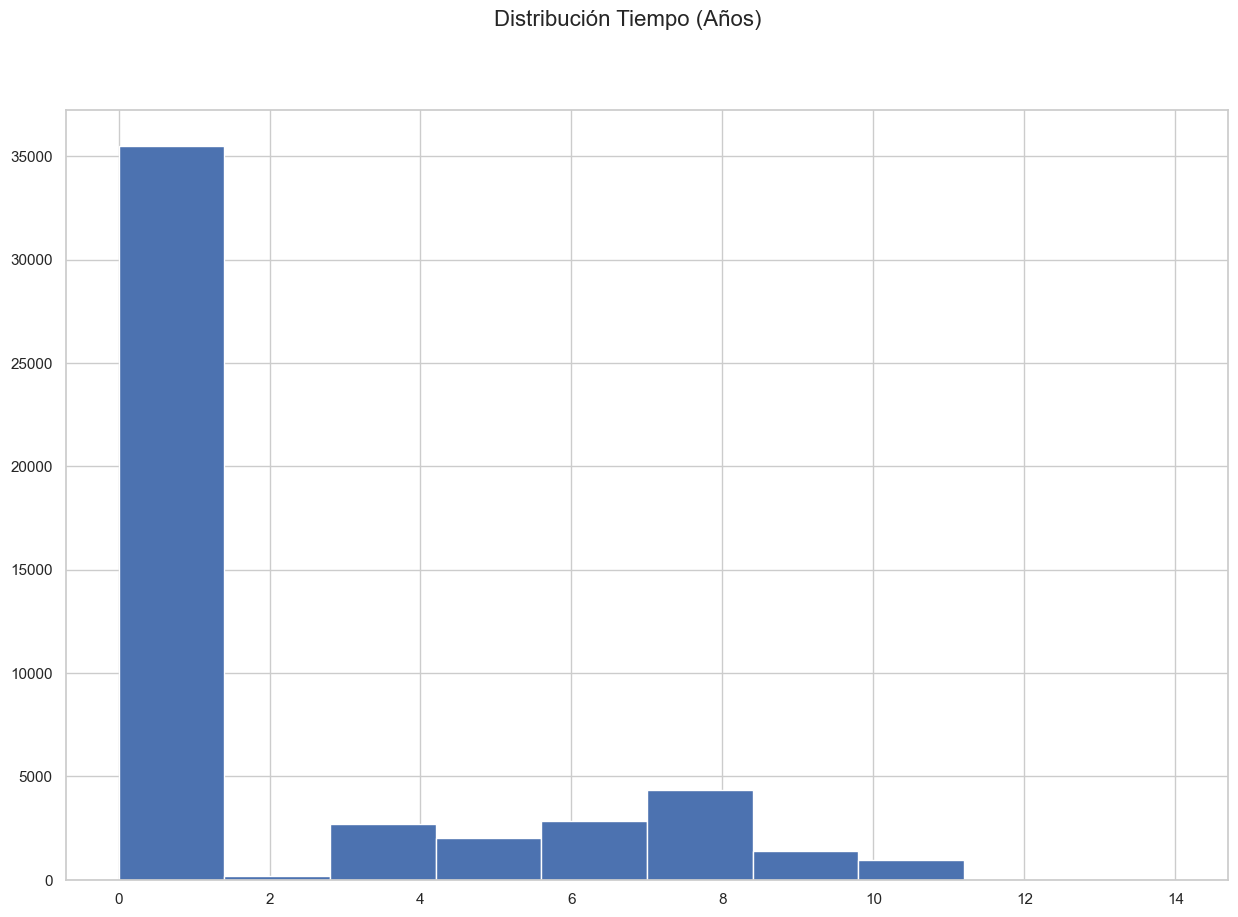

In [466]:
plt.figure(figsize=(15, 10))
df['Tiempo'].hist()
plt.suptitle("Distribución Tiempo (Años)", fontsize=16)
plt.show()

In [520]:
df.columns

Index(['CODE', 'PRODUCTO', 'TIPO_CARROCERIA', 'COMBUSTIBLE', 'Potencia',
       'TRANS', 'FORMA_PAGO', 'ESTADO_CIVIL', 'GENERO', 'OcupaciOn',
       'PROVINCIA', 'Campanna1', 'Campanna2', 'Campanna3', 'Zona_Renta',
       'REV_Garantia', 'Averia_grave', 'QUEJA_CAC', 'EDAD_COCHE',
       'COSTE_VENTA', 'km_anno', 'Mas_1_coche', 'Revisiones', 'Edad_Cliente',
       'Tiempo'],
      dtype='object')

In [599]:
df['Zona_Renta']

0        Medio-Bajo
1        Medio-Bajo
2             Medio
3             Medio
4              Alto
            ...    
49995          Alto
49996         Otros
49997          Alto
49998          Alto
49999         Medio
Name: Zona_Renta, Length: 50000, dtype: object

In [557]:
df_correlacion = df.copy()

provincias_ids = {
    'Asturias': 1, 'Toledo': 2, 'Lerida': 3, 'Madrid': 4, 'Santa Cruz de Tenerife': 5,
    'Pontevedra': 6, 'Lacoruna': 7, 'Barcelona': 8, 'Cordoba': 9, 'Guipuzcua': 10,
    'Valladolid': 11, 'Castellon': 12, 'Valencia': 13, 'Las Palmas': 14, 'La Rioja': 15,
    'Baleares': 16, 'Zaragoza': 17, 'Alicante': 18, 'Tarragona': 19, 'Leon': 20, 'Lugo': 21,
    'Badajoz': 22, 'Vizcaya': 23, 'Sevilla': 24, 'Guadalajara': 25, 'Ciudad Real': 26,
    'Cantabria': 27, 'Orense': 28, 'Navarra': 29, 'Gerona': 30, 'Malaga': 31, 'Jaen': 32,
    'Murcia': 33, 'Burgos': 34, 'Granada': 35, 'Alava': 36, 'Cuenca': 37, 'Cadiz': 38,
    'Salamanca': 39, 'Albacete': 40, 'Almeria': 41, 'Teruel': 42, 'Segovia': 43,
    'Palencia': 44, 'Huelva': 45, 'Huesca': 46, 'Zamora': 47, 'Avila': 48, 'Soria': 49,
    'Caceres': 50, 'Melilla': 51, 'Ceuta': 52, 'Francia': 53
}

#df_correlacion['Mas_1_coche'] = df_correlacion['Mas_1_coche'].map({'False': 1, 'True': 0})

df_correlacion['QUEJA_CAC'] = df_correlacion['QUEJA_CAC'].map({'SI': 1, 'NO': 0})
df_correlacion['Campanna1'] = df_correlacion['Campanna1'].map({'SI': 1, 'NO': 0})
df_correlacion['Campanna2'] = df_correlacion['Campanna2'].map({'SI': 1, 'NO': 0})
df_correlacion['Campanna3'] = df_correlacion['Campanna3'].map({'SI': 1, 'NO': 0})

df_correlacion['PRODUCTO'] = df_correlacion['PRODUCTO'].map({'A':1, 'B':2, 'C':3, 'H':8, 'J':10, 'D':4, 'I':9, 'E':5, 'F':6, 'K':11, 'G':7})
df_correlacion['TIPO_CARROCERIA'] = df_correlacion['TIPO_CARROCERIA'].map({'TIPO1':1, 'TIPO6':6, 'TIPO4':4, 'TIPO7':7, 'TIPO8':8, 'TIPO2':2, 'TIPO3':3,'TIPO5':5})
df_correlacion['COMBUSTIBLE'] = df_correlacion['COMBUSTIBLE'].map({'FUEL 1':1, 'FUEL 2':2})
df_correlacion['Potencia'] = df_correlacion['Potencia'].map({'Baja':0, 'Media':1, 'Alta':2})
df_correlacion['TRANS'] = df_correlacion['TRANS'].map({'M':0, 'A':1})
df_correlacion['FORMA_PAGO'] = df_correlacion['FORMA_PAGO'].map({'Contado':0, 'Otros':1, 'Financiera Marca':2, 'Financiera Banco':3})
df_correlacion['ESTADO_CIVIL'] = df_correlacion['ESTADO_CIVIL'].map({'CASADO':0, 'SOLTERO':1, 'OTROS':2, 'EN PAREJA':3})
df_correlacion['GENERO'] = df_correlacion['GENERO'].map({'M':1, 'F':2}).fillna(0).astype(int)
df_correlacion['OcupaciOn'] = df_correlacion['OcupaciOn'].map({'Empresa':0, 'Funcionario':1, 'Autonomo':2})
df_correlacion['PROVINCIA'] = df_correlacion['PROVINCIA'].map(provincias_ids)
df_correlacion['Zona_Renta'] = df_correlacion['Zona_Renta'].map({'Medio-Bajo':1, 'Medio':2, 'Alto':3, 'Otros':4}).fillna(0).astype(int)
df_correlacion['REV_Garantia'] = df_correlacion['REV_Garantia'].map({'NO DATA':0, 'SI':1})
df_correlacion['Averia_grave'] = df_correlacion['Averia_grave'].map({'Averia muy grave':3, 'No':0, 'Averia leve':1, 'Averia grave':2})




num_cols = df_correlacion.select_dtypes(include=['int64', 'float64', 'bool']).columns


<Figure size 1500x1000 with 0 Axes>

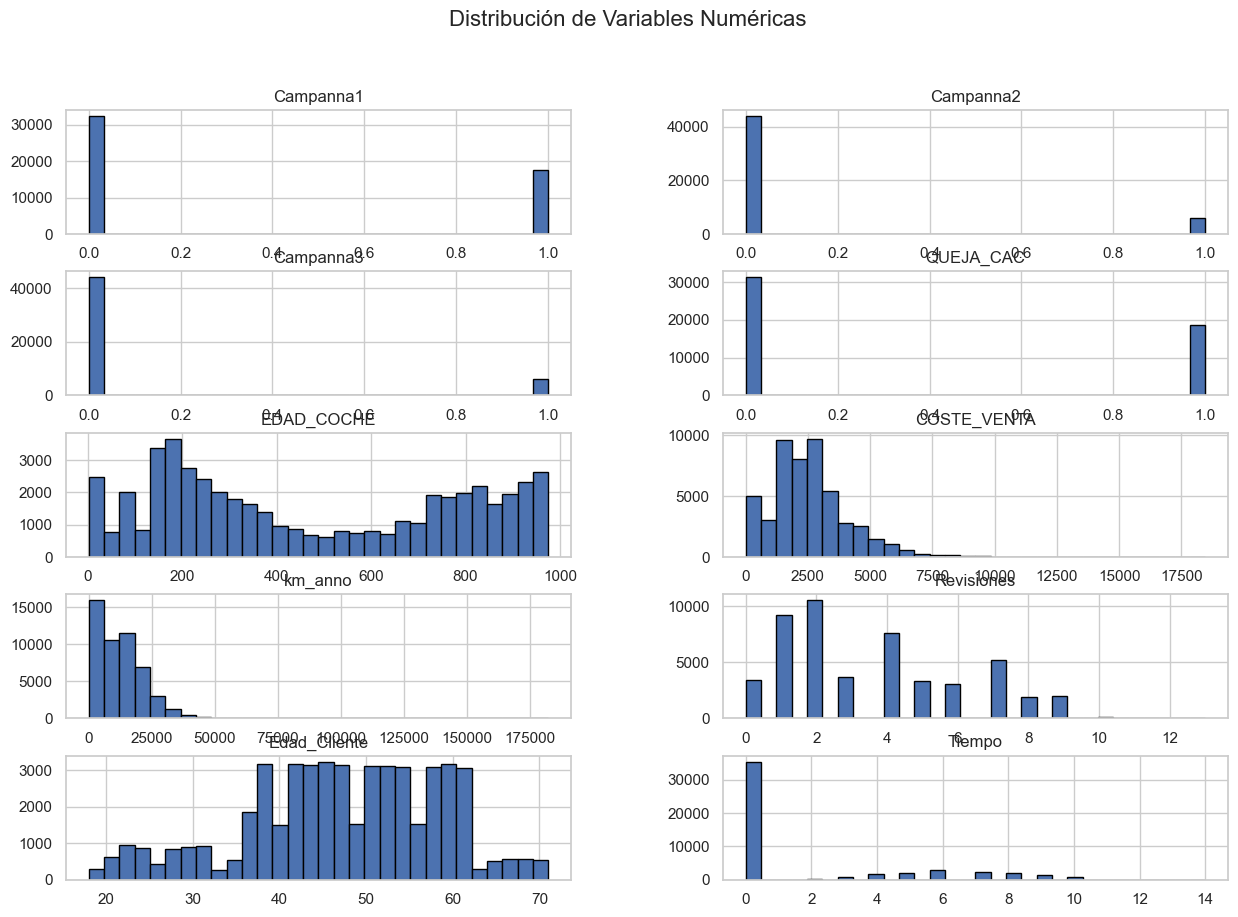

In [516]:
plt.figure(figsize=(15, 10))
df_correlacion[num_cols].hist(bins=30, figsize=(15, 10), layout=(5, 2), edgecolor='black')
plt.suptitle("Distribución de Variables Numéricas", fontsize=16)
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_20492\2552003681.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Mas_1_coche"], y=df[col], palette="Set1")
C:\Users\Usuario\AppData\Local\Temp\ipykernel_20492\2552003681.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Mas_1_coche"], y=df[col], palette="Set1")
C:\Users\Usuario\AppData\Local\Temp\ipykernel_20492\2552003681.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Mas_1_coche"], y=df[col], palette="Set1")
C:\Users\Usuario\AppData\Local\Temp\ipykernel_20492\255200

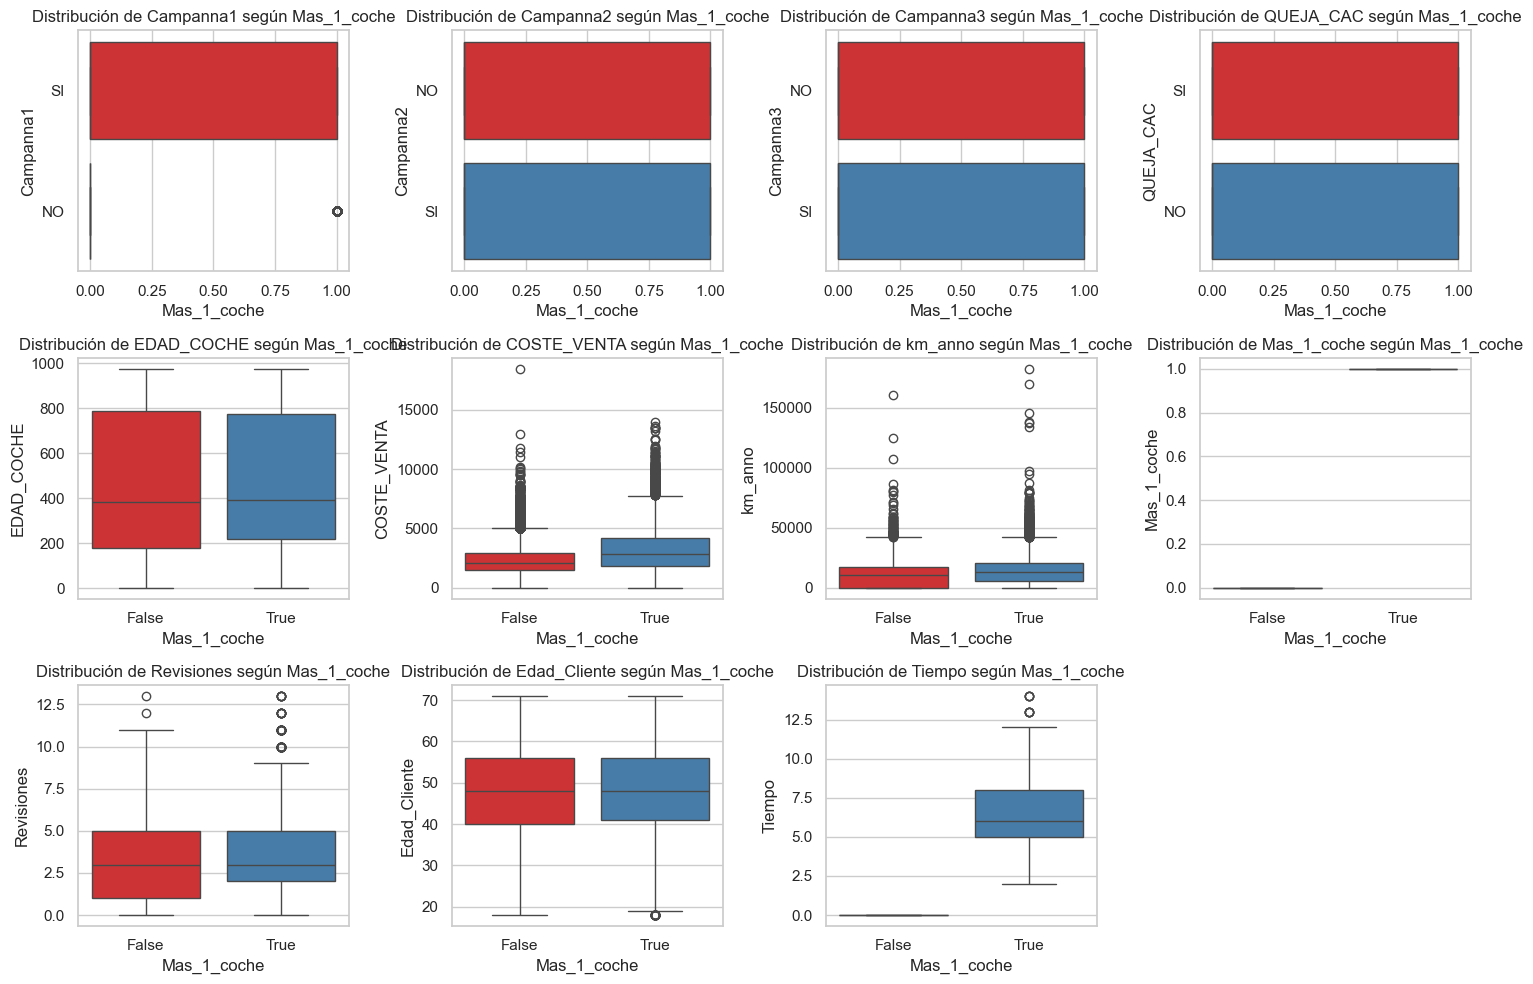

In [519]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
#num_columns = df_.select_dtypes(include=['int64', 'float64']).columns
for i, col in enumerate(df_correlacion[num_cols], 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df["Mas_1_coche"], y=df[col], palette="Set1")
    plt.title(f"Distribución de {col} según Mas_1_coche")

plt.tight_layout()
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_20492\267410061.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df["Mas_1_coche"], y=df[col], palette="muted", inner="quartile")
C:\Users\Usuario\AppData\Local\Temp\ipykernel_20492\267410061.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df["Mas_1_coche"], y=df[col], palette="muted", inner="quartile")
C:\Users\Usuario\AppData\Local\Temp\ipykernel_20492\267410061.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df["Mas_1_coche"], y=df[col], palette="muted", inner="quarti

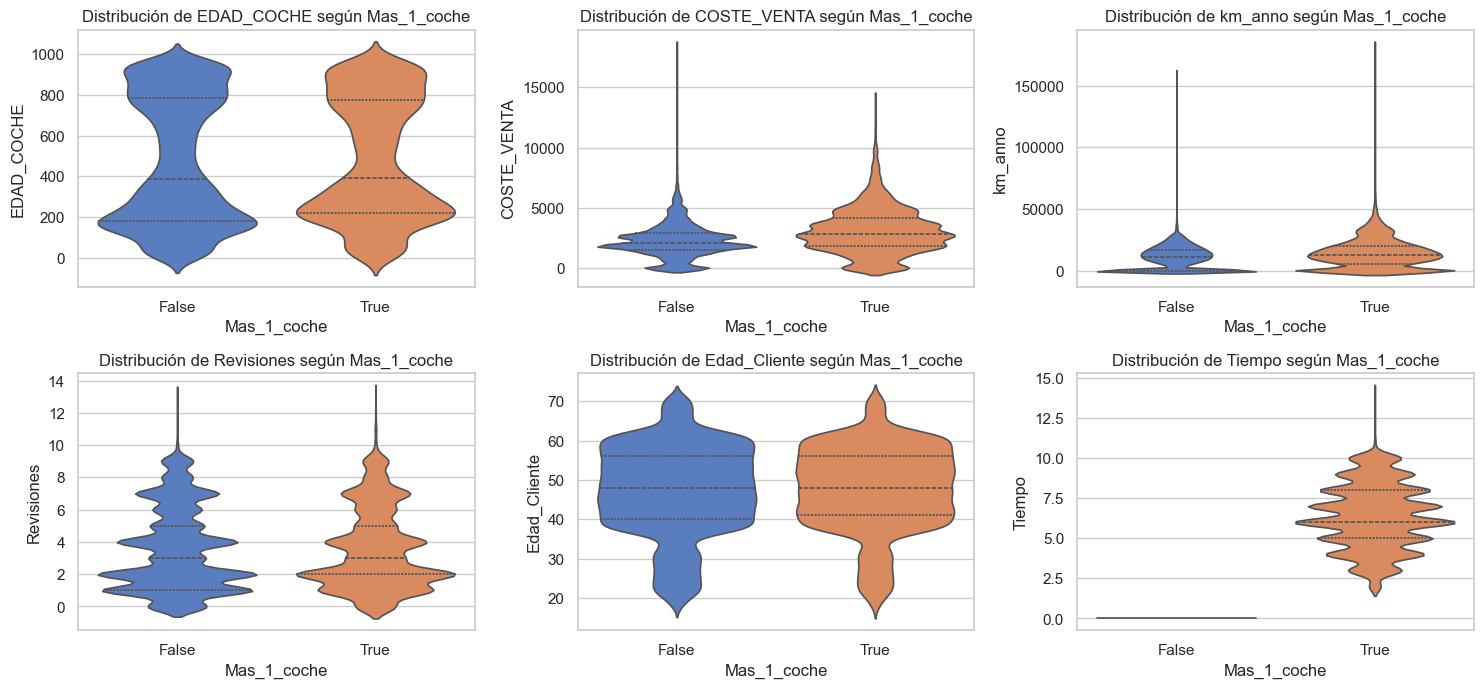

In [469]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(num_columns, 1):
    plt.subplot(3, 3, i)
    sns.violinplot(x=df["Mas_1_coche"], y=df[col], palette="muted", inner="quartile")
    plt.title(f"Distribución de {col} según Mas_1_coche")

plt.tight_layout()
plt.show()


In [576]:
num_columns = df_transformed_regresor.columns
num_columns

Index(['PRODUCTO_B', 'PRODUCTO_C', 'PRODUCTO_D', 'PRODUCTO_E', 'PRODUCTO_F',
       'PRODUCTO_G', 'PRODUCTO_H', 'PRODUCTO_I', 'PRODUCTO_J', 'PRODUCTO_K',
       ...
       'Campanna1_SI', 'Campanna2_SI', 'Campanna3_SI', 'QUEJA_CAC_SI',
       'EDAD_COCHE', 'COSTE_VENTA', 'km_anno', 'Revisiones', 'Edad_Cliente',
       'Tiempo'],
      dtype='object', length=103)

In [585]:
import pandas as pd
num_columns = df_transformed_regresor.columns
# Suponiendo que `df` es tu DataFrame y `num_cols` contiene las variables numéricas
modal_values = df_transformed_regresor.groupby("Mas_1_coche_True")[num_columns].agg(lambda x: x.mode().values[0])

modal_values

PRODUCTO_B  PRODUCTO_C  PRODUCTO_D  PRODUCTO_E  PRODUCTO_F  \
Mas_1_coche_True                                                               
0                        0.0         0.0         0.0         0.0         0.0   
1                        0.0         0.0         0.0         0.0         0.0   

                  PRODUCTO_G  PRODUCTO_H  PRODUCTO_I  PRODUCTO_J  PRODUCTO_K  \
Mas_1_coche_True                                                               
0                        0.0         0.0         0.0         0.0         0.0   
1                        0.0         0.0         0.0         0.0         0.0   

                  TIPO_CARROCERIA_TIPO2  TIPO_CARROCERIA_TIPO3  \
Mas_1_coche_True                                                 
0                                   0.0                    0.0   
1                                   0.0                    0.0   

                  TIPO_CARROCERIA_TIPO4  TIPO_CARROCERIA_TIPO5  \
Mas_1_coche_True                                                 
0                                   0.0                    0.0   
1                                   0.0                    0.0   

                  TIPO_CARROCERIA_TIPO6  TIPO_CARROCERIA_TIPO7  \
Mas_1_coche_True                                                 
0                                   0.0                    0.0   
1                                   0.0                    0.0   

                  TIPO_CARROCERIA_TIPO8  COMBUSTIBLE_FUEL 2  TRANS_M  \
Mas_1_coche_True                                                       
0                                   0.0                 1.0      1.0   
1                                   0.0                 1.0      1.0   

                  FORMA_PAGO_Financiera Banco  FORMA_PAGO_Financiera Marca  \
Mas_1_coche_True                                                             
0                                         0.0                          0.0   
1                                         0.0                          0.0   

                  FORMA_PAGO_Otros  ESTADO_CIVIL_EN PAREJA  \
Mas_1_coche_True                                             
0                              0.0                     0.0   
1                              0.0                     0.0   

                  ESTADO_CIVIL_OTROS  ESTADO_CIVIL_Otros_2  \
Mas_1_coche_True                                             
0                                0.0                   0.0   
1                                0.0                   0.0   

                  ESTADO_CIVIL_SOLTERO  GENERO_M  GENERO_OTROS  \
Mas_1_coche_True                                                 
0                                  0.0       1.0           0.0   
1                                  0.0       1.0           0.0   

                  OcupaciOn_Empresa  OcupaciOn_Funcionario  Zona_Renta_Medio  \
Mas_1_coche_True                                                               
0                               1.0                    0.0               0.0   
1                               1.0                    0.0               0.0   

                  Zona_Renta_Medio-Bajo  Zona_Renta_Otros  Zona_Renta_Otros_2  \
Mas_1_coche_True                                                                
0                                   0.0               0.0                 0.0   
1                                   0.0               0.0                 0.0   

                  REV_Garantia_SI  Averia_grave_Averia leve  \
Mas_1_coche_True                                              
0                             0.0                       0.0   
1                             0.0                       0.0   

                  Averia_grave_Averia muy grave  Averia_grave_No  \
Mas_1_coche_True                                                   
0                                           0.0              1.0   
1                                           0.0              1.0   

                  Potencia_Baja  Potencia_Me

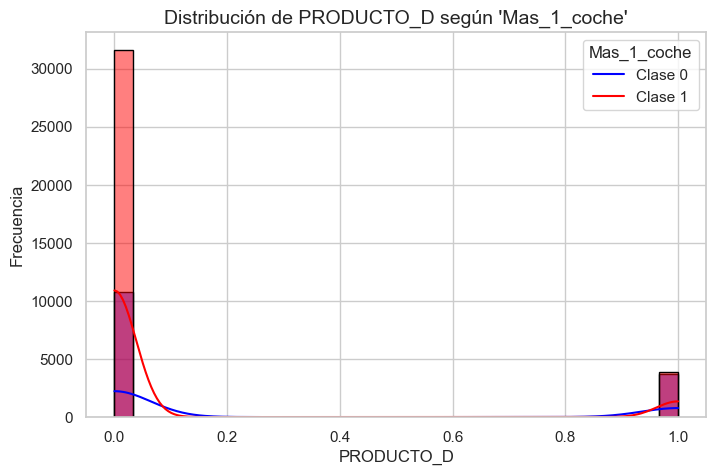

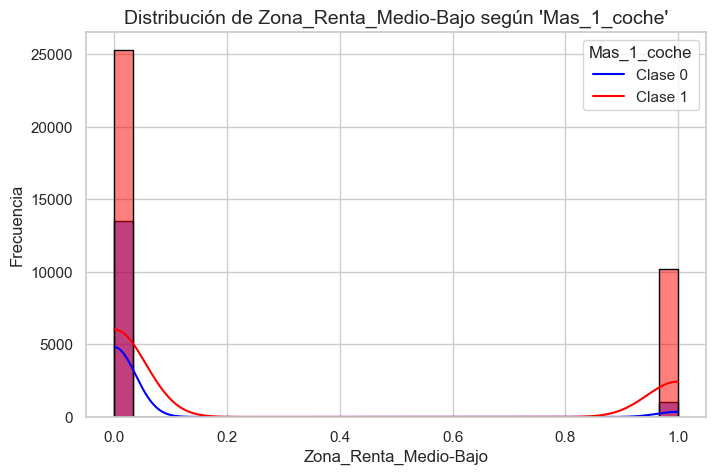

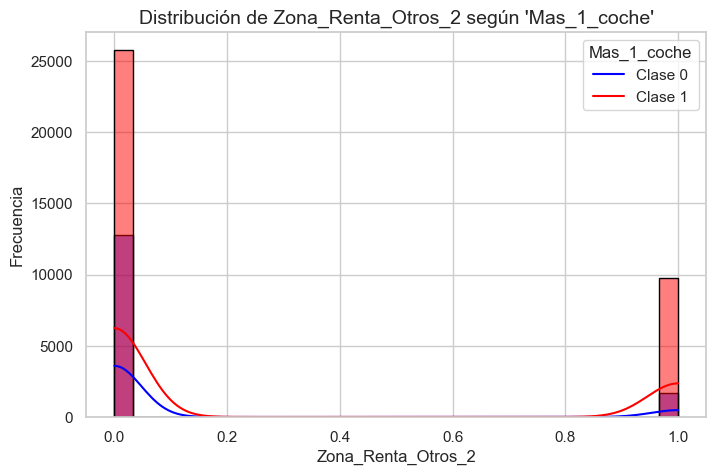

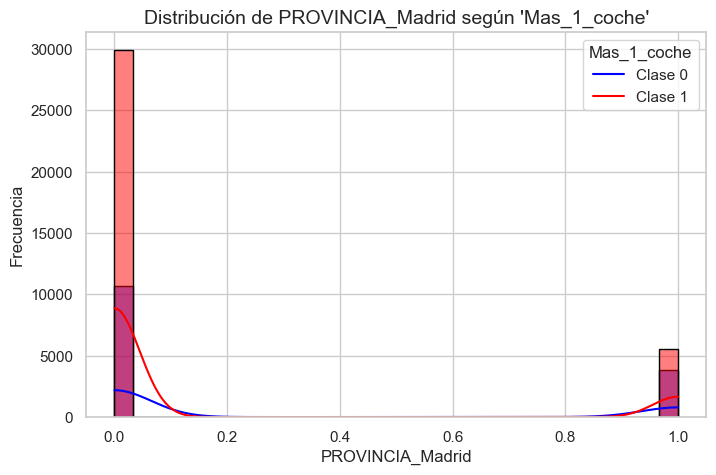

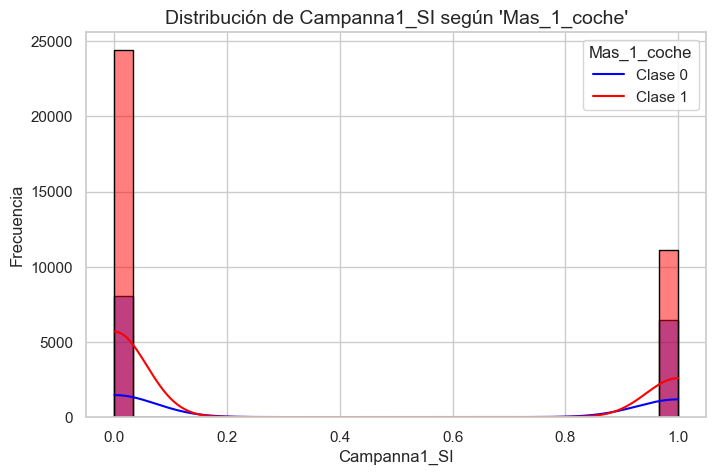

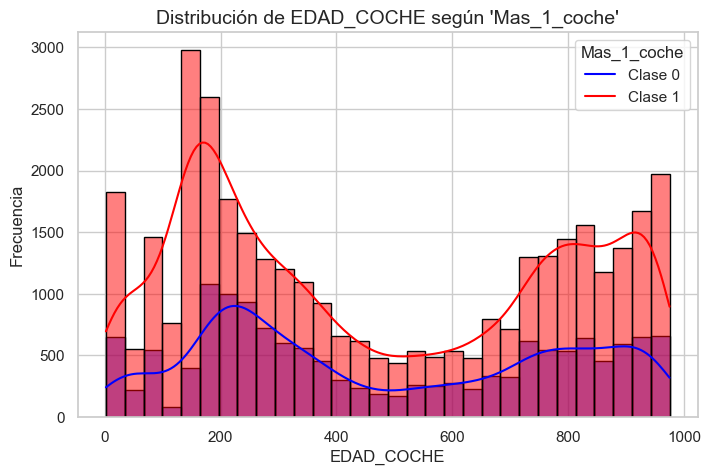

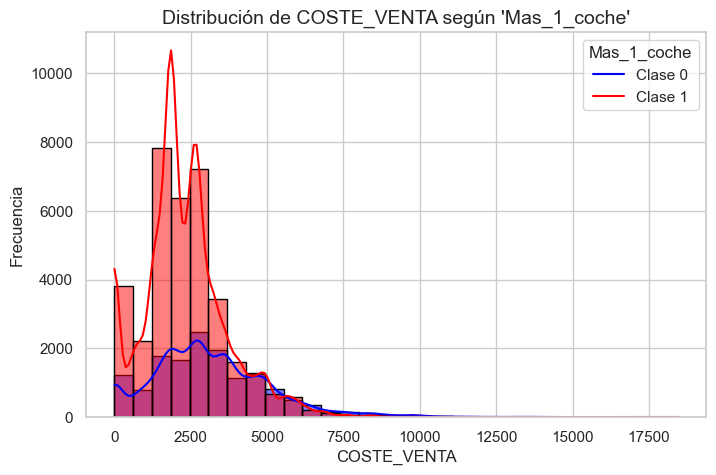

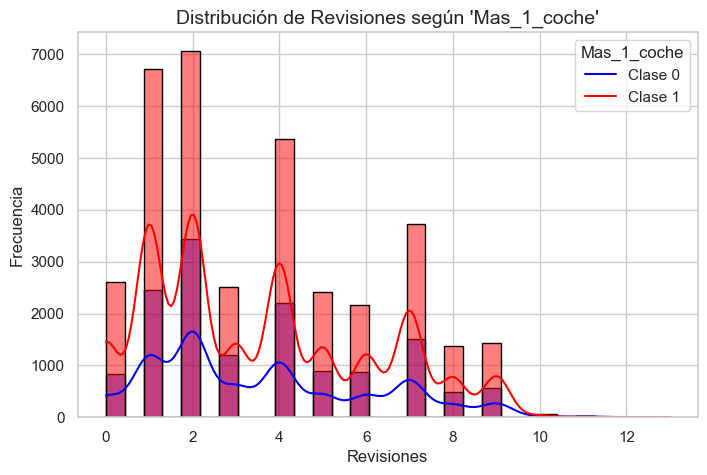

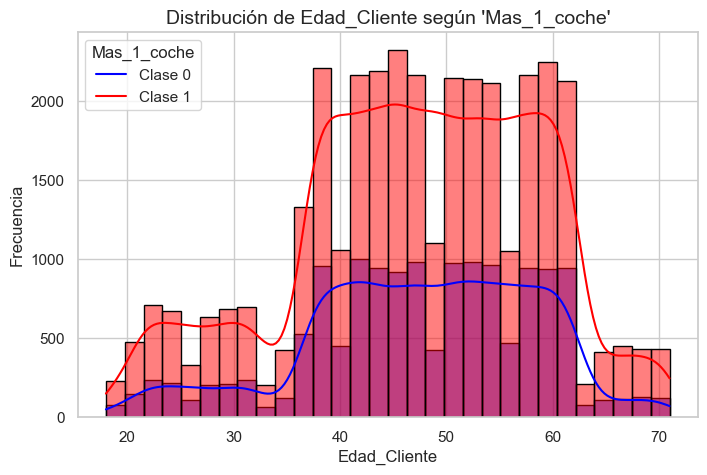

In [597]:
import matplotlib.pyplot as plt
import seaborn as sns

num_columns = ['PRODUCTO_D', 'Zona_Renta_Medio-Bajo', 'Zona_Renta_Otros_2', 'PROVINCIA_Madrid', 'Campanna1_SI', 'EDAD_COCHE', 'COSTE_VENTA', 'Revisiones', 'Edad_Cliente']

# Crear histogramas para cada variable numérica separada por "Mas_1_coche"
for col in num_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df_transformed_regresor, x=col, hue="Mas_1_coche_True", bins=30, kde=True, palette=["red", "blue"], edgecolor="black")
    plt.title(f"Distribución de {col} según 'Mas_1_coche'", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.legend(title="Mas_1_coche", labels=["Clase 0", "Clase 1"])
    plt.show()


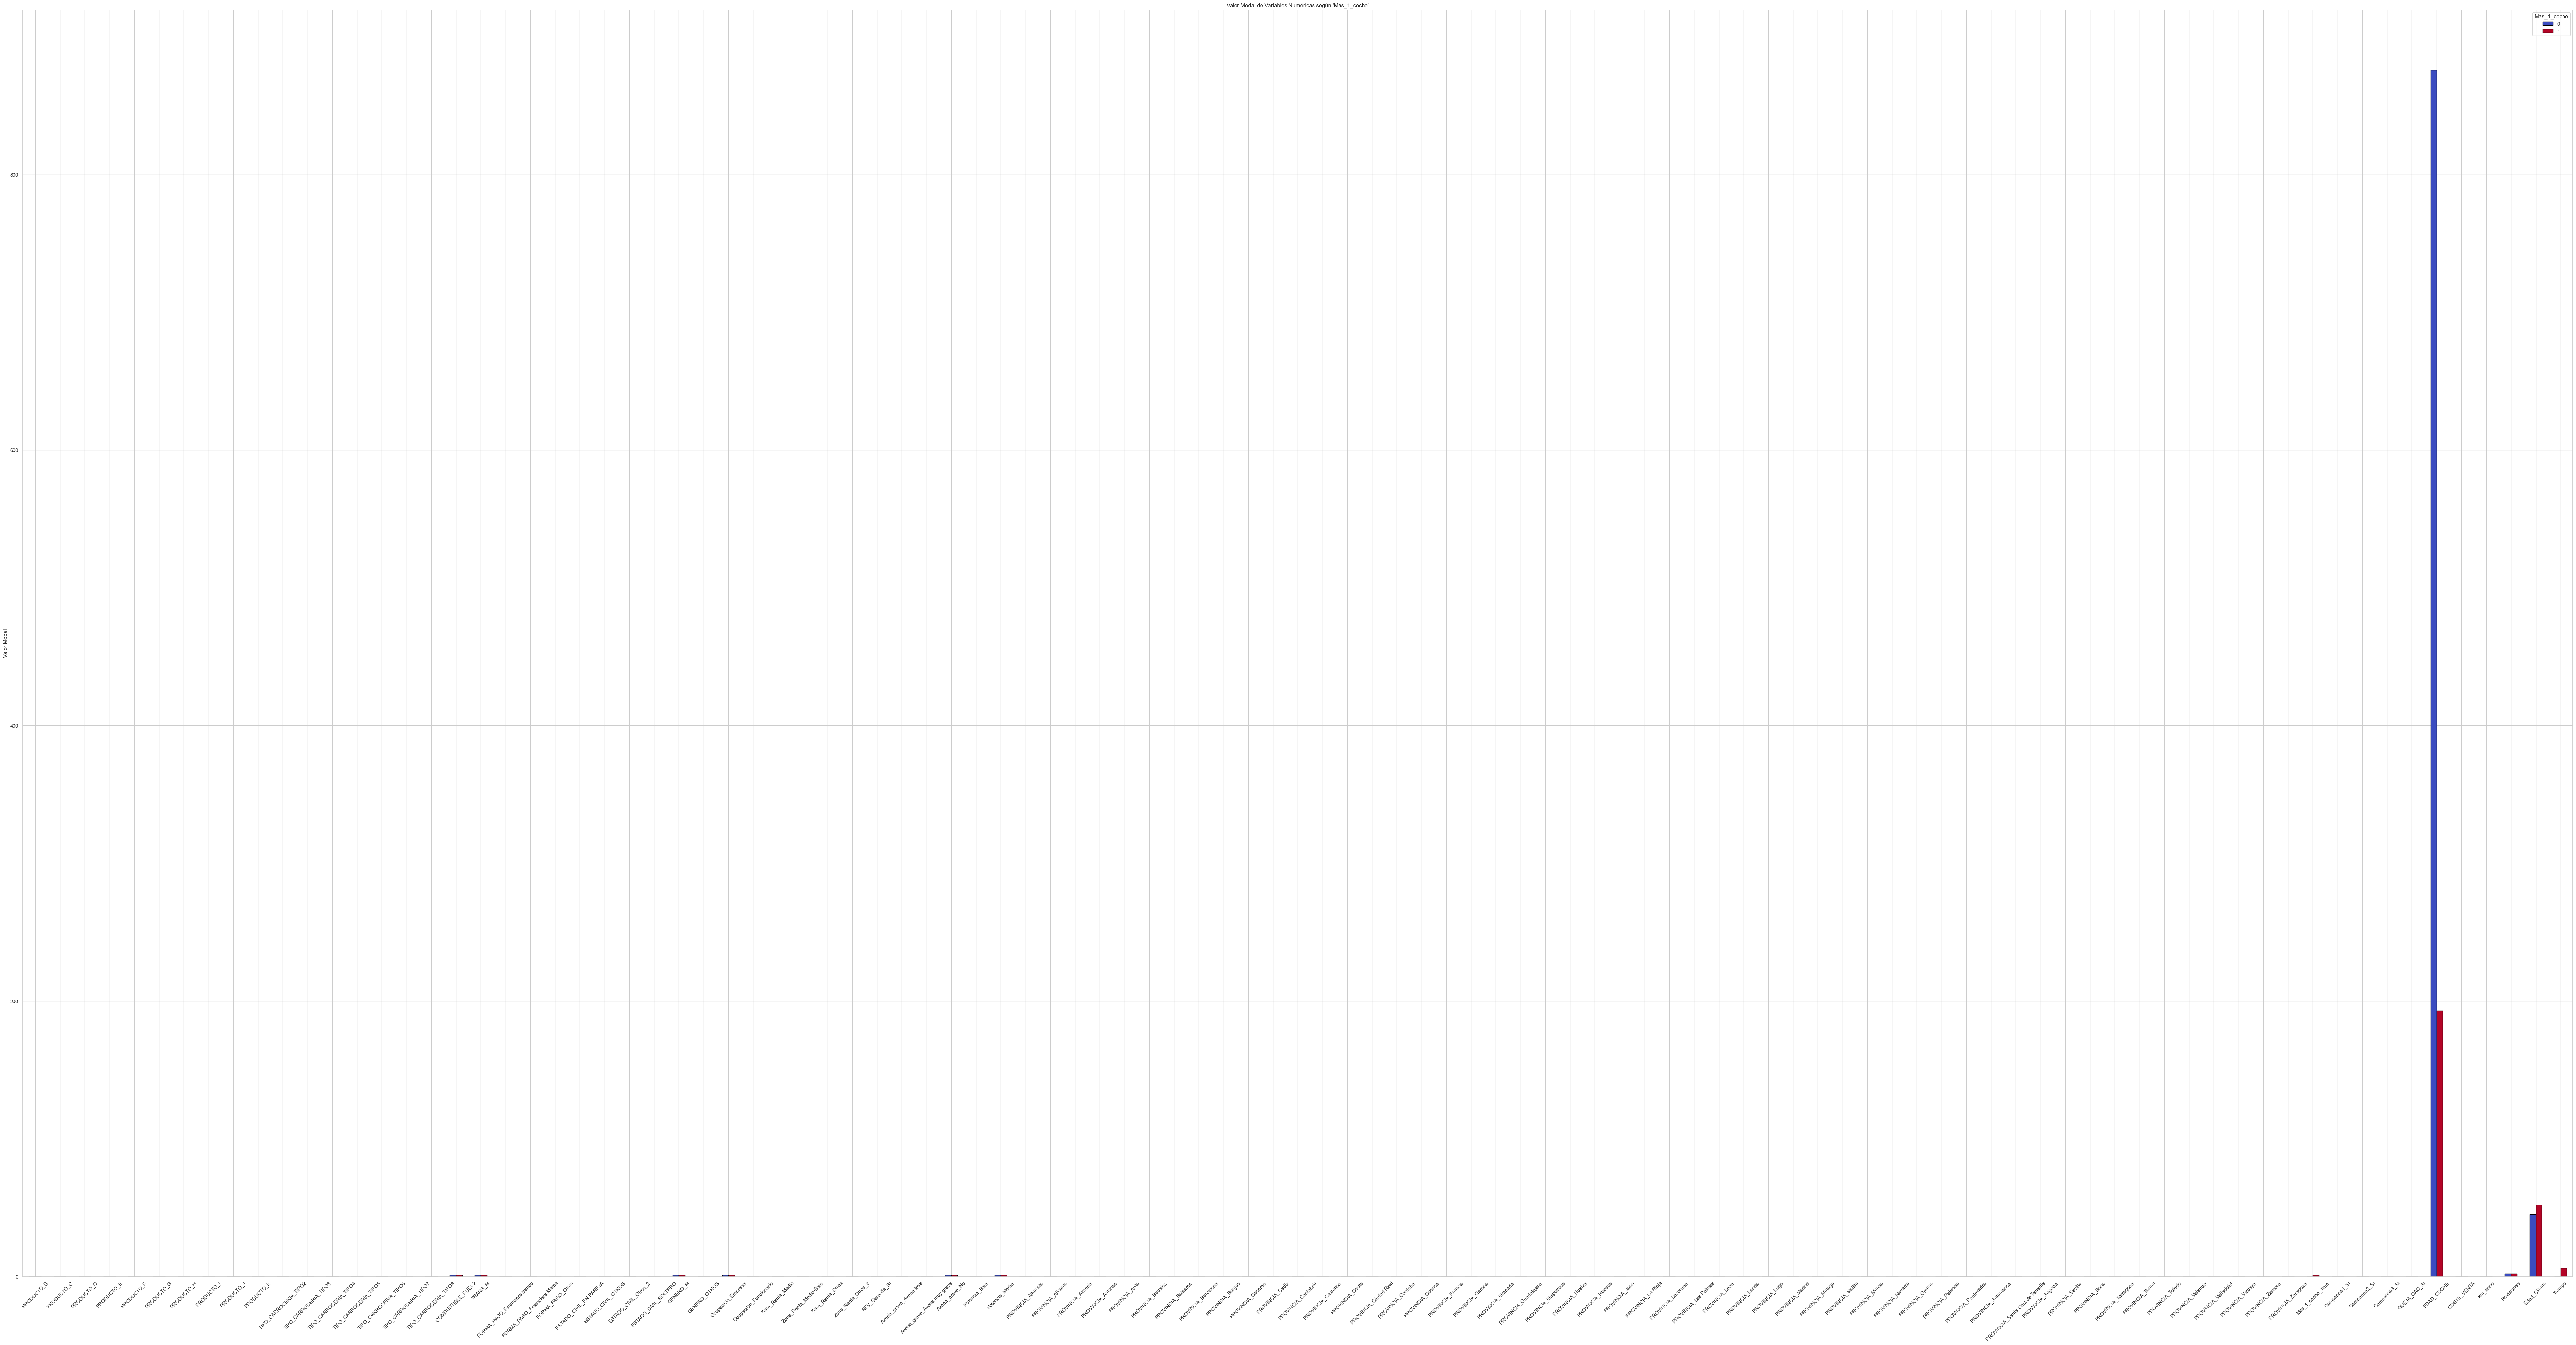

In [584]:
import matplotlib.pyplot as plt

modal_values.T.plot(kind="bar", figsize=(100, 50), colormap="coolwarm", edgecolor="black")
plt.title("Valor Modal de Variables Numéricas según 'Mas_1_coche'")
plt.ylabel("Valor Modal")
plt.xticks(rotation=45)
plt.legend(title="Mas_1_coche")
plt.show()


Conclusiones: 
- Los datos están bien tipificados, la columna 'Tiempo' si es útil para el modelo hay que tipificarlo en datetime de pandas, pero la eliminamos por la problemantica que puede suponer al entrenar los modelos.

## 1.4 Distribución de variables categóricas

In [44]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols

Index(['CODE', 'PRODUCTO', 'TIPO_CARROCERIA', 'COMBUSTIBLE', 'Potencia',
       'TRANS', 'FORMA_PAGO', 'ESTADO_CIVIL', 'GENERO', 'OcupaciOn',
       'PROVINCIA', 'Campanna1', 'Campanna2', 'Campanna3', 'Zona_Renta',
       'REV_Garantia', 'Averia_grave', 'QUEJA_CAC'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de variables categóricas
categoricas = ['CODE', 'PRODUCTO', 'TIPO_CARROCERIA', 'COMBUSTIBLE', 'Potencia',
               'TRANS', 'FORMA_PAGO', 'ESTADO_CIVIL', 'GENERO', 'OcupaciOn',
               'PROVINCIA', 'Campanna1', 'Campanna2', 'Campanna3', 'Zona_Renta',
               'REV_Garantia', 'Averia_grave', 'QUEJA_CAC']

# Crear gráficos de barras para cada variable categórica
for col in categoricas:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="viridis")
    plt.xticks(rotation=45)  # Rotar etiquetas si son muchas
    plt.title(f"Distribución de {col}")
    plt.show()



In [ ]:
df_encoded = pd.get_dummies(df[categoricas], drop_first=True)
plt.figure(figsize=(12, 6))
sns.heatmap(df_encoded.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlación entre Variables Categóricas")
plt.show()


## 1.5 Correlación entre variables numéricas

In [501]:
df_correlacion = df.copy()
df_correlacion['QUEJA_CAC'] = df_correlacion['QUEJA_CAC'].map({'SI': 1, 'NO': 0})
df_correlacion['Campanna1'] = df_correlacion['Campanna1'].map({'SI': 1, 'NO': 0})
df_correlacion['Campanna2'] = df_correlacion['Campanna2'].map({'SI': 1, 'NO': 0})
df_correlacion['Campanna3'] = df_correlacion['Campanna3'].map({'SI': 1, 'NO': 0})

num_cols = df_correlacion.select_dtypes(include=['int64', 'float64', 'bool']).columns

In [ ]:
df_correlacion

Index(['Campanna1', 'Campanna2', 'Campanna3', 'QUEJA_CAC', 'EDAD_COCHE',
       'COSTE_VENTA', 'km_anno', 'Mas_1_coche', 'Revisiones', 'Edad_Cliente',
       'Tiempo'],
      dtype='object')

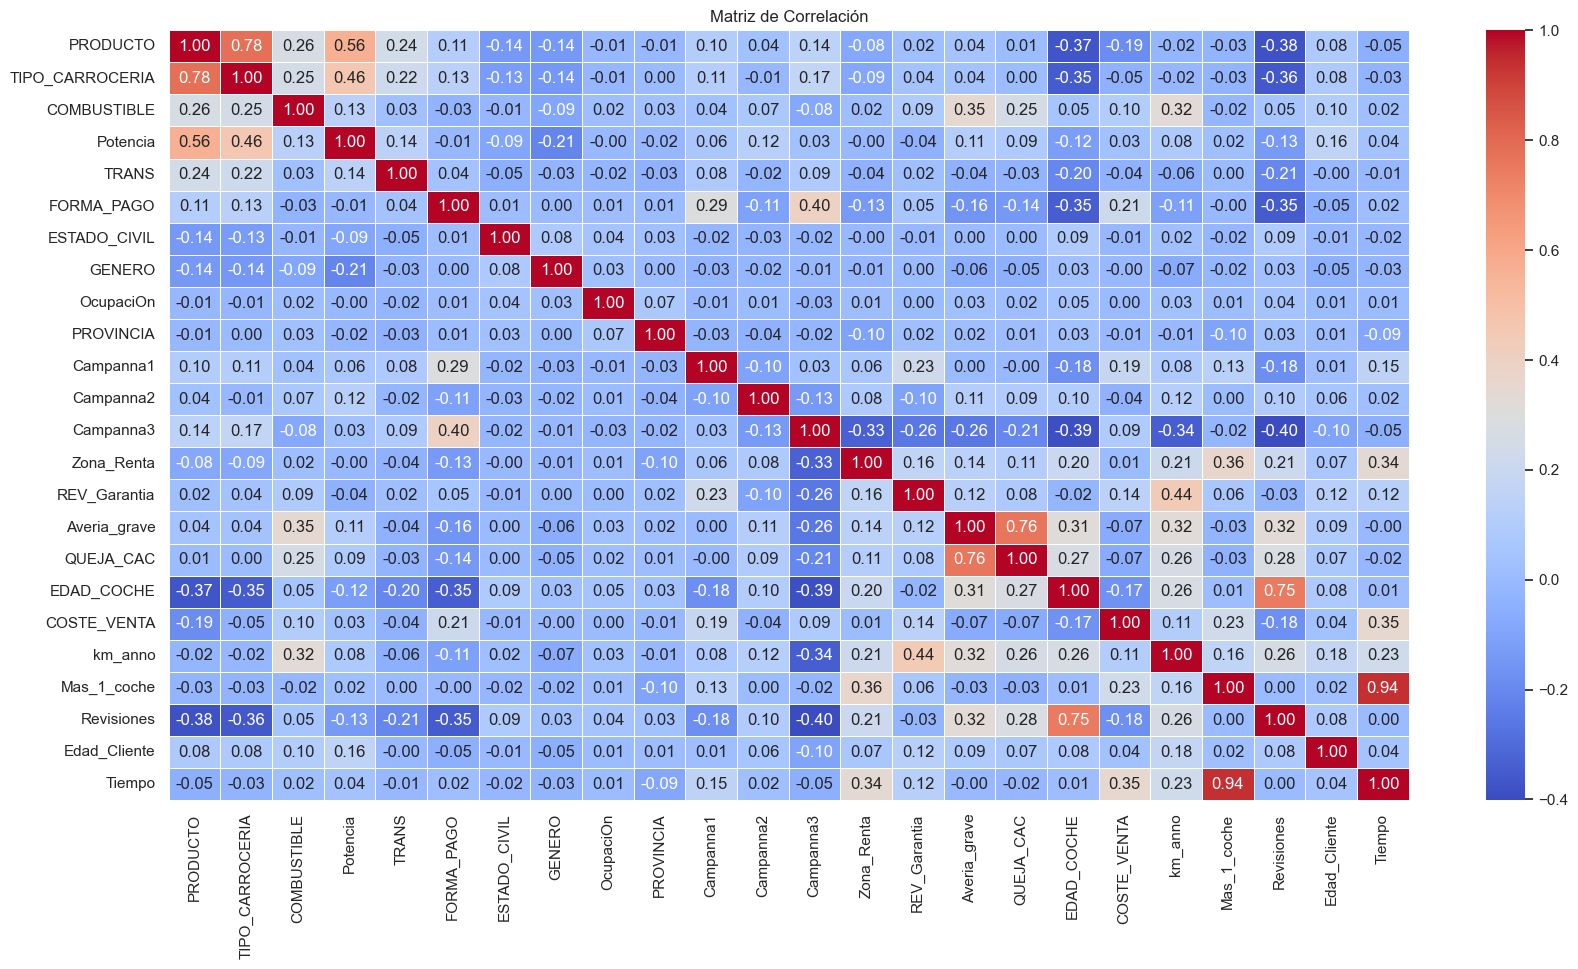

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_correlacion[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

In [630]:
cols = df_transformed.columns
cols

Index(['PRODUCTO_B', 'PRODUCTO_C', 'PRODUCTO_D', 'PRODUCTO_E', 'PRODUCTO_F',
       'PRODUCTO_G', 'PRODUCTO_H', 'PRODUCTO_I', 'PRODUCTO_J', 'PRODUCTO_K',
       ...
       'Mas_1_coche_True', 'Campanna1_SI', 'Campanna2_SI', 'Campanna3_SI',
       'QUEJA_CAC_SI', 'EDAD_COCHE', 'COSTE_VENTA', 'km_anno', 'Revisiones',
       'Edad_Cliente'],
      dtype='object', length=102)

In [631]:
df_transformed.head(1)

PRODUCTO_B  PRODUCTO_C  PRODUCTO_D  PRODUCTO_E  PRODUCTO_F  PRODUCTO_G  \
0         0.0         0.0         0.0         0.0         0.0         0.0   

   PRODUCTO_H  PRODUCTO_I  PRODUCTO_J  PRODUCTO_K  TIPO_CARROCERIA_TIPO2  \
0         0.0         0.0         0.0         0.0                    0.0   

   TIPO_CARROCERIA_TIPO3  TIPO_CARROCERIA_TIPO4  TIPO_CARROCERIA_TIPO5  \
0                    0.0                    0.0                    0.0   

   TIPO_CARROCERIA_TIPO6  TIPO_CARROCERIA_TIPO7  TIPO_CARROCERIA_TIPO8  \
0                    0.0                    0.0                    0.0   

   COMBUSTIBLE_FUEL 2  TRANS_M  FORMA_PAGO_Financiera Banco  \
0                 0.0      1.0                          0.0   

   FORMA_PAGO_Financiera Marca  FORMA_PAGO_Otros  ESTADO_CIVIL_EN PAREJA  \
0                          0.0               0.0                     0.0   

   ESTADO_CIVIL_OTROS  ESTADO_CIVIL_Otros_2  ESTADO_CIVIL_SOLTERO  GENERO_M  \
0                 0.0                   0.0                   0.0       1.0   

   GENERO_OTROS  OcupaciOn_Empresa  OcupaciOn_Funcionario  Zona_Renta_Medio  \
0           0.0                1.0                    0.0               0.0   

   Zona_Renta_Medio-Bajo  Zona_Renta_Otros  Zona_Renta_Otros_2  \
0                    1.0               0.0                 0.0   

   REV_Garantia_SI  Averia_grave_Averia leve  Averia_grave_Averia muy grave  \
0              0.0                       0.0                            1.0   

   Averia_grave_No  Potencia_Baja  Potencia_Media  PROVINCIA_Albacete  \
0              0.0            1.0             0.0                 0.0   

   PROVINCIA_Alicante  PROVINCIA_Almeria  PROVINCIA_Asturias  PROVINCIA_Avila  \
0                 0.0                0.0                 1.0              0.0   

   PROVINCIA_Badajoz  PROVINCIA_Baleares  PROVINCIA_Barcelona  \
0                0.0                 0.0                  0.0   

   PROVINCIA_Burgos  PROVINCIA_Caceres  PROVINCIA_Cadiz  PROVINCIA_Cantabria  \
0               0.0                0.0              0.0                  0.0   

   PROVINCIA_Castellon  PROVINCIA_Ceuta  PROVINCIA_Ciudad Real  \
0                  0.0              0.0                    0.0   

   PROVINCIA_Cordoba  PROVINCIA_Cuenca  PROVINCIA_Francia  PROVINCIA_Gerona  \
0                0.0               0.0                0.0               0.0   

   PROVINCIA_Granada  PROVINCIA_Guadalajara  PROVINCIA_Guipuzcua  \
0                0.0                    0.0                  0.0   

   PROVINCIA_Huelva  PROVINCIA_Huesca  PROVINCIA_Jaen  PROVINCIA_La Rioja  \
0               0.0               0.0             0.0                 0.0   

   PROVINCIA_Lacoruna  PROVINCIA_Las Palmas  PROVINCIA_Leon  PROVINCIA_Lerida  \
0                 0.0                   0.0             0.0               0.0   

   PROVINCIA_Lugo  PROVINCIA_Madrid  PROVINCIA_Malaga  PROVINCIA_Melilla  \
0             0.0               0.0               0.0                0.0   

   PROVINCIA_Murcia  PROVINCIA_Navarra  PROVINCIA_Orense  PROVINCIA_Palencia  \
0               0.0                0.0               0.0                 0.0   

   PROVINCIA_Pontevedra  PROVINCIA_Salamanca  \
0                   0.0                  0.0   

   PROVINCIA_Santa Cruz de Tenerife  PROVINCIA_Segovia  PROVINCIA_Sevilla  \
0                               0.0                0.0                0.0   

   PROVINCIA_Soria  PROVINCIA_Tarragona  PROVINCIA_Teruel  PROVINCIA_Toledo  \
0              0.0                  0.0               0.0               0.0   

   PROVINCIA_Valencia  PROVINCIA_Valladolid  PROVINCIA_Vizcaya  \
0                 0.0                   0.0                0.0   

   PROVINCIA_Zamora  PROVINCIA_Zaragoza  Mas_1_coche_True  Campanna1_SI  \
0               0.0                 0.0                 0             1   

   Campanna2_SI  Campanna3_SI  QUEJA_CAC_SI  EDAD_COCHE  COSTE_VENTA  \
0             0             0             1   -0.852588     0.221957   

    

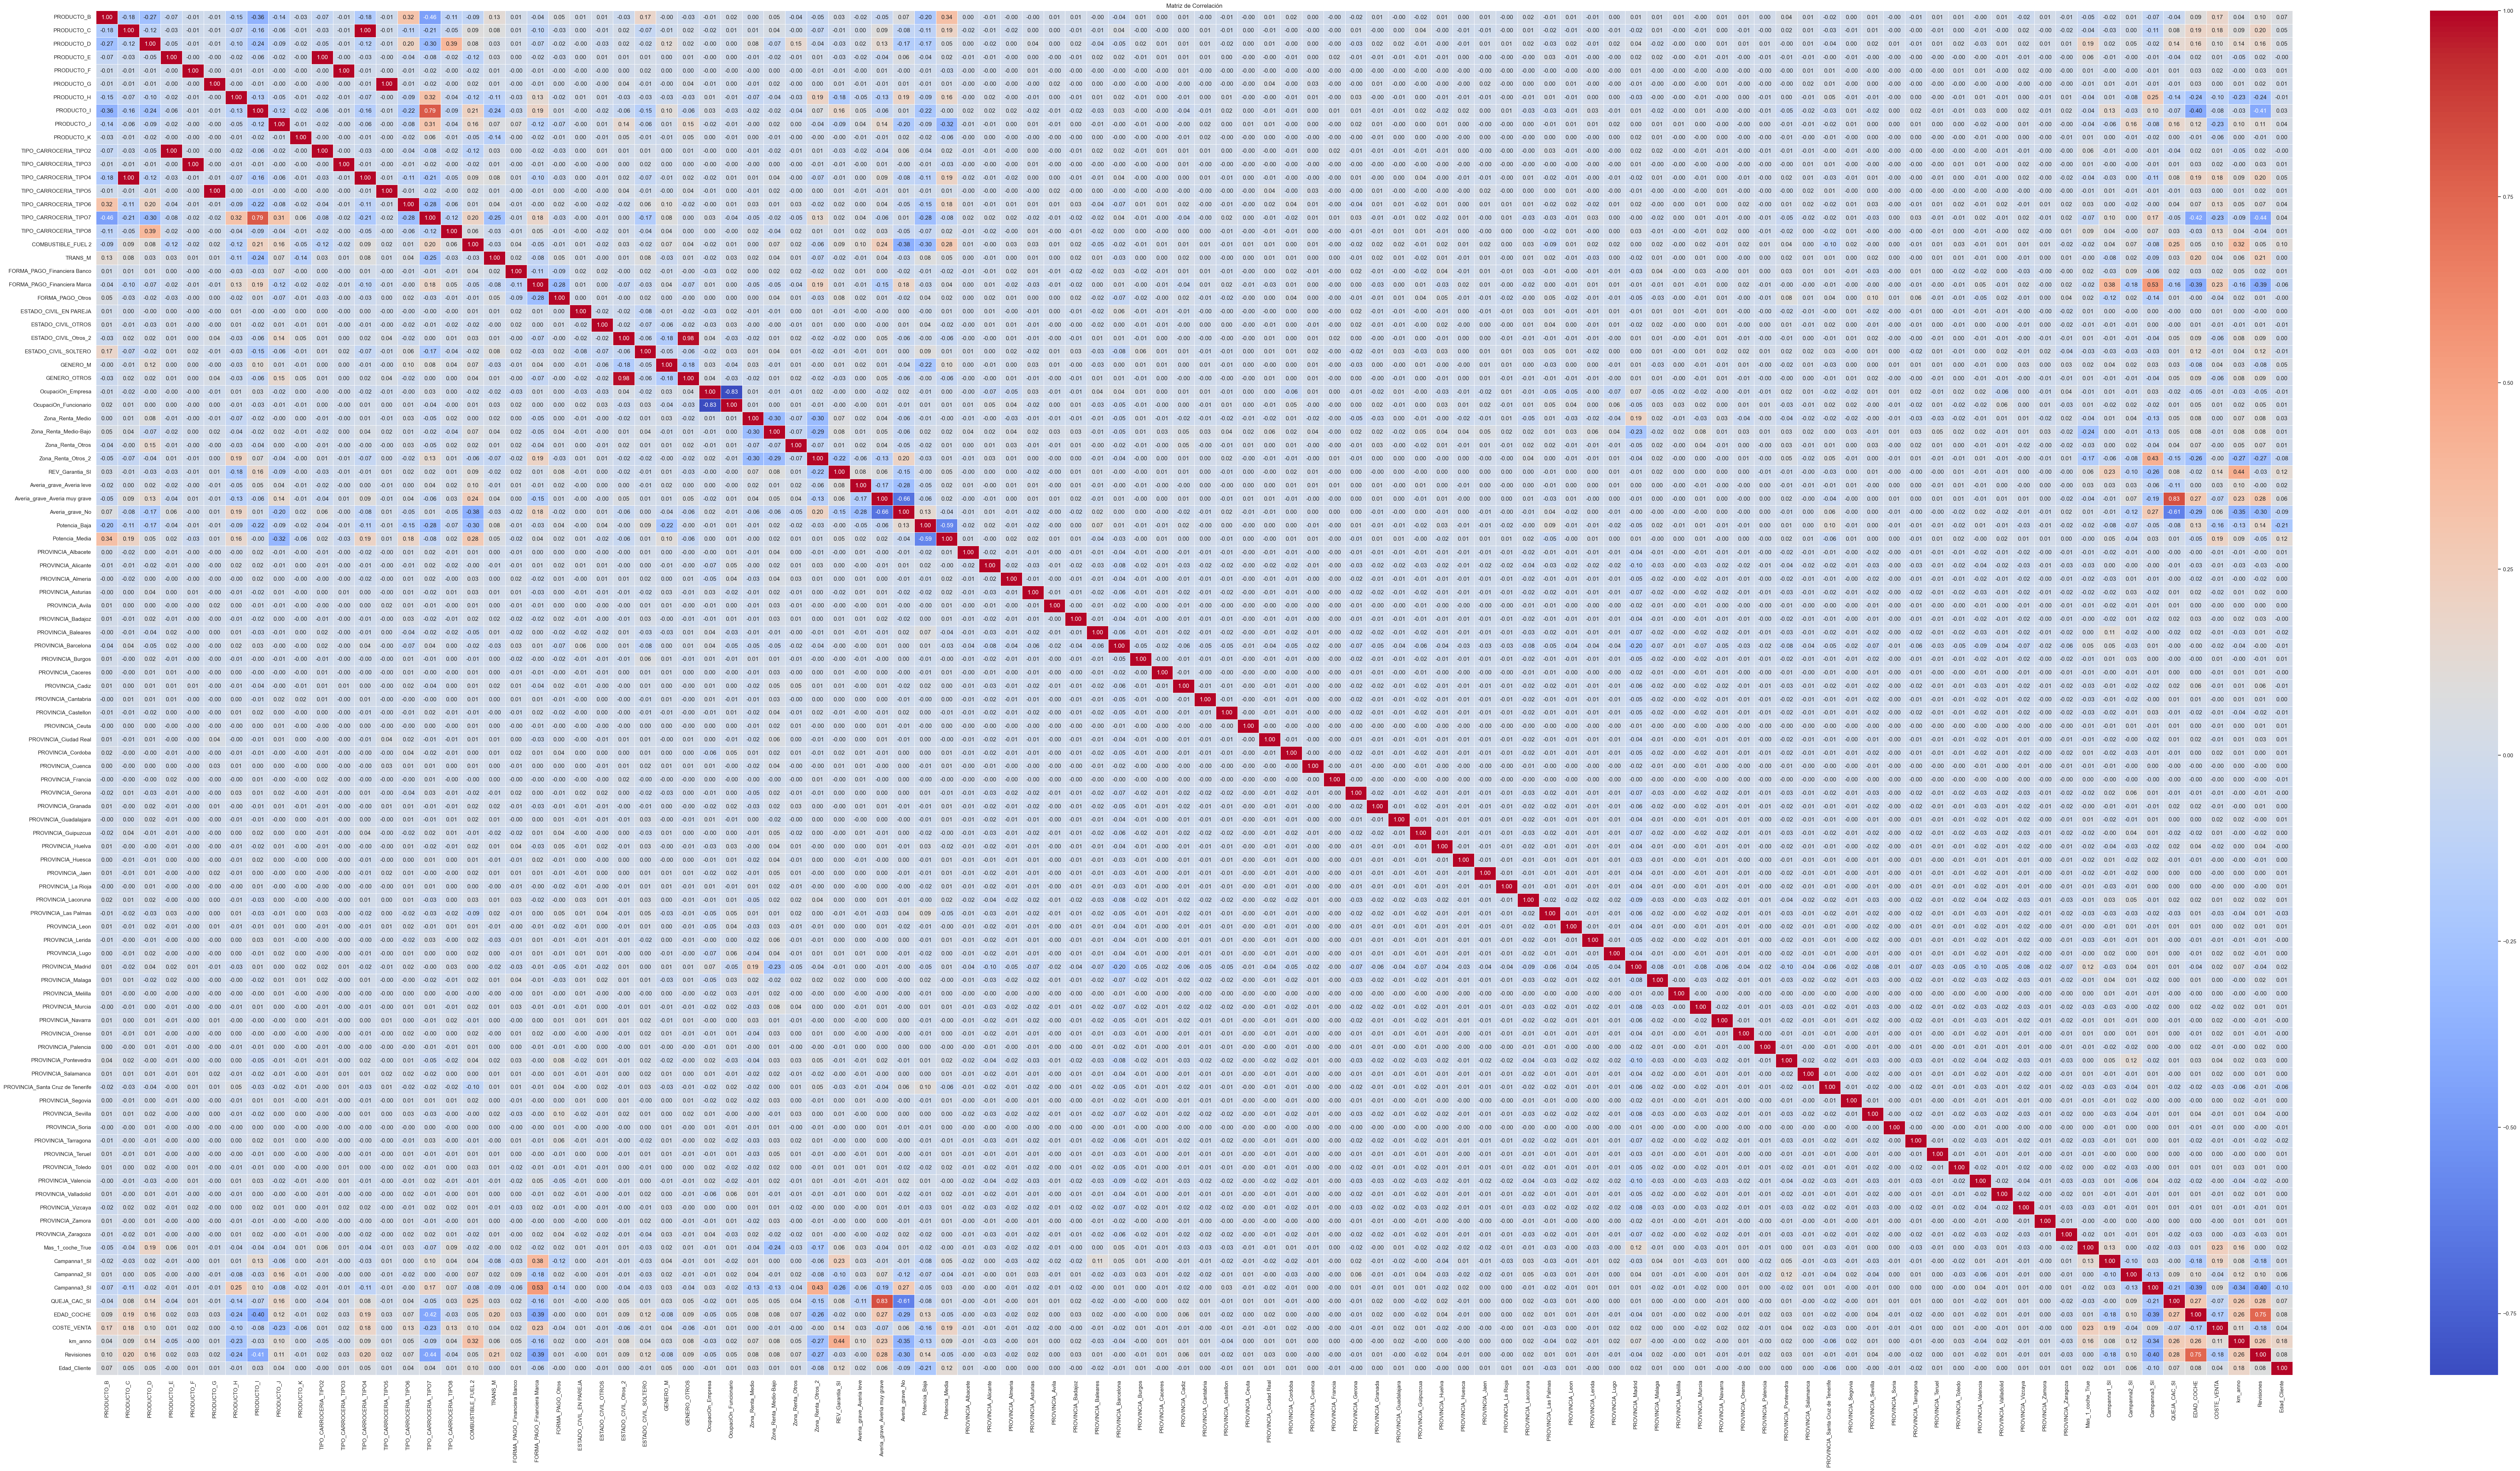

In [ ]:
plt.figure(figsize=(100, 50))
sns.heatmap(df_transformed.columns.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

In [7]:
df_transformed.columns

Index(['PRODUCTO_B', 'PRODUCTO_C', 'PRODUCTO_D', 'PRODUCTO_E', 'PRODUCTO_F',
       'PRODUCTO_G', 'PRODUCTO_H', 'PRODUCTO_I', 'PRODUCTO_J', 'PRODUCTO_K',
       ...
       'Mas_1_coche_True', 'Campanna1_SI', 'Campanna2_SI', 'Campanna3_SI',
       'QUEJA_CAC_SI', 'EDAD_COCHE', 'COSTE_VENTA', 'km_anno', 'Revisiones',
       'Edad_Cliente'],
      dtype='object', length=102)

In [9]:
corr_matrix_filtered

PRODUCTO_B  PRODUCTO_C  PRODUCTO_D  PRODUCTO_E  PRODUCTO_F  \
PRODUCTO_B      1.000000   -0.182271   -0.270891         NaN         NaN   
PRODUCTO_C     -0.182271    1.000000   -0.121581         NaN         NaN   
PRODUCTO_D     -0.270891   -0.121581    1.000000         NaN         NaN   
PRODUCTO_E           NaN         NaN         NaN         1.0         NaN   
PRODUCTO_F           NaN         NaN         NaN         NaN         1.0   
...                  ...         ...         ...         ...         ...   
EDAD_COCHE           NaN    0.186968    0.163095         NaN         NaN   
COSTE_VENTA     0.174132    0.179946         NaN         NaN         NaN   
km_anno              NaN         NaN    0.136095         NaN         NaN   
Revisiones           NaN    0.197712    0.156386         NaN         NaN   
Edad_Cliente         NaN         NaN         NaN         NaN         NaN   

              PRODUCTO_G  PRODUCTO_H  PRODUCTO_I  PRODUCTO_J  PRODUCTO_K  ...  \
PRODUCTO_B           NaN   -0.147305   -0.359234   -0.139329         NaN  ...   
PRODUCTO_C           NaN         NaN   -0.161230         NaN         NaN  ...   
PRODUCTO_D           NaN         NaN   -0.239621         NaN         NaN  ...   
PRODUCTO_E           NaN         NaN         NaN         NaN         NaN  ...   
PRODUCTO_F           NaN         NaN         NaN         NaN         NaN  ...   
...                  ...         ...         ...         ...         ...  ...   
EDAD_COCHE           NaN   -0.238131   -0.402768    0.116644         NaN  ...   
COSTE_VENTA          NaN   -0.103309         NaN   -0.225630         NaN  ...   
km_anno              NaN   -0.228724         NaN         NaN         NaN  ...   
Revisiones           NaN   -0.244974   -0.409138    0.109408         NaN  ...   
Edad_Cliente         NaN         NaN         NaN         NaN         NaN  ...   

              Mas_1_coche_True  Campanna1_SI  Campanna2_SI  Campanna3_SI  \
PRODUCTO_B                 NaN           NaN           NaN           NaN   
PRODUCTO_C                 NaN           NaN           NaN     -0.105969   
PRODUCTO_D            0.186114           NaN           NaN           NaN   
PRODUCTO_E                 NaN           NaN           NaN           NaN   
PRODUCTO_F                 NaN           NaN           NaN           NaN   
...                        ...           ...           ...           ...   
EDAD_COCHE                 NaN     -0.181250      0.101774     -0.385725   
COSTE_VENTA           0.232719      0.187618           NaN           NaN   
km_anno               0.162225           NaN      0.117984     -0.343397   
Revisiones                 NaN     -0.178584           NaN     -0.401329   
Edad_Cliente               NaN           NaN           NaN           NaN   

              QUEJA_CAC_SI  EDAD_COCHE  COSTE_VENTA   km_anno  Revisiones  \
PRODUCTO_B             NaN         NaN     0.174132       NaN         NaN   
PRODUCTO_C             NaN    0.186968     0.179946       NaN    0.197712   
PRODUCTO_D        0.141196    0.163095          NaN  0.136095    0.156386   
PRODUCTO_E             NaN         NaN          NaN       NaN         NaN   
PRODUCTO_F             NaN         NaN          NaN       NaN         NaN   
...                    ...         ...          ...       ...         ...   
EDAD_COCHE        0.273792    1.000000    -0.167831  0.262964    0.745389   
COSTE_VENTA            NaN   -0.167831     1.000000  0.106097   -0.175863   
km_anno           0.258877    0.262964     0.106097  1.000000    0.257105   
Revisiones        0.282786    0.745389    -0.175863  0.257105    1.000000   
Edad_Cliente           NaN         NaN          NaN  0.176810         NaN   

              Edad_Cliente  
PRODUCTO_B             NaN  
PRODUCTO_C             NaN  
PRODUCTO_D             NaN  
PRODUCTO_E             NaN  
PRODUCTO_F             NaN  
...                    ...  
EDAD_COCHE             NaN  
COSTE_VENTA            NaN  
km_anno            0.17681  


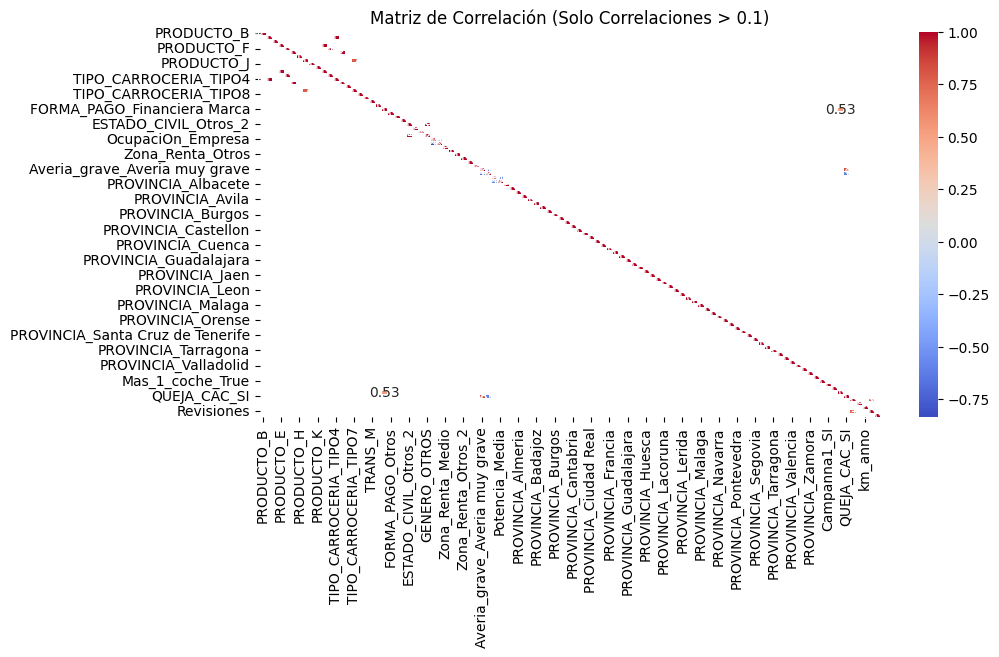

In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Seleccionar las columnas para el heatmap
selected_columns = df_transformed.columns
corr_matrix = df_transformed[selected_columns].corr()

# Crear una máscara para correlaciones menores o iguales a 0.1 (en valor absoluto)
mask = np.abs(corr_matrix) <= 0.5
# Reemplazar los valores enmascarados con NaN para que no se muestren en el heatmap
corr_matrix_filtered = corr_matrix.where(~mask)

# Crear el heatmap con las correlaciones filtradas
plt.figure(figsize=(10, 5))  # Ajustar el tamaño para mejor visualización
sns.heatmap(corr_matrix_filtered, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, cbar=True)
plt.title("Matriz de Correlación (Solo Correlaciones > 0.1)")
plt.show()

In [19]:
pd.set_option('display.max_columns', None)
df_transformed_regresor.head(1)

PRODUCTO_B  PRODUCTO_C  PRODUCTO_D  PRODUCTO_E  PRODUCTO_F  PRODUCTO_G  \
0         0.0         0.0         0.0         0.0         0.0         0.0   

   PRODUCTO_H  PRODUCTO_I  PRODUCTO_J  PRODUCTO_K  TIPO_CARROCERIA_TIPO2  \
0         0.0         0.0         0.0         0.0                    0.0   

   TIPO_CARROCERIA_TIPO3  TIPO_CARROCERIA_TIPO4  TIPO_CARROCERIA_TIPO5  \
0                    0.0                    0.0                    0.0   

   TIPO_CARROCERIA_TIPO6  TIPO_CARROCERIA_TIPO7  TIPO_CARROCERIA_TIPO8  \
0                    0.0                    0.0                    0.0   

   COMBUSTIBLE_FUEL 2  TRANS_M  FORMA_PAGO_Financiera Banco  \
0                 0.0      1.0                          0.0   

   FORMA_PAGO_Financiera Marca  FORMA_PAGO_Otros  ESTADO_CIVIL_EN PAREJA  \
0                          0.0               0.0                     0.0   

   ESTADO_CIVIL_OTROS  ESTADO_CIVIL_Otros_2  ESTADO_CIVIL_SOLTERO  GENERO_M  \
0                 0.0                   0.0                   0.0       1.0   

   GENERO_OTROS  OcupaciOn_Empresa  OcupaciOn_Funcionario  Zona_Renta_Medio  \
0           0.0                1.0                    0.0               0.0   

   Zona_Renta_Medio-Bajo  Zona_Renta_Otros  Zona_Renta_Otros_2  \
0                    1.0               0.0                 0.0   

   REV_Garantia_SI  Averia_grave_Averia leve  Averia_grave_Averia muy grave  \
0              0.0                       0.0                            1.0   

   Averia_grave_No  Potencia_Baja  Potencia_Media  PROVINCIA_Albacete  \
0              0.0            1.0             0.0                 0.0   

   PROVINCIA_Alicante  PROVINCIA_Almeria  PROVINCIA_Asturias  PROVINCIA_Avila  \
0                 0.0                0.0                 1.0              0.0   

   PROVINCIA_Badajoz  PROVINCIA_Baleares  PROVINCIA_Barcelona  \
0                0.0                 0.0                  0.0   

   PROVINCIA_Burgos  PROVINCIA_Caceres  PROVINCIA_Cadiz  PROVINCIA_Cantabria  \
0               0.0                0.0              0.0                  0.0   

   PROVINCIA_Castellon  PROVINCIA_Ceuta  PROVINCIA_Ciudad Real  \
0                  0.0              0.0                    0.0   

   PROVINCIA_Cordoba  PROVINCIA_Cuenca  PROVINCIA_Francia  PROVINCIA_Gerona  \
0                0.0               0.0                0.0               0.0   

   PROVINCIA_Granada  PROVINCIA_Guadalajara  PROVINCIA_Guipuzcua  \
0                0.0                    0.0                  0.0   

   PROVINCIA_Huelva  PROVINCIA_Huesca  PROVINCIA_Jaen  PROVINCIA_La Rioja  \
0               0.0               0.0             0.0                 0.0   

   PROVINCIA_Lacoruna  PROVINCIA_Las Palmas  PROVINCIA_Leon  PROVINCIA_Lerida  \
0                 0.0                   0.0             0.0               0.0   

   PROVINCIA_Lugo  PROVINCIA_Madrid  PROVINCIA_Malaga  PROVINCIA_Melilla  \
0             0.0               0.0               0.0                0.0   

   PROVINCIA_Murcia  PROVINCIA_Navarra  PROVINCIA_Orense  PROVINCIA_Palencia  \
0               0.0                0.0               0.0                 0.0   

   PROVINCIA_Pontevedra  PROVINCIA_Salamanca  \
0                   0.0                  0.0   

   PROVINCIA_Santa Cruz de Tenerife  PROVINCIA_Segovia  PROVINCIA_Sevilla  \
0                               0.0                0.0                0.0   

   PROVINCIA_Soria  PROVINCIA_Tarragona  PROVINCIA_Teruel  PROVINCIA_Toledo  \
0              0.0                  0.0               0.0               0.0   

   PROVINCIA_Valencia  PROVINCIA_Valladolid  PROVINCIA_Vizcaya  \
0                 0.0                   0.0                0.0   

   PROVINCIA_Zamora  PROVINCIA_Zaragoza  Mas_1_coche_True  Campanna1_SI  \
0               0.0                 0.0                 0             1   

   Campanna2_SI  Campanna3_SI  QUEJA_CAC_SI  EDAD_COCHE  COSTE_VENTA  km_anno  \
0             0             0             1         208         2892

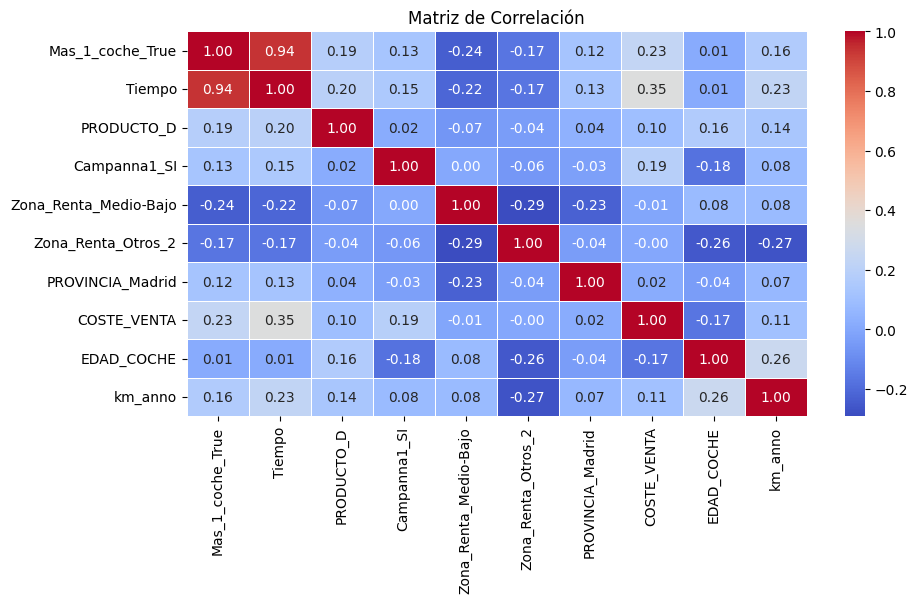

In [20]:
plt.figure(figsize=(10, 5))
col = ['Mas_1_coche_True','Tiempo', 'PRODUCTO_D', 'Campanna1_SI', 'Zona_Renta_Medio-Bajo', 'Zona_Renta_Otros_2', 'PROVINCIA_Madrid', 'COSTE_VENTA', 'EDAD_COCHE', 'km_anno']
sns.heatmap(df_transformed_regresor[col].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

## 1.6 Outliers (Valores Atípicos)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_16804\1814731142.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette="Set2")
C:\Users\Usuario\AppData\Local\Temp\ipykernel_16804\1814731142.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette="Set2")
C:\Users\Usuario\AppData\Local\Temp\ipykernel_16804\1814731142.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette="Set2")
C:\Users\Usuario\AppData\Local\Temp\ipykernel_16804\1814731142.py:4: FutureWarning: 

Passing `palette` without assigning

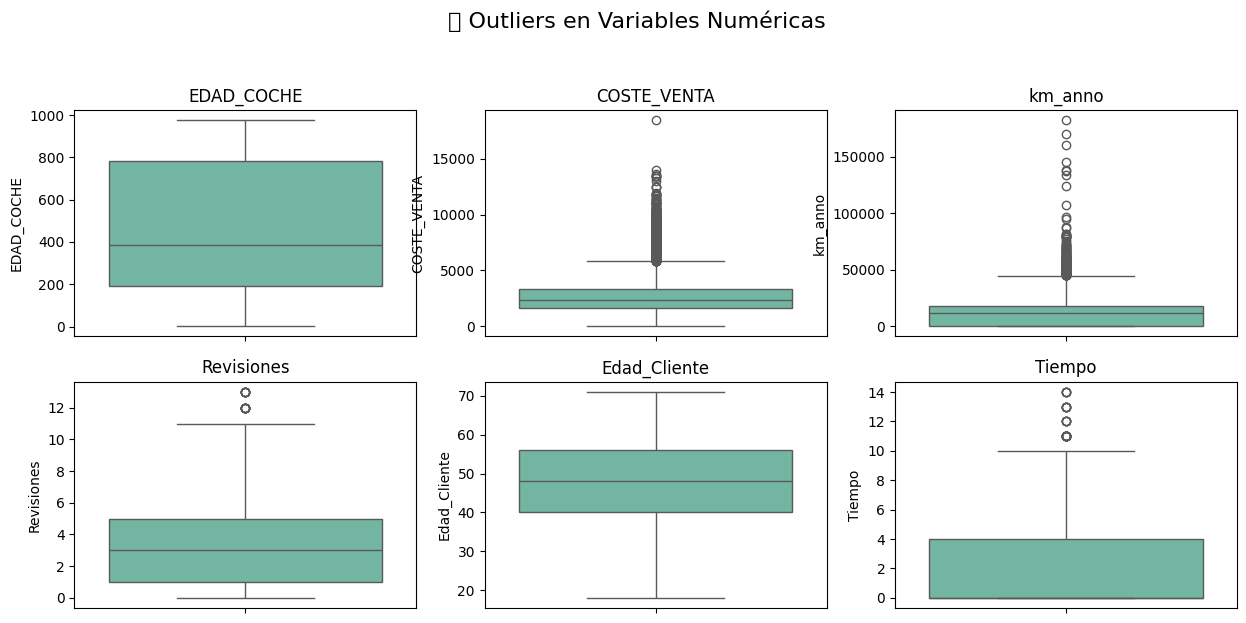

In [51]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col], palette="Set2")
    plt.title(col)

plt.suptitle("📊 Outliers en Variables Numéricas", fontsize=16)
plt.show()

Conclusiones:
- Hay outliers en las numéricas.
- En edad de coche, las unidades son en días (ya que de otra forma no tendría sentido).

## 1.7 Análisis Bivariado: Relación entre EDAD_COCHE y COSTE_VENTA

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


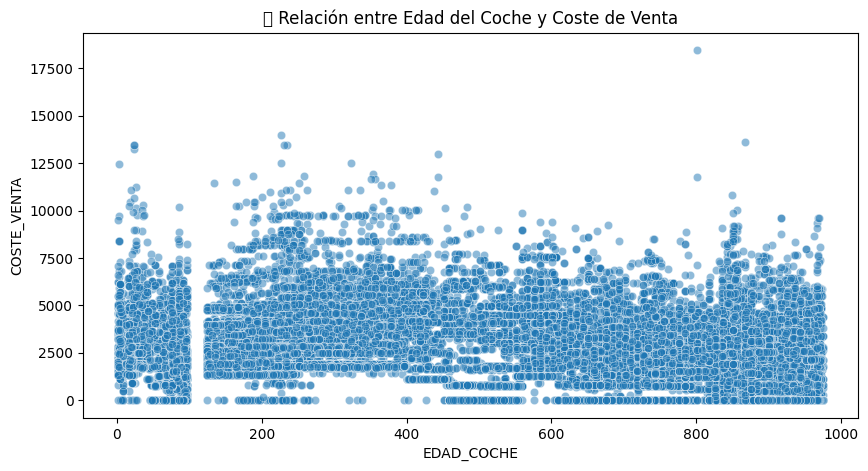

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="EDAD_COCHE", y="COSTE_VENTA", alpha=0.5)
plt.title("📈 Relación entre Edad del Coche y Coste de Venta")
plt.show()

## 1.8 Análisis Bivariado: Distribución de Edad de Cliente por Tipo de Carrocería

In [601]:
df.columns

Index(['CODE', 'PRODUCTO', 'TIPO_CARROCERIA', 'COMBUSTIBLE', 'Potencia',
       'TRANS', 'FORMA_PAGO', 'ESTADO_CIVIL', 'GENERO', 'OcupaciOn',
       'PROVINCIA', 'Campanna1', 'Campanna2', 'Campanna3', 'Zona_Renta',
       'REV_Garantia', 'Averia_grave', 'QUEJA_CAC', 'EDAD_COCHE',
       'COSTE_VENTA', 'km_anno', 'Mas_1_coche', 'Revisiones', 'Edad_Cliente',
       'Tiempo'],
      dtype='object')

C:\Users\Usuario\AppData\Local\Temp\ipykernel_20492\1776838422.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="PROVINCIA", y="Mas_1_coche", palette="coolwarm")


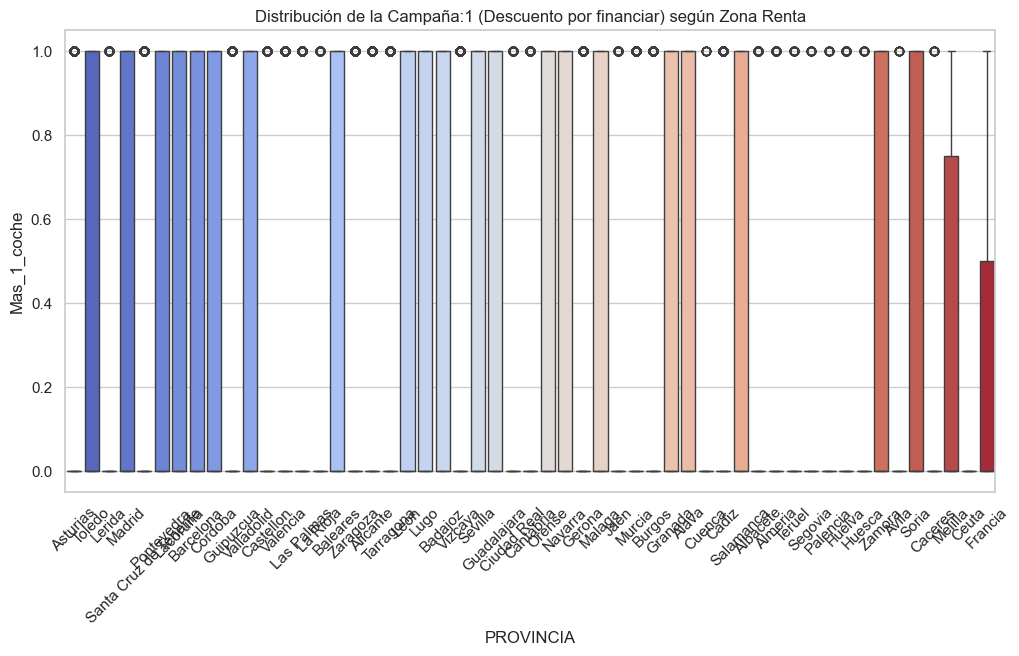

In [629]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="PROVINCIA", y="Mas_1_coche", palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Distribución de la Campaña:1 (Descuento por financiar) según Zona Renta")
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_20492\4003522827.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Campanna1", y="Mas_1_coche", palette="coolwarm")


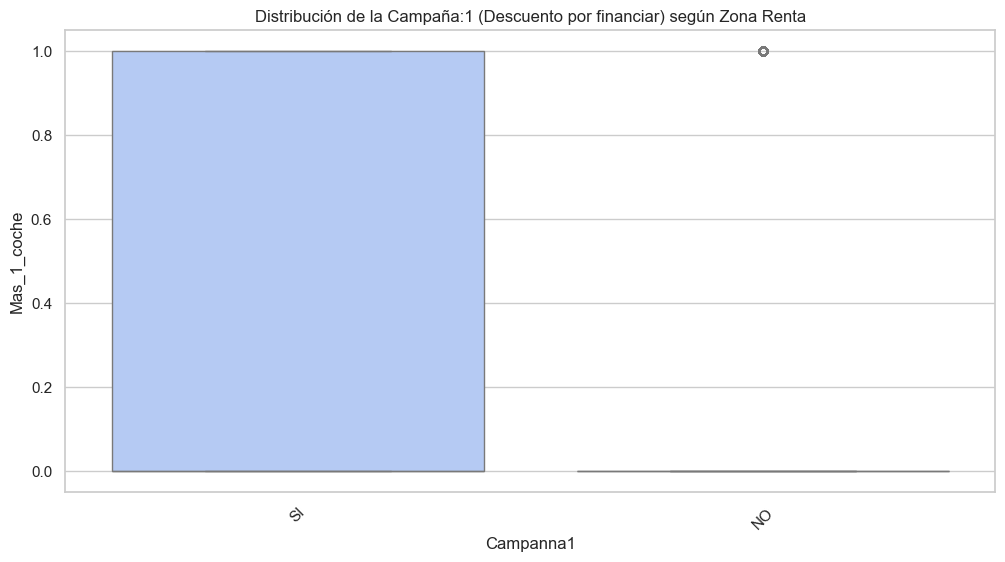

In [621]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Campanna1", y="Mas_1_coche", palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Distribución de la Campaña:1 (Descuento por financiar) según Zona Renta")
plt.show()

## 1.9 Análsis gráfico

### Distribución del target

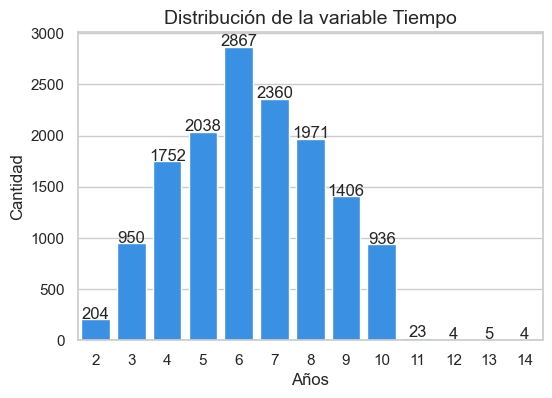

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el estilo de Seaborn
sns.set_theme(style="whitegrid")

# Extraer la columna 'Tiempo' del DataFrame filtrado
filtered_df = df_transformed_regresor[df_transformed_regresor['Mas_1_coche_True'] == 1]
x = filtered_df['Tiempo']

# Crear el gráfico de conteo
plt.figure(figsize=(6, 4))
sns.countplot(x=x, color="#1E90FF")

# Agregar etiquetas y título
plt.xlabel("Años", fontsize=12)
plt.ylabel("Cantidad", fontsize=12)
plt.title("Distribución de la variable Tiempo", fontsize=14)

# Mostrar valores en las barras
for p in plt.gca().patches:
    plt.gca().text(p.get_x() + p.get_width()/2, p.get_height() + 5, int(p.get_height()), 
                   ha='center', fontsize=12)

# Mostrar el gráfico
plt.show()


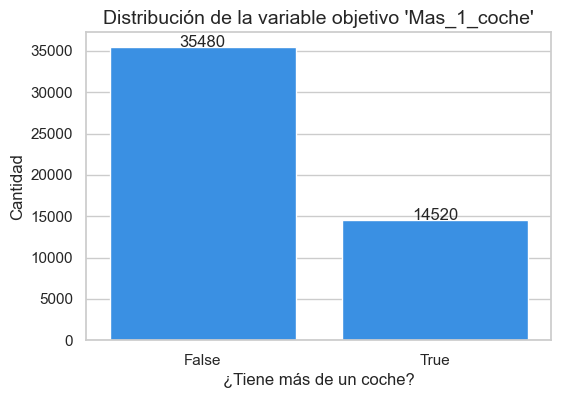

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el estilo de Seaborn
sns.set_theme(style="whitegrid")

# Crear el gráfico de conteo con paleta azul
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Mas_1_coche"], color="#1E90FF")

# Agregar etiquetas y título
plt.xlabel("¿Tiene más de un coche?", fontsize=12)
plt.ylabel("Cantidad", fontsize=12)
plt.title("Distribución de la variable objetivo 'Mas_1_coche'", fontsize=14)

# Mostrar valores en las barras
for p in plt.gca().patches:
    plt.gca().text(p.get_x() + p.get_width()/2, p.get_height() + 5, int(p.get_height()), 
                   ha='center', fontsize=12)

# Mostrar el gráfico
plt.show()


# 2. Feature Engineering

Conclusiones del EDA: 

1. Vemos que hay nulos en las columnas de "ESTADO_CIVIL", "GENERO" y "Zona_Renta".

 - Imputarlos como "desconocidos". En la columna Zona_Renta hay que ver si "otros" es de alto poder adquisitivo, en el caso de que no, imputamos a los nulos como "otros"
 - Los datos están bien tipificados, la columna 'Tiempo' esta en años mientras que la de "Edad de coche" está en días (ya que de otra forma no tendría sentido), sería buena idea convertirlos en unidades en años para que estén igual de la columna 'Tiempo'.
 - Codificación encoder para las categoricas.

 2. Ouliers 

 - Hay outliers, en coste de venta, km_anno, Revisiones, Tiempo

 3. Codificación de las  columnas categóricas:

 - En provincia, impitarles el código postal, o frecuencias según la variable target.
 - De momento la he eliminado.

## 2.1 Sklearn Pipeline

Explicación del Pipeline

1. Reemplazo de valores nulos (replace_na_values): Zona_Renta, ESTADO_CIVIL, GENERO → Se reemplazan NaN por 'Otros' y 'OTROS'. No me gusta.

2. Eliminación de CODE: No es necesario agregarlo al ColumnTransformer, simplemente no lo incluimos en las transformaciones.

3. One-Hot Encoding (ohe_transformer): Convierte variables categóricas en columnas binarias (dummies).
Maneja valores desconocidos con handle_unknown='ignore'.

4. Ordinal Encoding para Potencia: Mapea 'Baja' → 0, 'Media' → 1, 'Alta' → 2'.

5. Conversión de Booleanos (binary_transformer): Convierte SI/NO y True/False a 0 y 1.

6. Imputación de PROVINCIA con frecuencia (impute_provincia_with_frequency): Cuenta la frecuencia de cada PROVINCIA en relación a Mas_1_coche. Rellena valores faltantes con 0.

In [259]:
df = pd.read_csv('Consulta.csv')

In [267]:
df['GENERO'].unique()

array(['M', 'F', nan], dtype=object)

In [290]:
df_test = df.copy()
def replace_na_values(df):
    df = df.copy()  # Evita modificar el DataFrame original
    df['Zona_Renta'] = df['Zona_Renta'].replace({pd.NA: 'Otros_2'})
    df['ESTADO_CIVIL'] = df['ESTADO_CIVIL'].replace({pd.NA: 'Otros_2'})
    df['GENERO'] = df['GENERO'].replace({np.nan: 'OTROS', pd.NA: 'OTROS'})
    return df

df_test =replace_na_values(df_test)

In [291]:
df_test['Zona_Renta'].unique()

array(['Medio-Bajo', 'Medio', 'Alto', 'Otros_2', 'Otros'], dtype=object)

In [284]:
df['Zona_Renta'].unique()

array(['Medio-Bajo', 'Medio', 'Alto', nan, 'Otros'], dtype=object)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, FunctionTransformer, StandardScaler
from sklearn.compose import ColumnTransformer

# Definir las columnas a transformar
drop_column = ['CODE', 'Tiempo']
categorical_ohe = ['PRODUCTO', 'TIPO_CARROCERIA', 'COMBUSTIBLE', 'TRANS', 'FORMA_PAGO', 'ESTADO_CIVIL', 'GENERO', 'OcupaciOn', 'Zona_Renta', 'REV_Garantia', 'Averia_grave', 'Potencia', 'PROVINCIA']
# categorical_ordinal = ['Potencia'] # ohe
boolean_columns = ['Mas_1_coche', 'Campanna1', 'Campanna2', 'Campanna3', 'QUEJA_CAC']
# frequency_column = ['PROVINCIA']
num_columns = ['EDAD_COCHE', 'COSTE_VENTA', 'km_anno', 'Revisiones', 'Edad_Cliente']

# Paso 1: Transformaciones personalizadas
def replace_na_values(df):
    df = df.copy()  # Evita modificar el DataFrame original
    df['Zona_Renta'] = df['Zona_Renta'].replace({pd.NA: 'Otros_2'})
    df['ESTADO_CIVIL'] = df['ESTADO_CIVIL'].replace({pd.NA: 'Otros_2'})
    df['GENERO'] = df['GENERO'].replace({np.nan: 'OTROS', pd.NA: 'OTROS'})
    return df

replace_transformer = FunctionTransformer(replace_na_values, feature_names_out='one-to-one', validate=False)

# Paso 2: One-Hot Encoding
ohe_transformer = OneHotEncoder(handle_unknown='ignore', drop='first')

# Paso 3: Ordinal Encoding para 'Potencia'
'''
potencia_order = [['Baja', 'Media', 'Alta']]
ordinal_transformer = OrdinalEncoder(categories=potencia_order)
'''
# Paso 4: Convertir booleanos en 0 y 1
binary_transformer = OneHotEncoder(drop='if_binary', dtype=int)

# Paso 5: Imputación basada en frecuencia de 'PROVINCIA'
'''def impute_provincia_with_frequency(df):
    df = df.copy()

    if 'PROVINCIA' in df.columns and 'Mas_1_coche' in df.columns:
        
        provincia_freq = df.groupby('PROVINCIA')['Mas_1_coche'].count()
        df['PROVINCIA'] = df['PROVINCIA'].map(provincia_freq).fillna(0)

    return df

frequency_transformer = FunctionTransformer(impute_provincia_with_frequency, feature_names_out='one-to-one', validate=False)
'''
# Estandarización de las variables numéricas
scaler = StandardScaler()

# Crear ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('ohe', ohe_transformer, categorical_ohe),
    #('ordinal', ordinal_transformer, categorical_ordinal),
    ('binary', binary_transformer, boolean_columns),
    ('numerical', scaler, num_columns)
], remainder='passthrough')

# Crear Pipeline completo
pipeline = Pipeline(steps=[
    ('replace_na', replace_transformer),
    #('impute_frequency', frequency_transformer),
    ('preprocessing', preprocessor)
])

# Supongamos que df es el DataFrame de entrada
df_clean = df.drop(columns=drop_column, errors='ignore')  # Eliminar antes del pipeline
df_transformed = pipeline.fit_transform(df_clean)

# Convertir a DataFrame
df_transformed = pd.DataFrame(df_transformed, columns=preprocessor.get_feature_names_out())

In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, StandardScaler
from sklearn.compose import ColumnTransformer

# Definir las columnas a transformar
drop_column = ['CODE', 'Tiempo']
categorical_ohe = ['PRODUCTO', 'TIPO_CARROCERIA', 'COMBUSTIBLE', 'TRANS', 'FORMA_PAGO', 'ESTADO_CIVIL', 'GENERO', 'OcupaciOn', 'Zona_Renta', 'REV_Garantia', 'Averia_grave', 'Potencia', 'PROVINCIA']
boolean_columns = ['Mas_1_coche', 'Campanna1', 'Campanna2', 'Campanna3', 'QUEJA_CAC']
num_columns = ['EDAD_COCHE', 'COSTE_VENTA', 'km_anno', 'Revisiones', 'Edad_Cliente']

def replace_na_values(df):
    df = df.copy()
    df['Zona_Renta'] = df['Zona_Renta'].replace({pd.NA: 'Otros_2'})
    df['ESTADO_CIVIL'] = df['ESTADO_CIVIL'].replace({pd.NA: 'Otros_2'})
    df['GENERO'] = df['GENERO'].replace({np.nan: 'OTROS', pd.NA: 'OTROS'})
    return df

replace_transformer = FunctionTransformer(replace_na_values, feature_names_out='one-to-one', validate=False)
ohe_transformer = OneHotEncoder(handle_unknown='ignore', drop='first')
binary_transformer = OneHotEncoder(drop='if_binary', dtype=int)
scaler = StandardScaler()

preprocessor = ColumnTransformer(transformers=[
    ('ohe', ohe_transformer, categorical_ohe),
    ('binary', binary_transformer, boolean_columns),
    ('numerical', scaler, num_columns)
], remainder='passthrough')

pipeline = Pipeline(steps=[
    ('replace_na', replace_transformer),
    ('preprocessing', preprocessor)
])

df_clean = df.drop(columns=drop_column, errors='ignore')
df_transformed = pipeline.fit_transform(df_clean)
df_transformed = pd.DataFrame(df_transformed, columns=preprocessor.get_feature_names_out())

## 2.2 Function Tranformer para los modelos de clasifiación

In [264]:
df.columns

Index(['CODE', 'PRODUCTO', 'TIPO_CARROCERIA', 'COMBUSTIBLE', 'Potencia',
       'TRANS', 'FORMA_PAGO', 'ESTADO_CIVIL', 'GENERO', 'OcupaciOn',
       'PROVINCIA', 'Campanna1', 'Campanna2', 'Campanna3', 'Zona_Renta',
       'REV_Garantia', 'Averia_grave', 'QUEJA_CAC', 'EDAD_COCHE',
       'COSTE_VENTA', 'km_anno', 'Mas_1_coche', 'Revisiones', 'Edad_Cliente',
       'Tiempo'],
      dtype='object')

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Definir las columnas a transformar
drop_column = ['CODE', 'Tiempo']
categorical_ohe = ['PRODUCTO', 'TIPO_CARROCERIA', 'COMBUSTIBLE', 'TRANS', 'FORMA_PAGO', 
                   'ESTADO_CIVIL', 'GENERO', 'OcupaciOn', 'Zona_Renta', 'REV_Garantia', 
                   'Averia_grave', 'Potencia', 'PROVINCIA']
#provincia = ['PROVINCIA']
boolean_columns = ['Mas_1_coche', 'Campanna1', 'Campanna2', 'Campanna3', 'QUEJA_CAC']
num_columns = ['EDAD_COCHE', 'COSTE_VENTA', 'km_anno', 'Revisiones', 'Edad_Cliente']

def replace_na_values(df):
    df = df.copy()
    df['Zona_Renta'] = df['Zona_Renta'].replace({pd.NA: 'Otros_2'})
    df['ESTADO_CIVIL'] = df['ESTADO_CIVIL'].replace({pd.NA: 'Otros_2'})
    df['GENERO'] = df['GENERO'].replace({np.nan: 'OTROS', pd.NA: 'OTROS'})
    return df

def encode_categorical(df):
    encoder = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)
    encoded = encoder.fit_transform(df[categorical_ohe])
    encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_ohe), index=df.index)
    return encoded_df, encoder

def encode_boolean(df):
    encoder = OneHotEncoder(drop='if_binary', dtype=int, sparse_output=False)
    encoded = encoder.fit_transform(df[boolean_columns])
    encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(boolean_columns), index=df.index)
    return encoded_df, encoder

'''def impute_provincia_with_frequency(df):
    if 'PROVINCIA' in df.columns and 'Mas_1_coche' in df.columns:
        provincia_freq = df['PROVINCIA'].map(df['PROVINCIA'].value_counts(normalize=True))
        df['PROVINCIA'] = df['PROVINCIA'].map(provincia_freq).fillna(0)
    return df'''

def scale_numerical(df):
    scaler = StandardScaler()
    scaled = scaler.fit_transform(df[num_columns])
    scaled_df = pd.DataFrame(scaled, columns=num_columns, index=df.index)
    return scaled_df, scaler

def preprocess_data(df):
    df_clean = df.drop(columns=drop_column, errors='ignore')  # Eliminar columnas innecesarias
    df_clean = replace_na_values(df_clean)  # Reemplazar valores nulos
    
    encoded_categorical, cat_encoder = encode_categorical(df_clean)
    encoded_boolean, bool_encoder = encode_boolean(df_clean)
    scaled_numerical, num_scaler = scale_numerical(df_clean)
    
    #df_clean = impute_provincia_with_frequency(df_clean)  # Aplicar imputación
    
    # Concatenar los datos transformados
    df_transformed = pd.concat([encoded_categorical, encoded_boolean, scaled_numerical], axis=1)
    
    return df_transformed, cat_encoder, bool_encoder, num_scaler

# Aplicar la transformación
df_transformed, cat_encoder, bool_encoder, num_scaler = preprocess_data(df)


## 2.3 Function tranformer Modelos de Regresión

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Definir las columnas a transformar
drop_column = ['CODE']  # Solo eliminamos la columna 'CODE', mantenemos 'Tiempo'
categorical_ohe = ['PRODUCTO', 'TIPO_CARROCERIA', 'COMBUSTIBLE', 'TRANS', 'FORMA_PAGO', 
                   'ESTADO_CIVIL', 'GENERO', 'OcupaciOn', 'Zona_Renta', 'REV_Garantia', 
                   'Averia_grave', 'Potencia', 'PROVINCIA']
boolean_columns = ['Mas_1_coche', 'Campanna1', 'Campanna2', 'Campanna3', 'QUEJA_CAC']
num_columns = ['EDAD_COCHE', 'COSTE_VENTA', 'km_anno', 'Revisiones', 'Edad_Cliente', 'Tiempo']

def replace_na_values(df):
    df = df.copy()
    df['Zona_Renta'] = df['Zona_Renta'].replace({pd.NA: 'Otros_2'})
    df['ESTADO_CIVIL'] = df['ESTADO_CIVIL'].replace({pd.NA: 'Otros_2'})
    df['GENERO'] = df['GENERO'].replace({np.nan: 'OTROS', pd.NA: 'OTROS'})
    return df

def encode_categorical(df):
    encoder = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)
    encoded = encoder.fit_transform(df[categorical_ohe])
    encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_ohe), index=df.index)
    return encoded_df, encoder

def encode_boolean(df):
    encoder = OneHotEncoder(drop='if_binary', dtype=int, sparse_output=False)
    encoded = encoder.fit_transform(df[boolean_columns])
    encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(boolean_columns), index=df.index)
    return encoded_df, encoder

def preprocess_data(df):
    # Eliminar solo la columna 'CODE', no tocamos 'Tiempo'
    df_clean = df.drop(columns=drop_column, errors='ignore')  
    
    df_clean = replace_na_values(df_clean)  # Reemplazar valores nulos
    
    # Codificar variables categóricas y booleanas
    encoded_categorical, cat_encoder = encode_categorical(df_clean)
    encoded_boolean, bool_encoder = encode_boolean(df_clean)
    
    # Mantener las variables numéricas tal como están
    num_data = df_clean[num_columns]  # No hacer scaling a las columnas numéricas
    
    # Concatenar los datos transformados
    df_transformed = pd.concat([encoded_categorical, encoded_boolean, num_data], axis=1)
    
    return df_transformed, cat_encoder, bool_encoder

# Aplicar la transformación
df_transformed_regresor, cat_encoder, bool_encoder = preprocess_data(df)



In [441]:
df_transformed_regresor

PRODUCTO_B  PRODUCTO_C  PRODUCTO_D  PRODUCTO_E  PRODUCTO_F  PRODUCTO_G  \
0             0.0         0.0         0.0         0.0         0.0         0.0   
1             0.0         0.0         0.0         0.0         0.0         0.0   
2             0.0         0.0         0.0         0.0         0.0         0.0   
3             0.0         0.0         0.0         0.0         0.0         0.0   
4             0.0         0.0         0.0         0.0         0.0         0.0   
...           ...         ...         ...         ...         ...         ...   
49995         0.0         0.0         1.0         0.0         0.0         0.0   
49996         0.0         0.0         1.0         0.0         0.0         0.0   
49997         0.0         0.0         1.0         0.0         0.0         0.0   
49998         0.0         0.0         1.0         0.0         0.0         0.0   
49999         0.0         0.0         1.0         0.0         0.0         0.0   

       PRODUCTO_H  PRODUCTO_I  PRODUCTO_J  PRODUCTO_K  TIPO_CARROCERIA_TIPO2  \
0             0.0         0.0         0.0         0.0                    0.0   
1             0.0         0.0         0.0         0.0                    0.0   
2             0.0         0.0         0.0         0.0                    0.0   
3             0.0         0.0         0.0         0.0                    0.0   
4             0.0         0.0         0.0         0.0                    0.0   
...           ...         ...         ...         ...                    ...   
49995         0.0         0.0         0.0         0.0                    0.0   
49996         0.0         0.0         0.0         0.0                    0.0   
49997         0.0         0.0         0.0         0.0                    0.0   
49998         0.0         0.0         0.0         0.0                    0.0   
49999         0.0         0.0         0.0         0.0                    0.0   

       TIPO_CARROCERIA_TIPO3  TIPO_CARROCERIA_TIPO4  TIPO_CARROCERIA_TIPO5  \
0                        0.0                    0.0                    0.0   
1                        0.0                    0.0                    0.0   
2                        0.0                    0.0                    0.0   
3                        0.0                    0.0                    0.0   
4                        0.0                    0.0                    0.0   
...                      ...                    ...                    ...   
49995                    0.0                    0.0                    0.0   
49996                    0.0                    0.0                    0.0   
49997                    0.0                    0.0                    0.0   
49998                    0.0                    0.0                    0.0   
49999                    0.0                    0.0                    0.0   

       TIPO_CARROCERIA_TIPO6  TIPO_CARROCERIA_TIPO7  TIPO_CARROCERIA_TIPO8  \
0                        0.0                    0.0                    0.0   
1                        0.0                    0.0                    0.0   
2                        0.0                    0.0                    0.0   
3                        0.0                    0.0                    0.0   
4                        0.0                    0.0                    0.0   
...                      ...                    ...                    ...   
49995                    0.0                    0.0                    0.0   
49996                    0.0                    0.0                    0.0   
49997                    0.0                    0.0                    0.0   
49998                    0.0                    0.0                    0.0   
49999                    0.0                    0.0                    0.0   

       COMBUSTIBLE_FUEL 2  TRANS_M  FORMA_PAGO_Financiera Banco  \
0                     0.0      1.0                          0.0   
1                     0.0      1.0                          0.0  

# 3.  Modelo de Clasifiación | Perceptrón Multicapa

In [360]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf                                             
from tensorflow.keras import layers, models                        
from sklearn.datasets import load_breast_cancer

In [377]:
# Eliminar la columna target
df_transformed_train = df_transformed.drop(columns=['Mas_1_coche_True'])

# Extraer la variable target (Mas_1_coche)

y = df_transformed['Mas_1_coche_True']
X = df_transformed_train.copy()  # Variables predictoras
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_20492\1112282743.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette="pastel")


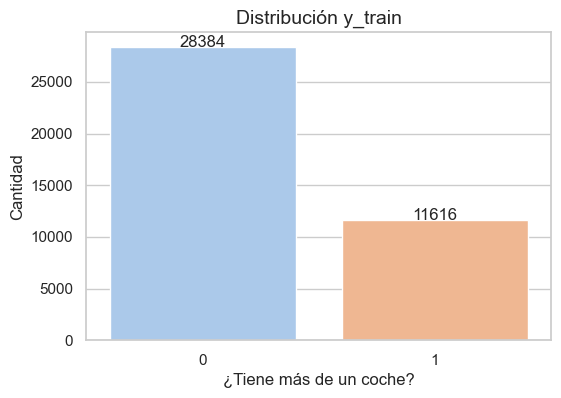

In [381]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el estilo de Seaborn
sns.set_theme(style="whitegrid")

# Crear el gráfico de conteo
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train, palette="pastel")

# Agregar etiquetas y título
plt.xlabel("¿Tiene más de un coche?", fontsize=12)
plt.ylabel("Cantidad", fontsize=12)
plt.title("Distribución y_train", fontsize=14)

# Mostrar valores en las barras
for p in plt.gca().patches:
    plt.gca().text(p.get_x() + p.get_width()/2, p.get_height() + 5, int(p.get_height()), 
                   ha='center', fontsize=12)

# Mostrar el gráfico
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_20492\3529509679.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, palette="pastel")


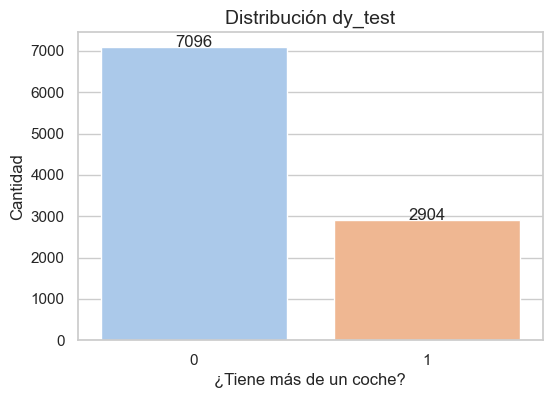

In [382]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el estilo de Seaborn
sns.set_theme(style="whitegrid")

# Crear el gráfico de conteo
plt.figure(figsize=(6, 4))
sns.countplot(x=y_test, palette="pastel")

# Agregar etiquetas y título
plt.xlabel("¿Tiene más de un coche?", fontsize=12)
plt.ylabel("Cantidad", fontsize=12)
plt.title("Distribución dy_test", fontsize=14)

# Mostrar valores en las barras
for p in plt.gca().patches:
    plt.gca().text(p.get_x() + p.get_width()/2, p.get_height() + 5, int(p.get_height()), 
                   ha='center', fontsize=12)

# Mostrar el gráfico
plt.show()

In [383]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, confusion_matrix, precision_recall_curve, roc_curve, mean_squared_error
from sklearn.metrics import ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

# 🔹 Construcción del modelo de Red Neuronal
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(X_train.shape[1],)),  # Capa de entrada (ajustar input_shape)
    tf.keras.layers.LeakyReLU(alpha=0.01),  # Activación LeakyReLU
    tf.keras.layers.Dropout(0.5),  # Dropout con 30%

    tf.keras.layers.Dense(64),
    tf.keras.layers.LeakyReLU(alpha=0.01),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(32),
    tf.keras.layers.LeakyReLU(alpha=0.01),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(16),
    tf.keras.layers.LeakyReLU(alpha=0.01),
    tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Dense(1, activation='sigmoid')  # Capa de salida con activación sigmoide
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Configurar EarlyStopping para detener el entrenamiento si no mejora la validación
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 🔹 Entrenar modelo
history = model.fit(X_train, y_train, 
                    epochs=25, batch_size=32, 
                    validation_data=(X_test, y_test), 
                    callbacks=[early_stopping])

# 🔹 Evaluar modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f"🔍 Precisión en test: {accuracy:.4f}")

# 🔹 Predicciones
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

c:\Users\Usuario\Desktop\UAX_3\SegundoCutrimestre\Redes Neuronales\Actividad_1\venv-deep-learning\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Usuario\Desktop\UAX_3\SegundoCutrimestre\Redes Neuronales\Actividad_1\venv-deep-learning\lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7378 - loss: 0.5251 - val_accuracy: 0.8216 - val_loss: 0.3722
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8123 - loss: 0.3952 - val_accuracy: 0.8409 - val_loss: 0.3453
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8312 - loss: 0.3630 - val_accuracy: 0.8468 - val_loss: 0.3315
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8386 - loss: 0.3442 - val_accuracy: 0.8504 - val_loss: 0.3196
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8441 - loss: 0.3383 - val_accuracy: 0.8541 - val_loss: 0.3118
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8480 - loss: 0.3267 - val_accuracy: 0.8565 - val_loss: 0.3102
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8524 - loss: 0.3142 - val_accuracy: 0.8581 - val_loss: 0.3053
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8523 - loss: 0.3138 - 

## 3.1 Métricas

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


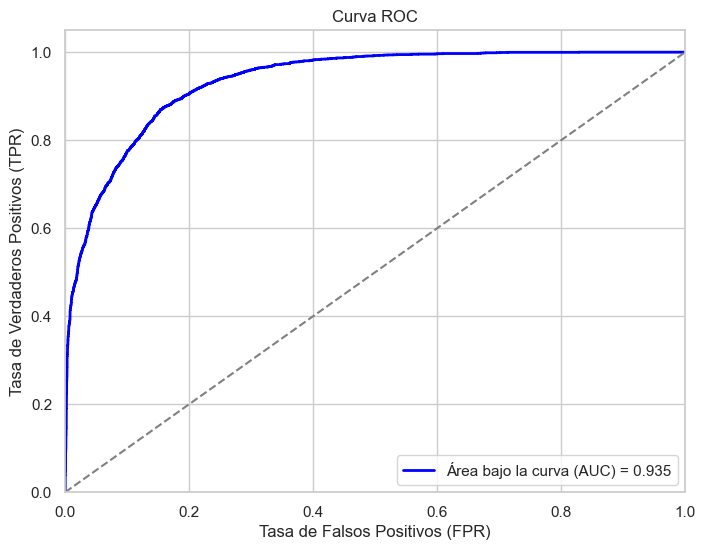

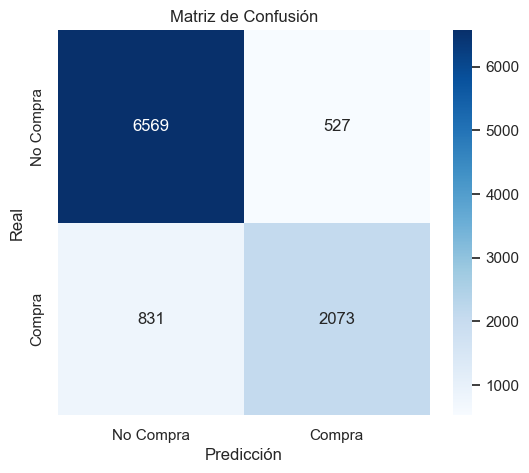

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7096
           1       0.80      0.71      0.75      2904

    accuracy                           0.86     10000
   macro avg       0.84      0.82      0.83     10000
weighted avg       0.86      0.86      0.86     10000



In [384]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

# 🔹 Obtener probabilidades en lugar de etiquetas binarias
y_pred_proba = model.predict(X_test)

# 🔹 Calcular la Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# 📈 Graficar la Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Área bajo la curva (AUC) = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# 🔹 Obtener predicciones binarias
y_pred = (y_pred_proba > 0.5).astype("int32")

# 🔹 Calcular la Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)

# 📊 Graficar la Matriz de Confusión
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Compra', 'Compra'], yticklabels=['No Compra', 'Compra'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# 📋 Mostrar el Reporte de Clasificación
print(classification_report(y_test, y_pred))


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


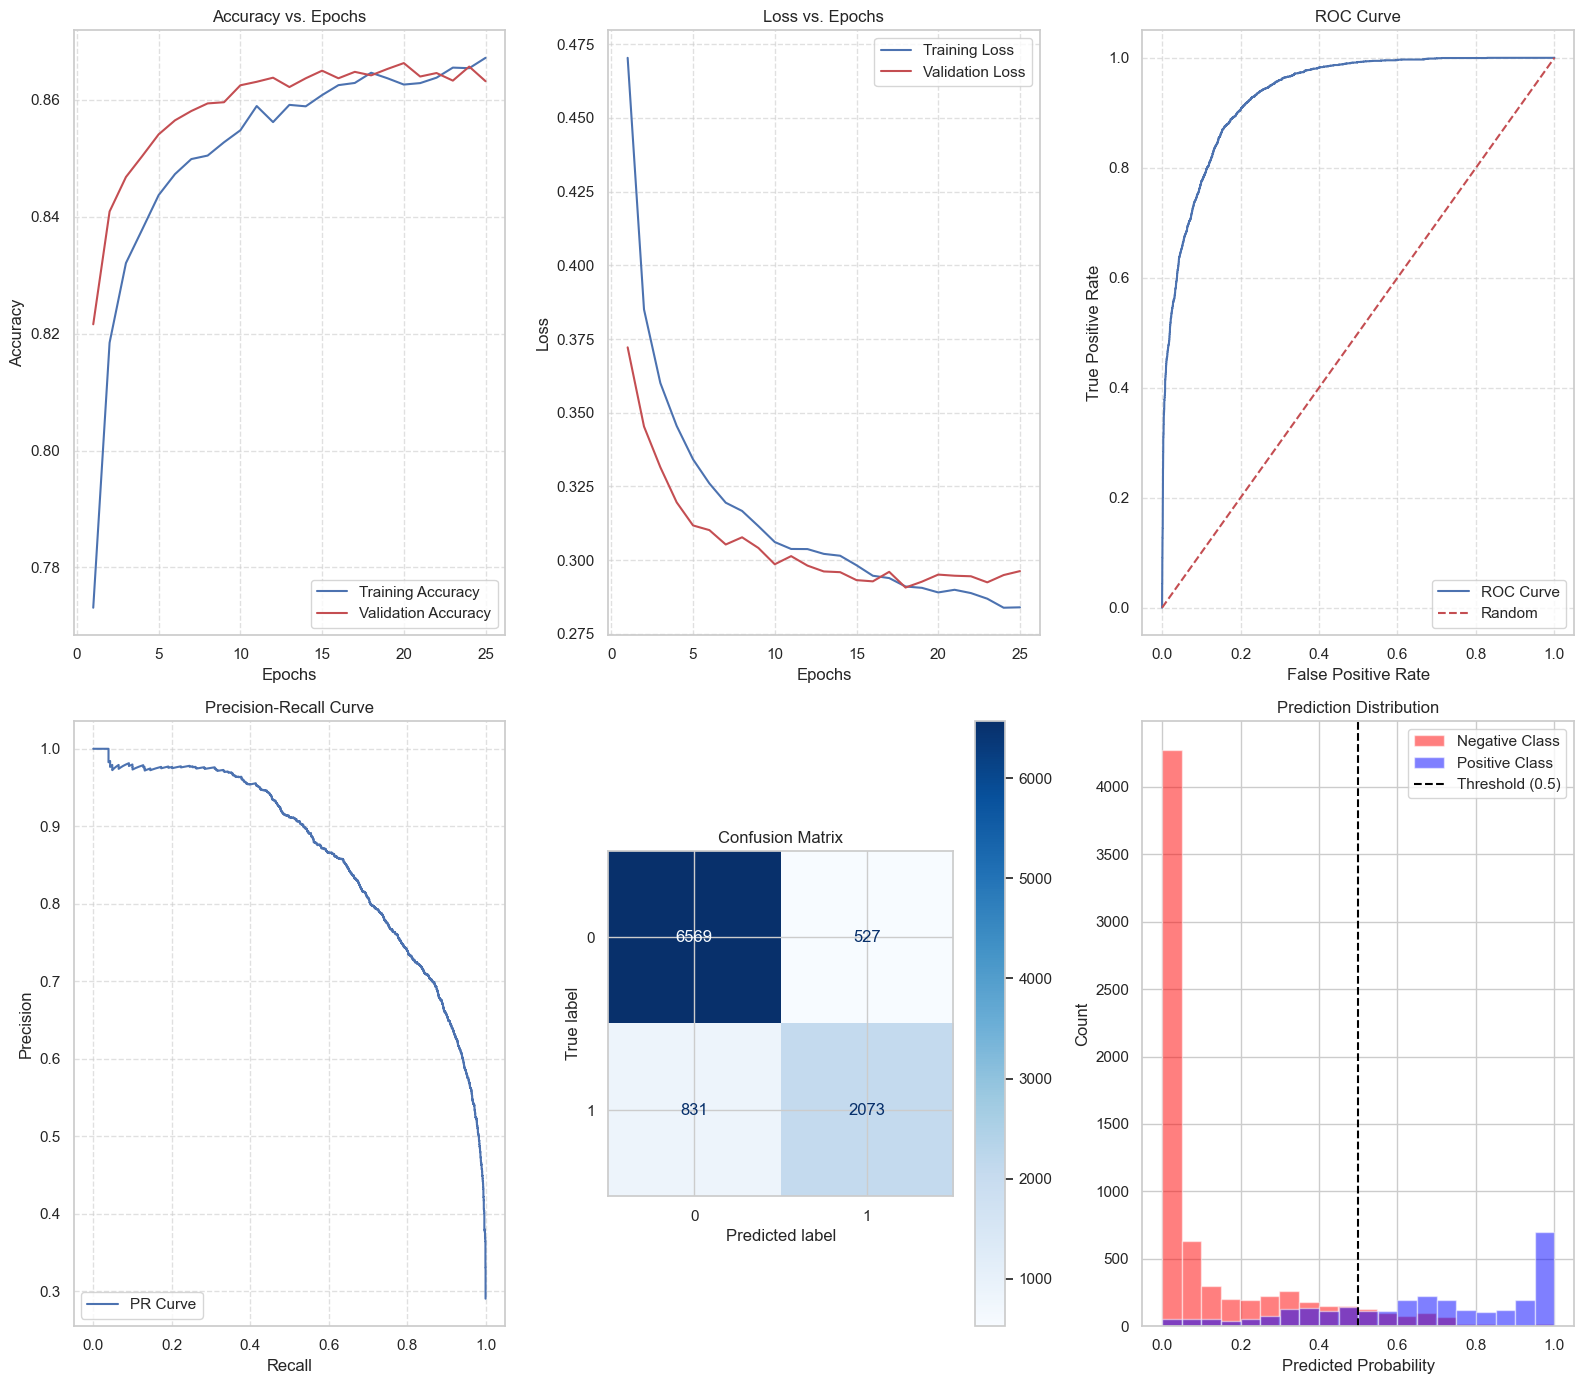

Classification Threshold: 0.5
True Positives: 2073
False Positives: 527
True Negatives: 6569
False Negatives: 831
Accuracy: 0.8642
Recall: 0.7138
F1: 0.7533
Roc_auc: 0.8198
Mse: 0.1358


In [385]:
# Función para la evaluación completa
def plot_nn_evaluation(best_model, best_history, X_test, y_test, threshold=0.5, figsize=(16, 14)):
    """
    Create comprehensive evaluation plots for a neural network model.
    
    Parameters:
    -----------
    best_model : keras.Model
        The trained neural network model
    best_history : keras.callbacks.History
        History object from model training
    X_test : array-like
        Test features
    y_test : array-like
        Test labels
    figsize : tuple, optional
        Figure size (width, height)
    """
    history = best_history.history
    accuracy = history['accuracy']
    loss = history['loss']
    val_accuracy = history['val_accuracy']
    val_loss = history['val_loss']
    epochs = range(1, len(accuracy) + 1)
    
    # Make predictions
    y_pred_prob = best_model.predict(X_test)
    y_pred = (y_pred_prob > threshold).astype(int)

    test_accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results_dict = {'accuracy': test_accuracy, 'recall': recall, 'f1': f1, 'roc_auc': roc_auc, 'mse': mse}
    
    # Create figure with subplots
    fig = plt.figure(figsize=figsize)
    
    # Plot 1: Accuracy vs Epochs
    ax1 = fig.add_subplot(2, 3, 1)
    ax1.plot(epochs, accuracy, 'b-', label='Training Accuracy')
    ax1.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.set_title('Accuracy vs. Epochs')
    ax1.legend()
    ax1.grid(True, linestyle='--', alpha=0.6)
    
    # Plot 2: Loss vs Epochs
    ax2 = fig.add_subplot(2, 3, 2)
    ax2.plot(epochs, loss, 'b-', label='Training Loss')
    ax2.plot(epochs, val_loss, 'r-', label='Validation Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.set_title('Loss vs. Epochs')
    ax2.legend()
    ax2.grid(True, linestyle='--', alpha=0.6)
    
    # Plot 3: ROC Curve
    ax3 = fig.add_subplot(2, 3, 3)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    ax3.plot(fpr, tpr, 'b-', label='ROC Curve')
    ax3.plot([0, 1], [0, 1], 'r--', label='Random')
    ax3.set_xlabel('False Positive Rate')
    ax3.set_ylabel('True Positive Rate')
    ax3.set_title('ROC Curve')
    ax3.legend()
    ax3.grid(True, linestyle='--', alpha=0.6)
    
    # Plot 4: Precision-Recall Curve
    ax4 = fig.add_subplot(2, 3, 4)
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    ax4.plot(recall, precision, 'b-', label='PR Curve')
    ax4.set_xlabel('Recall')
    ax4.set_ylabel('Precision')
    ax4.set_title('Precision-Recall Curve')
    ax4.legend(loc='lower left')
    ax4.grid(True, linestyle='--', alpha=0.6)
    
    # Plot 5: Confusion Matrix
    ax5 = fig.add_subplot(2, 3, 5)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax5, cmap='Blues', values_format='d')
    ax5.set_title('Confusion Matrix')
    
    # Plot 6: Histogram of Predictions
    ax6 = fig.add_subplot(2, 3, 6)
    ax6.hist(y_pred_prob[y_test == 0], bins=20, alpha=0.5, label='Negative Class', color='red')
    ax6.hist(y_pred_prob[y_test == 1], bins=20, alpha=0.5, label='Positive Class', color='blue')
    ax6.axvline(x=threshold, color='black', linestyle='--', label=f"Threshold ({threshold})")
    ax6.set_xlabel('Predicted Probability')
    ax6.set_ylabel('Count')
    ax6.set_title('Prediction Distribution')
    ax6.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print additional metrics
    print(f"Classification Threshold: {threshold}")
    print(f"True Positives: {cm[1][1]}")
    print(f"False Positives: {cm[0][1]}")
    print(f"True Negatives: {cm[0][0]}")
    print(f"False Negatives: {cm[1][0]}")
    for metric, value in results_dict.items():
        print(f"{metric.capitalize()}: {value:.4f}")

# Llamada a la función para graficar la evaluación del modelo
plot_nn_evaluation(model, history, X_test, y_test, threshold=0.5)


In [38]:
df_transformed['Mas_1_coche_True'].describe()

count    50000.000000
mean         0.290400
std          0.453951
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Mas_1_coche_True, dtype: float64

## 3.2 Cross Validation

In [389]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Suponiendo que ya tienes tus datos en df_transformed
y = df_transformed['Mas_1_coche_True']
X = df_transformed.drop(columns=['Mas_1_coche_True'])  # Variables predictoras (eliminamos la columna objetivo)

# Número de pliegues para la validación cruzada
n_splits = 5
kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Listas para almacenar las métricas
accuracy_scores = []
precision_scores = []
recall_scores = []
roc_auc_scores = []

# Iterar sobre los pliegues
for fold, (train_idx, val_idx) in enumerate(kfold.split(X, y)):
    print(f'Fold {fold + 1}/{n_splits}')
    
    # Dividir los datos en entrenamiento y validación para este pliegue
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    # 🔹 Construcción del modelo de Red Neuronal
    model = Sequential([
        Dense(128, input_shape=(X_train.shape[1],)),  # Capa de entrada
        LeakyReLU(alpha=0.01),
        Dropout(0.5),

        Dense(64),
        LeakyReLU(alpha=0.01),
        Dropout(0.3),

        Dense(32),
        LeakyReLU(alpha=0.01),
        Dropout(0.2),

        Dense(16),
        LeakyReLU(alpha=0.01),
        Dropout(0.1),

        Dense(1, activation='sigmoid')  # Capa de salida
    ])

    # Compilar el modelo
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Configurar EarlyStopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # 🔹 Entrenar el modelo
    history = model.fit(X_train, y_train,
                        epochs=25,
                        batch_size=32,
                        validation_data=(X_val, y_val),
                        callbacks=[early_stopping],
                        verbose=1)  # verbose=1 para ver el progreso

    # Predecir en el conjunto de validación
    y_pred_prob = model.predict(X_val, verbose=0)
    y_pred = (y_pred_prob > 0.5).astype(int)  # Convertir probabilidades a etiquetas binarias

    # Calcular métricas
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred_prob)

    # Almacenar métricas
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    roc_auc_scores.append(roc_auc)

    print(f'Fold {fold + 1} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, ROC-AUC: {roc_auc:.4f}\n')

# Calcular y mostrar los promedios y desviaciones estándar de las métricas
print('Resultados de la Validación Cruzada:')
print(f'Accuracy: {np.mean(accuracy_scores):.4f} (±{np.std(accuracy_scores):.4f})')
print(f'Precision: {np.mean(precision_scores):.4f} (±{np.std(precision_scores):.4f})')
print(f'Recall: {np.mean(recall_scores):.4f} (±{np.std(recall_scores):.4f})')
print(f'ROC-AUC: {np.mean(roc_auc_scores):.4f} (±{np.std(roc_auc_scores):.4f})')

Fold 1/5


c:\Users\Usuario\Desktop\UAX_3\SegundoCutrimestre\Redes Neuronales\Actividad_1\venv-deep-learning\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Usuario\Desktop\UAX_3\SegundoCutrimestre\Redes Neuronales\Actividad_1\venv-deep-learning\lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7276 - loss: 0.5325 - val_accuracy: 0.8158 - val_loss: 0.3751
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8164 - loss: 0.3921 - val_accuracy: 0.8383 - val_loss: 0.3463
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8285 - loss: 0.3634 - val_accuracy: 0.8449 - val_loss: 0.3294
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8390 - loss: 0.3453 - val_accuracy: 0.8467 - val_loss: 0.3217
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8422 - loss: 0.3369 - val_accuracy: 0.8534 - val_loss: 0.3148
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8482 - loss: 0.3257 - val_accuracy: 0.8548 - val_loss: 0.3089
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8514 - loss: 0.3152 - val_accuracy: 0.8546 - val_loss: 0.3099
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8541 - loss: 0.3095 - 

c:\Users\Usuario\Desktop\UAX_3\SegundoCutrimestre\Redes Neuronales\Actividad_1\venv-deep-learning\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Usuario\Desktop\UAX_3\SegundoCutrimestre\Redes Neuronales\Actividad_1\venv-deep-learning\lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7306 - loss: 0.5366 - val_accuracy: 0.8207 - val_loss: 0.3793
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8172 - loss: 0.3959 - val_accuracy: 0.8375 - val_loss: 0.3461
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8291 - loss: 0.3633 - val_accuracy: 0.8421 - val_loss: 0.3294
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8402 - loss: 0.3477 - val_accuracy: 0.8429 - val_loss: 0.3196
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8441 - loss: 0.3359 - val_accuracy: 0.8479 - val_loss: 0.3161
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8486 - loss: 0.3284 - val_accuracy: 0.8497 - val_loss: 0.3134
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8509 - loss: 0.3235 - val_accuracy: 0.8531 - val_loss: 0.3088
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8540 - loss: 0.3172 - val_accurac

c:\Users\Usuario\Desktop\UAX_3\SegundoCutrimestre\Redes Neuronales\Actividad_1\venv-deep-learning\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Usuario\Desktop\UAX_3\SegundoCutrimestre\Redes Neuronales\Actividad_1\venv-deep-learning\lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7338 - loss: 0.5278 - val_accuracy: 0.8268 - val_loss: 0.3616
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8192 - loss: 0.3928 - val_accuracy: 0.8410 - val_loss: 0.3363
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8306 - loss: 0.3662 - val_accuracy: 0.8450 - val_loss: 0.3280
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8383 - loss: 0.3465 - val_accuracy: 0.8504 - val_loss: 0.3146
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8418 - loss: 0.3322 - val_accuracy: 0.8557 - val_loss: 0.3058
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8476 - loss: 0.3303 - val_accuracy: 0.8550 - val_loss: 0.3077
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8504 - loss: 0.3201 - val_accuracy: 0.8572 - val_loss: 0.3028
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8536 - loss: 0.3171 - val_accurac

c:\Users\Usuario\Desktop\UAX_3\SegundoCutrimestre\Redes Neuronales\Actividad_1\venv-deep-learning\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Usuario\Desktop\UAX_3\SegundoCutrimestre\Redes Neuronales\Actividad_1\venv-deep-learning\lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7474 - loss: 0.5232 - val_accuracy: 0.8211 - val_loss: 0.3745
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8177 - loss: 0.3967 - val_accuracy: 0.8376 - val_loss: 0.3459
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8309 - loss: 0.3659 - val_accuracy: 0.8416 - val_loss: 0.3303
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8380 - loss: 0.3435 - val_accuracy: 0.8486 - val_loss: 0.3150
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8439 - loss: 0.3341 - val_accuracy: 0.8521 - val_loss: 0.3126
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8495 - loss: 0.3276 - val_accuracy: 0.8565 - val_loss: 0.3103
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8534 - loss: 0.3161 - val_accuracy: 0.8571 - val_loss: 0.3012
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8543 - loss: 0.3122 - val_accurac

c:\Users\Usuario\Desktop\UAX_3\SegundoCutrimestre\Redes Neuronales\Actividad_1\venv-deep-learning\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Usuario\Desktop\UAX_3\SegundoCutrimestre\Redes Neuronales\Actividad_1\venv-deep-learning\lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7397 - loss: 0.5280 - val_accuracy: 0.8245 - val_loss: 0.3802
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8194 - loss: 0.3889 - val_accuracy: 0.8420 - val_loss: 0.3473
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8294 - loss: 0.3635 - val_accuracy: 0.8432 - val_loss: 0.3282
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8384 - loss: 0.3437 - val_accuracy: 0.8444 - val_loss: 0.3267
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8400 - loss: 0.3385 - val_accuracy: 0.8515 - val_loss: 0.3160
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8480 - loss: 0.3234 - val_accuracy: 0.8480 - val_loss: 0.3195
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8513 - loss: 0.3184 - val_accuracy: 0.8562 - val_loss: 0.3103
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8547 - loss: 0.3127 - val_accurac

# 4. Modelo de Clasifiación | XGBoost

In [390]:
import xgboost as xgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Configuración visual
sns.set_style("whitegrid")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
import xgboost as xgb
from xgboost import XGBClassifier

# Extraer la variable target y las características
# ------------------------------------------------
y = df_transformed['Mas_1_coche_True']
X = df_transformed.drop(columns=['Mas_1_coche_True'])

# Dividir los datos en entrenamiento y prueba
# --------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Definir el modelo XGBoost
# -------------------------
model_xgb = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False,
    learning_rate=0.01,
    max_depth=6,
    n_estimators=1000,  # Aumentamos n_estimators con early stopping
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    early_stopping_rounds=10,  # Detener si no mejora en 10 rondas
    verbosity=1
)

# Entrenar el modelo con un conjunto de validación
eval_set = [(X_test, y_test)]
model_xgb.fit(
    X_train, y_train,
    eval_set=eval_set,
    verbose=False
)

# Predecir en el conjunto de prueba
y_pred = model_xgb.predict(X_test)
y_pred_prob = model_xgb.predict_proba(X_test)[:, 1]  # Probabilidades para ROC-AUC

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Mostrar resultados
print('Resultados en el conjunto de prueba:')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')

c:\Users\Usuario\Desktop\UAX_3\SegundoCutrimestre\Redes Neuronales\Actividad_1\venv-deep-learning\lib\site-packages\xgboost\core.py:158: UserWarning: [19:42:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Resultados en el conjunto de prueba:
Accuracy: 0.8695
Precision: 0.8122
Recall: 0.7163
ROC-AUC: 0.9450


## 4.1 Métricas 

In [405]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, mean_squared_error
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay
import xgboost as xgb

def plot_xgb_evaluation(best_model, X_test, y_test, threshold, figsize=(16, 14)):
    """
    Create comprehensive evaluation plots for an XGBoost model.
    
    Parameters:
    -----------
    best_model : xgboost.XGBClassifier
        The trained XGBoost model
    X_test : array-like
        Test features
    y_test : array-like
        Test labels
    threshold : float
        The decision threshold for classification
    figsize : tuple, optional
        Figure size (width, height)
    """
    # Make predictions
    y_pred_prob = best_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
    y_pred = (y_pred_prob > threshold).astype(int)
    
    # Calculate metrics
    test_accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results_dict = {'accuracy': test_accuracy, 'recall': recall, 'f1': f1, 'roc_auc': roc_auc, 'mse': mse}

    # Create figure with subplots
    fig = plt.figure(figsize=figsize)
    
    # Plot 1: Feature Importance
    ax1 = fig.add_subplot(2, 3, 1)
    importances = best_model.feature_importances_
    indices = importances.argsort()[::-1]
    
    # Get feature names if available, otherwise use indices
    try:
        feature_names = X_test.columns
    except AttributeError:
        feature_names = [f"Feature {i}" for i in range(X_test.shape[1])]
    
    # Show top 10 features
    top_n = min(10, len(importances))
    top_indices = indices[:top_n]
    ax1.barh(range(top_n), importances[top_indices])
    ax1.set_yticks(range(top_n))
    ax1.set_yticklabels([feature_names[i] for i in top_indices])
    ax1.set_title('Top Feature Importance')
    ax1.set_xlabel('Importance')
    
    # Plot 2: Learning Curve (if available from evals_result)
    ax2 = fig.add_subplot(2, 3, 2)
    try:
        results = best_model.evals_result()
        boosting_rounds = len(results['validation_0']['logloss'])
        x_axis = range(0, boosting_rounds)
        ax2.plot(x_axis, results['validation_0']['logloss'], 'b-', label='Train')
        ax2.plot(x_axis, results['validation_1']['logloss'], 'r-', label='Validation')
        ax2.set_xlabel('Boosting Rounds')
        ax2.set_ylabel('Log Loss')
        ax2.set_title('XGBoost Learning Curve')
        ax2.legend()
        ax2.grid(True, linestyle='--', alpha=0.6)
    except (AttributeError, KeyError):
        ax2.text(0.5, 0.5, 'Learning curve not available', 
                 horizontalalignment='center', verticalalignment='center')
    
    # Plot 3: ROC Curve
    ax3 = fig.add_subplot(2, 3, 3)
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    ax3.plot(fpr, tpr, 'b-', label='ROC Curve')
    ax3.plot([0, 1], [0, 1], 'r--', label='Random')
    ax3.set_xlabel('False Positive Rate')
    ax3.set_ylabel('True Positive Rate')
    ax3.set_title('ROC Curve')
    ax3.legend()
    ax3.grid(True, linestyle='--', alpha=0.6)
    
    # Plot 4: Precision-Recall Curve
    ax4 = fig.add_subplot(2, 3, 4)
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    ax4.plot(recall, precision, 'b-', label='PR Curve')
    ax4.set_xlabel('Recall')
    ax4.set_ylabel('Precision')
    ax4.set_title('Precision-Recall Curve')
    ax4.legend(loc='lower left')
    ax4.grid(True, linestyle='--', alpha=0.6)
    
    # Plot 5: Confusion Matrix
    ax5 = fig.add_subplot(2, 3, 5)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax5, cmap='Blues', values_format='d')
    ax5.set_title('Confusion Matrix')
    
    # Plot 6: Histogram of Predictions
    ax6 = fig.add_subplot(2, 3, 6)
    ax6.hist(y_pred_prob[y_test == 0], bins=20, alpha=0.5, label='Negative Class', color='red')
    ax6.hist(y_pred_prob[y_test == 1], bins=20, alpha=0.5, label='Positive Class', color='blue')
    ax6.axvline(x=threshold, color='black', linestyle='--', label=f"Threshold ({threshold})")
    ax6.set_xlabel('Predicted Probability')
    ax6.set_ylabel('Count')
    ax6.set_title('Prediction Distribution')
    ax6.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print additional metrics
    print(f"Classification Threshold: {threshold}")
    print(f"True Positives: {cm[1][1]}")
    print(f"False Positives: {cm[0][1]}")
    print(f"True Negatives: {cm[0][0]}")
    print(f"False Negatives: {cm[1][0]}")
    for metric, value in results_dict.items():
        print(f"{metric.capitalize()}: {value:.4f}")



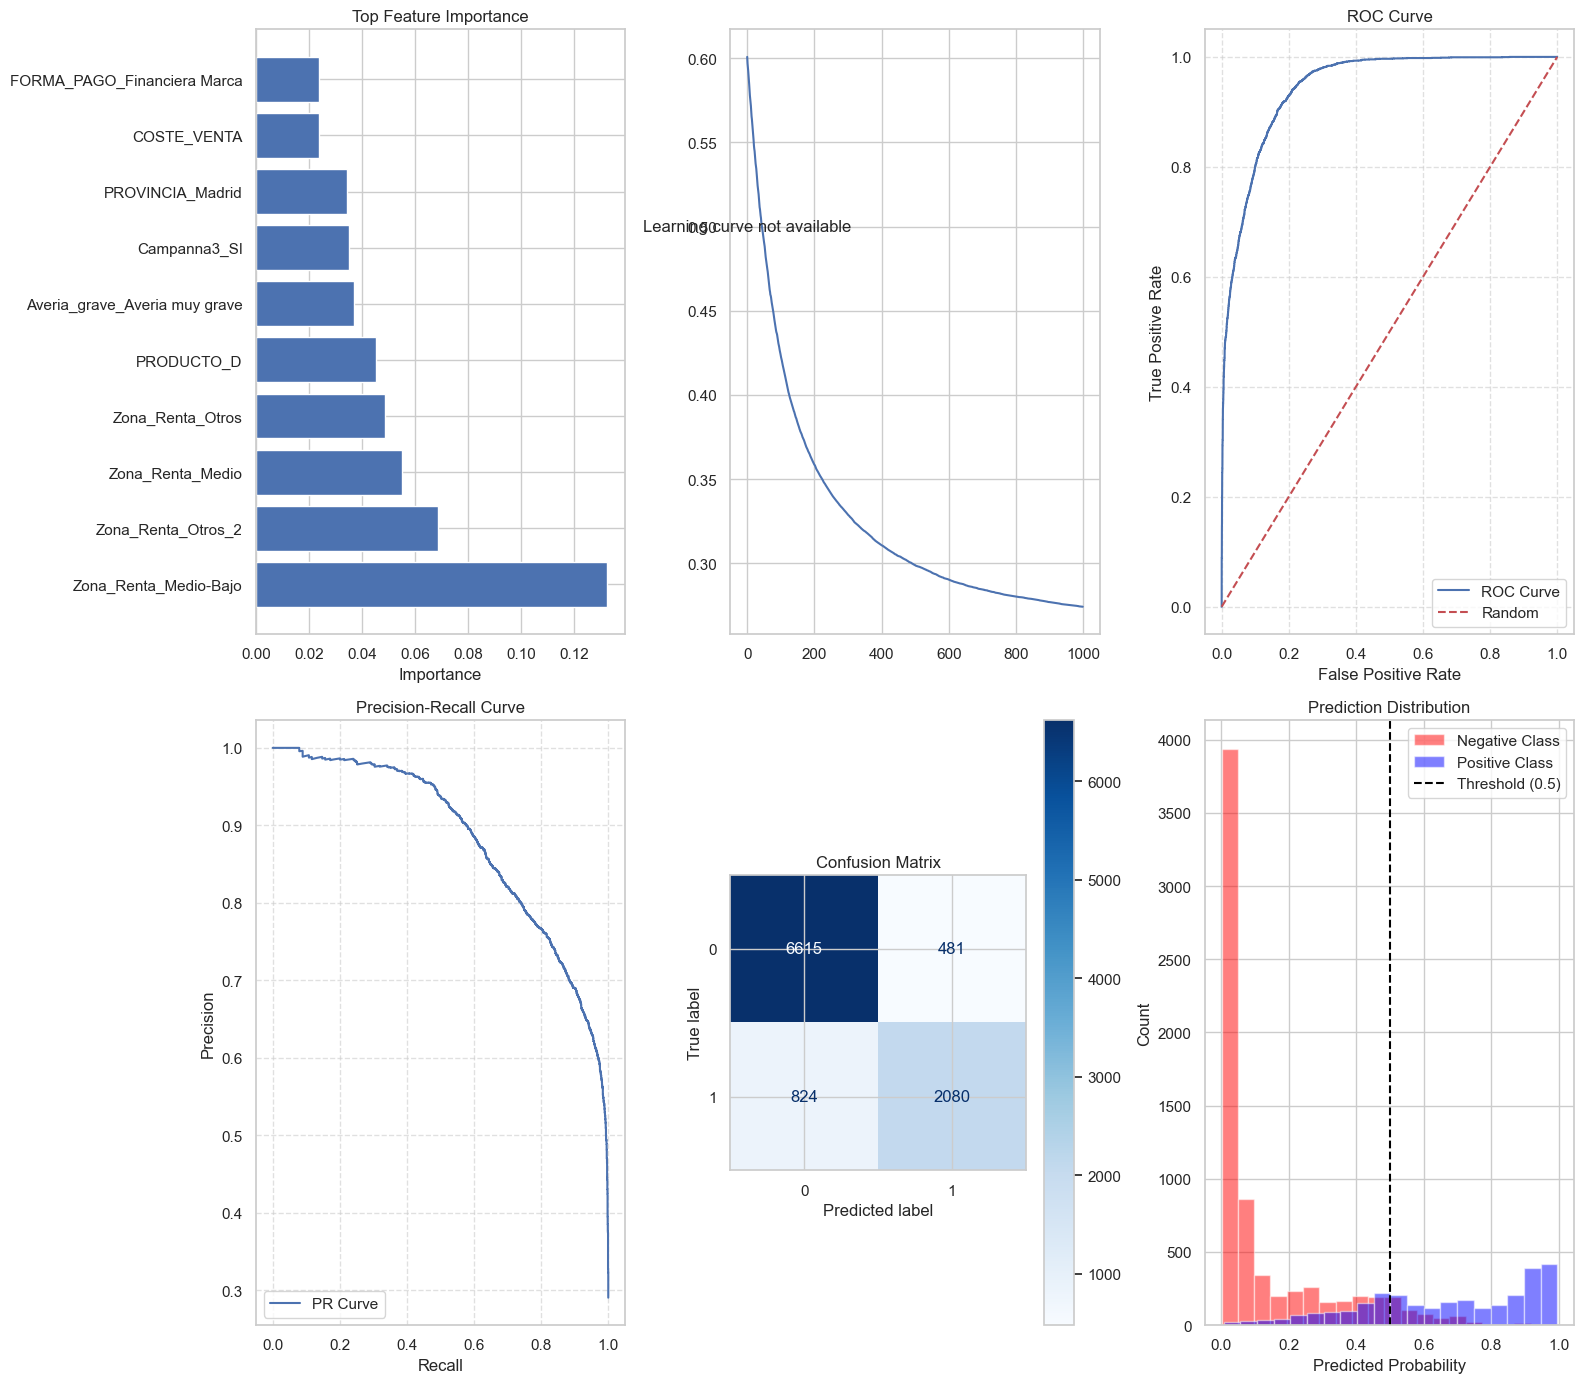

Classification Threshold: 0.5
True Positives: 2080
False Positives: 481
True Negatives: 6615
False Negatives: 824
Accuracy: 0.8695
Recall: 0.7163
F1: 0.7612
Roc_auc: 0.8242
Mse: 0.1305


In [422]:
plot_xgb_evaluation(best_model=model_xgb, X_test=X_test, y_test=y_test, threshold=0.5)


## 4.2 Cross Validation

Fold 1/5


c:\Users\Usuario\Desktop\UAX_3\SegundoCutrimestre\Redes Neuronales\Actividad_1\venv-deep-learning\lib\site-packages\xgboost\core.py:158: UserWarning: [19:37:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 1 - Accuracy: 0.8677, Precision: 0.8166, Recall: 0.7021, ROC-AUC: 0.9434

Fold 2/5


c:\Users\Usuario\Desktop\UAX_3\SegundoCutrimestre\Redes Neuronales\Actividad_1\venv-deep-learning\lib\site-packages\xgboost\core.py:158: UserWarning: [19:38:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 2 - Accuracy: 0.8638, Precision: 0.8026, Recall: 0.7042, ROC-AUC: 0.9432

Fold 3/5


c:\Users\Usuario\Desktop\UAX_3\SegundoCutrimestre\Redes Neuronales\Actividad_1\venv-deep-learning\lib\site-packages\xgboost\core.py:158: UserWarning: [19:38:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 3 - Accuracy: 0.8635, Precision: 0.8016, Recall: 0.7042, ROC-AUC: 0.9446

Fold 4/5


c:\Users\Usuario\Desktop\UAX_3\SegundoCutrimestre\Redes Neuronales\Actividad_1\venv-deep-learning\lib\site-packages\xgboost\core.py:158: UserWarning: [19:38:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 4 - Accuracy: 0.8665, Precision: 0.8085, Recall: 0.7080, ROC-AUC: 0.9460

Fold 5/5


c:\Users\Usuario\Desktop\UAX_3\SegundoCutrimestre\Redes Neuronales\Actividad_1\venv-deep-learning\lib\site-packages\xgboost\core.py:158: UserWarning: [19:38:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 5 - Accuracy: 0.8684, Precision: 0.7967, Recall: 0.7342, ROC-AUC: 0.9441

Resultados de la Validación Cruzada:
Accuracy: 0.8660 (±0.0020)
Precision: 0.8052 (±0.0068)
Recall: 0.7105 (±0.0120)
ROC-AUC: 0.9442 (±0.0010)


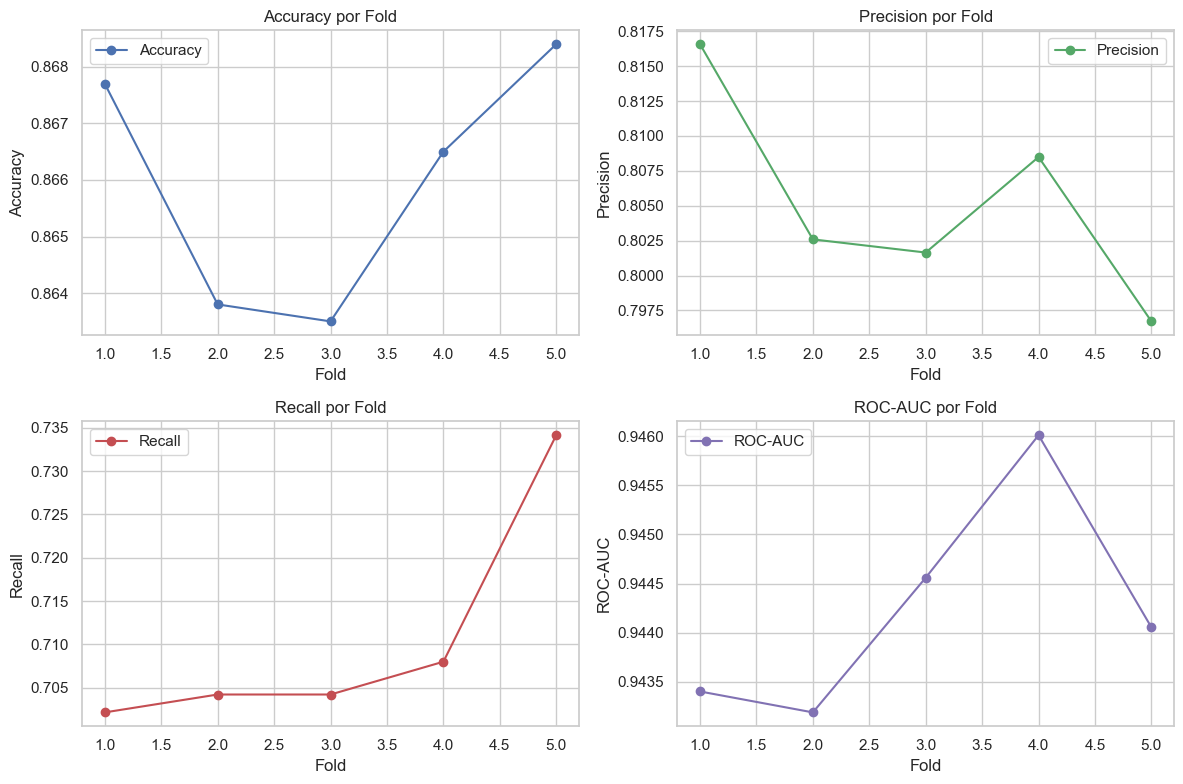

In [420]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
import xgboost as xgb
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Extraer la variable target y las características
y = df_transformed['Mas_1_coche_True']
X = df_transformed.drop(columns=['Mas_1_coche_True'])

# Configuración de la validación cruzada
n_splits = 5
kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Listas para almacenar las métricas
folds = list(range(1, n_splits + 1))  # Lista de pliegues para graficar
accuracy_scores = []
precision_scores = []
recall_scores = []
roc_auc_scores = []

# Iterar sobre los pliegues
for fold, (train_idx, val_idx) in enumerate(kfold.split(X, y)):
    print(f'Fold {fold + 1}/{n_splits}')
    
    # Dividir los datos en entrenamiento y validación para este pliegue
    X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
    y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]
    
    # Definir el modelo XGBoost
    model_xgb = XGBClassifier(
        objective="binary:logistic",
        eval_metric="logloss",
        use_label_encoder=False,
        learning_rate=0.01,
        max_depth=6,
        n_estimators=1000,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        early_stopping_rounds=10,
        verbosity=1
    )
    
    # Entrenar el modelo con un conjunto de validación
    eval_set = [(X_val_fold, y_val_fold)]
    model_xgb.fit(
        X_train_fold, y_train_fold,
        eval_set=eval_set,
        verbose=False
    )
    
    # Predecir en el conjunto de validación
    y_pred_fold = model_xgb.predict(X_val_fold)
    y_pred_prob_fold = model_xgb.predict_proba(X_val_fold)[:, 1]
    
    # Calcular métricas
    accuracy = accuracy_score(y_val_fold, y_pred_fold)
    precision = precision_score(y_val_fold, y_pred_fold)
    recall = recall_score(y_val_fold, y_pred_fold)
    roc_auc = roc_auc_score(y_val_fold, y_pred_prob_fold)
    
    # Almacenar métricas
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    roc_auc_scores.append(roc_auc)
    
    print(f'Fold {fold + 1} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, '
          f'Recall: {recall:.4f}, ROC-AUC: {roc_auc:.4f}\n')

# Calcular y mostrar los promedios y desviaciones estándar
print('Resultados de la Validación Cruzada:')
print(f'Accuracy: {np.mean(accuracy_scores):.4f} (±{np.std(accuracy_scores):.4f})')
print(f'Precision: {np.mean(precision_scores):.4f} (±{np.std(precision_scores):.4f})')
print(f'Recall: {np.mean(recall_scores):.4f} (±{np.std(recall_scores):.4f})')
print(f'ROC-AUC: {np.mean(roc_auc_scores):.4f} (±{np.std(roc_auc_scores):.4f})')

# 🔹 Graficar las métricas por fold
plt.figure(figsize=(12, 8))

# Graficar Accuracy
plt.subplot(2, 2, 1)
plt.plot(folds, accuracy_scores, marker='o', linestyle='-', color='b', label='Accuracy')
plt.title('Accuracy por Fold')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

# Graficar Precision
plt.subplot(2, 2, 2)
plt.plot(folds, precision_scores, marker='o', linestyle='-', color='g', label='Precision')
plt.title('Precision por Fold')
plt.xlabel('Fold')
plt.ylabel('Precision')
plt.grid(True)
plt.legend()

# Graficar Recall
plt.subplot(2, 2, 3)
plt.plot(folds, recall_scores, marker='o', linestyle='-', color='r', label='Recall')
plt.title('Recall por Fold')
plt.xlabel('Fold')
plt.ylabel('Recall')
plt.grid(True)
plt.legend()

# Graficar ROC-AUC
plt.subplot(2, 2, 4)
plt.plot(folds, roc_auc_scores, marker='o', linestyle='-', color='m', label='ROC-AUC')
plt.title('ROC-AUC por Fold')
plt.xlabel('Fold')
plt.ylabel('ROC-AUC')
plt.grid(True)
plt.legend()

# Ajustar el diseño para evitar solapamiento
plt.tight_layout()
plt.show()



 # 5. Modelo de regresión | Perceptrón multicapa

In [442]:
df_transformed_regresor

PRODUCTO_B  PRODUCTO_C  PRODUCTO_D  PRODUCTO_E  PRODUCTO_F  PRODUCTO_G  \
0             0.0         0.0         0.0         0.0         0.0         0.0   
1             0.0         0.0         0.0         0.0         0.0         0.0   
2             0.0         0.0         0.0         0.0         0.0         0.0   
3             0.0         0.0         0.0         0.0         0.0         0.0   
4             0.0         0.0         0.0         0.0         0.0         0.0   
...           ...         ...         ...         ...         ...         ...   
49995         0.0         0.0         1.0         0.0         0.0         0.0   
49996         0.0         0.0         1.0         0.0         0.0         0.0   
49997         0.0         0.0         1.0         0.0         0.0         0.0   
49998         0.0         0.0         1.0         0.0         0.0         0.0   
49999         0.0         0.0         1.0         0.0         0.0         0.0   

       PRODUCTO_H  PRODUCTO_I  PRODUCTO_J  PRODUCTO_K  TIPO_CARROCERIA_TIPO2  \
0             0.0         0.0         0.0         0.0                    0.0   
1             0.0         0.0         0.0         0.0                    0.0   
2             0.0         0.0         0.0         0.0                    0.0   
3             0.0         0.0         0.0         0.0                    0.0   
4             0.0         0.0         0.0         0.0                    0.0   
...           ...         ...         ...         ...                    ...   
49995         0.0         0.0         0.0         0.0                    0.0   
49996         0.0         0.0         0.0         0.0                    0.0   
49997         0.0         0.0         0.0         0.0                    0.0   
49998         0.0         0.0         0.0         0.0                    0.0   
49999         0.0         0.0         0.0         0.0                    0.0   

       TIPO_CARROCERIA_TIPO3  TIPO_CARROCERIA_TIPO4  TIPO_CARROCERIA_TIPO5  \
0                        0.0                    0.0                    0.0   
1                        0.0                    0.0                    0.0   
2                        0.0                    0.0                    0.0   
3                        0.0                    0.0                    0.0   
4                        0.0                    0.0                    0.0   
...                      ...                    ...                    ...   
49995                    0.0                    0.0                    0.0   
49996                    0.0                    0.0                    0.0   
49997                    0.0                    0.0                    0.0   
49998                    0.0                    0.0                    0.0   
49999                    0.0                    0.0                    0.0   

       TIPO_CARROCERIA_TIPO6  TIPO_CARROCERIA_TIPO7  TIPO_CARROCERIA_TIPO8  \
0                        0.0                    0.0                    0.0   
1                        0.0                    0.0                    0.0   
2                        0.0                    0.0                    0.0   
3                        0.0                    0.0                    0.0   
4                        0.0                    0.0                    0.0   
...                      ...                    ...                    ...   
49995                    0.0                    0.0                    0.0   
49996                    0.0                    0.0                    0.0   
49997                    0.0                    0.0                    0.0   
49998                    0.0                    0.0                    0.0   
49999                    0.0                    0.0                    0.0   

       COMBUSTIBLE_FUEL 2  TRANS_M  FORMA_PAGO_Financiera Banco  \
0                     0.0      1.0                          0.0   
1                     0.0      1.0                          0.0  

In [37]:
# Extraer la columna 'Tiempo' del DataFrame filtrado
filtered_df = df_transformed_regresor[df_transformed_regresor['Mas_1_coche_True'] == 1]
y = filtered_df['Tiempo']
X = filtered_df.drop(columns=['Tiempo', 'Mas_1_coche_True'])
y.describe()

count    14520.000000
mean         6.362397
std          1.999502
min          2.000000
25%          5.000000
50%          6.000000
75%          8.000000
max         14.000000
Name: Tiempo, dtype: float64

c:\Users\Usuario\Desktop\UAX_3\SegundoCutrimestre\Redes Neuronales\Actividad_1\venv-deep-learning\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Usuario\Desktop\UAX_3\SegundoCutrimestre\Redes Neuronales\Actividad_1\venv-deep-learning\lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/25
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.9214 - mae: 0.7793 - val_loss: 0.4643 - val_mae: 0.5481
Epoch 2/25
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5291 - mae: 0.5844 - val_loss: 0.3875 - val_mae: 0.4884
Epoch 3/25
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4479 - mae: 0.5278 - val_loss: 0.3364 - val_mae: 0.4392
Epoch 4/25
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3962 - mae: 0.4867 - val_loss: 0.2872 - val_mae: 0.3962
Epoch 5/25
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3432 - mae: 0.4439 - val_loss: 0.2667 - val_mae: 0.3896
Epoch 6/25
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2906 - mae: 0.4034 - val_loss: 0.2395 - val_mae: 0.3629
Epoch 7/25
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2692 - mae: 0.3867 - val_loss: 0.2253 - val_mae: 0.3465
Epoch 8/25
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2515 - mae: 0.3707 - val_loss: 0.2278 - val_mae: 0.3566
Epoch 9/25
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - lo

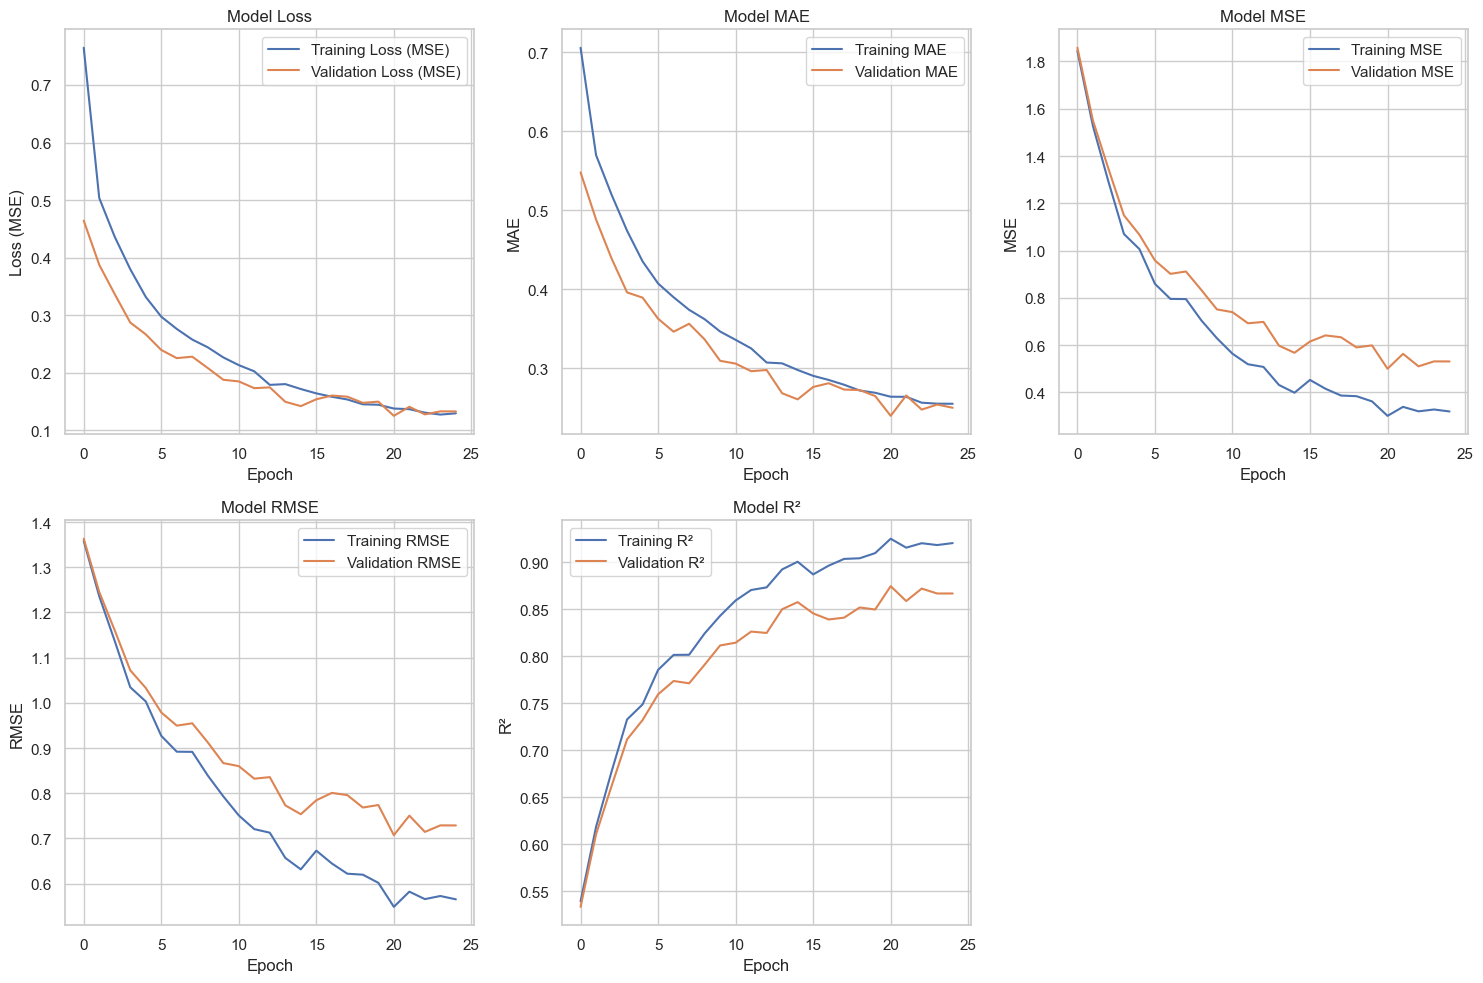

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, Dropout
from tensorflow.keras.callbacks import EarlyStopping, Callback
import matplotlib.pyplot as plt

# Extraer las variables predictoras y la variable objetivo y la columna 'Tiempo' del DataFrame filtrado
filtered_df = df_transformed_regresor[df_transformed_regresor['Mas_1_coche_True'] == 1]
y = filtered_df['Tiempo']
X = filtered_df.drop(columns=['Tiempo', 'Mas_1_coche_True'])

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.to_numpy().reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.to_numpy().reshape(-1, 1)).ravel()

# Callback personalizado para calcular métricas por época
class MetricsCallback(Callback):
    def __init__(self, X_val, y_val, scaler_y):
        super(MetricsCallback, self).__init__()
        self.X_val = X_val
        self.y_val = y_val
        self.scaler_y = scaler_y
        self.train_mse = []
        self.val_mse = []
        self.train_rmse = []
        self.val_rmse = []
        self.train_r2 = []
        self.val_r2 = []

    def on_epoch_end(self, epoch, logs=None):
        # Predicciones en el conjunto de entrenamiento
        y_train_pred_scaled = self.model.predict(X_train_scaled, verbose=0)
        y_train_pred = self.scaler_y.inverse_transform(y_train_pred_scaled)
        y_train_orig = self.scaler_y.inverse_transform(y_train_scaled.reshape(-1, 1)).ravel()

        # Predicciones en el conjunto de validación
        y_val_pred_scaled = self.model.predict(self.X_val, verbose=0)
        y_val_pred = self.scaler_y.inverse_transform(y_val_pred_scaled)
        y_val_orig = self.scaler_y.inverse_transform(self.y_val.reshape(-1, 1)).ravel()

        # Calcular métricas
        mse_train = mean_squared_error(y_train_orig, y_train_pred)
        rmse_train = np.sqrt(mse_train)
        r2_train = r2_score(y_train_orig, y_train_pred)

        mse_val = mean_squared_error(y_val_orig, y_val_pred)
        rmse_val = np.sqrt(mse_val)
        r2_val = r2_score(y_val_orig, y_val_pred)

        # Almacenar métricas
        self.train_mse.append(mse_train)
        self.val_mse.append(mse_val)
        self.train_rmse.append(rmse_train)
        self.val_rmse.append(rmse_val)
        self.train_r2.append(r2_train)
        self.val_r2.append(r2_val)

# Construcción del modelo MLP para regresión
model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],)),
    LeakyReLU(alpha=0.01),
    Dropout(0.3),
    Dense(64),
    LeakyReLU(alpha=0.01),
    Dropout(0.2),
    Dense(32),
    LeakyReLU(alpha=0.01),
    Dropout(0.1),
    Dense(16),
    LeakyReLU(alpha=0.01),
    Dropout(0.1),
    Dense(1)
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Configurar EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Crear instancia del callback de métricas
metrics_callback = MetricsCallback(X_test_scaled, y_test_scaled, scaler_y)

# Entrenar el modelo
history = model.fit(
    X_train_scaled, y_train_scaled,
    epochs=25,
    batch_size=32,
    validation_data=(X_test_scaled, y_test_scaled),
    callbacks=[early_stopping, metrics_callback],
    verbose=1
)

# Predecir en los conjuntos de entrenamiento y prueba
y_train_pred_scaled = model.predict(X_train_scaled)
y_test_pred_scaled = model.predict(X_test_scaled)

# Desescalar las predicciones y valores reales
y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled)
y_train_original = scaler_y.inverse_transform(y_train_scaled.reshape(-1, 1)).ravel()
y_test_original = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).ravel()

# Calcular métricas finales
mae_train = mean_absolute_error(y_train_original, y_train_pred)
mse_train = mean_squared_error(y_train_original, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train_original, y_train_pred)

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100 if np.any(mask) else np.nan

mape_train = mean_absolute_percentage_error(y_train_original, y_train_pred) if np.any(y_train_original != 0) else np.nan

mae_test = mean_absolute_error(y_test_original, y_test_pred)
mse_test = mean_squared_error(y_test_original, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test_original, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test_original, y_test_pred) if np.any(y_test_original != 0) else np.nan

# Imprimir métricas
print("\nMétricas en el conjunto de entrenamiento:")
print(f"MAE: {mae_train:.4f}")
print(f"MSE: {mse_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print(f"R²: {r2_train:.4f}")
print(f"MAPE: {mape_train:.2f}%")

print("\nMétricas en el conjunto de prueba:")
print(f"MAE: {mae_test:.4f}")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"R²: {r2_test:.4f}")
print(f"MAPE: {mape_test:.2f}%")

# Gráficas de las métricas
plt.figure(figsize=(15, 10))

# Model Loss (MSE)
plt.subplot(2, 3, 1)
plt.plot(history.history['loss'], label='Training Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)

# MAE
plt.subplot(2, 3, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

# MSE (calculado manualmente)
plt.subplot(2, 3, 3)
plt.plot(metrics_callback.train_mse, label='Training MSE')
plt.plot(metrics_callback.val_mse, label='Validation MSE')
plt.title('Model MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)

# RMSE (calculado manualmente)
plt.subplot(2, 3, 4)
plt.plot(metrics_callback.train_rmse, label='Training RMSE')
plt.plot(metrics_callback.val_rmse, label='Validation RMSE')
plt.title('Model RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)

# R² (calculado manualmente)
plt.subplot(2, 3, 5)
plt.plot(metrics_callback.train_r2, label='Training R²')
plt.plot(metrics_callback.val_r2, label='Validation R²')
plt.title('Model R²')
plt.xlabel('Epoch')
plt.ylabel('R²')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 6. Modelo de regresión | XGBoost

Forma de X: (50000, 101)
Forma de y: (50000,)
Tipos de datos de y: int64
Valores nulos en y: 0
[0]	train-rmse:3.07721	eval-rmse:3.06249
[1]	train-rmse:3.06471	eval-rmse:3.05018
[2]	train-rmse:3.05661	eval-rmse:3.04261
[3]	train-rmse:3.04768	eval-rmse:3.03424
[4]	train-rmse:3.03763	eval-rmse:3.02441
[5]	train-rmse:3.02844	eval-rmse:3.01496
[6]	train-rmse:3.01904	eval-rmse:3.00614
[7]	train-rmse:3.00794	eval-rmse:2.99525
[8]	train-rmse:2.99888	eval-rmse:2.98596
[9]	train-rmse:2.99341	eval-rmse:2.98059
[10]	train-rmse:2.98565	eval-rmse:2.97271
[11]	train-rmse:2.97821	eval-rmse:2.96571
[12]	train-rmse:2.96884	eval-rmse:2.95622
[13]	train-rmse:2.95819	eval-rmse:2.94567
[14]	train-rmse:2.95100	eval-rmse:2.93906
[15]	train-rmse:2.94178	eval-rmse:2.93036
[16]	train-rmse:2.93495	eval-rmse:2.92356
[17]	train-rmse:2.92712	eval-rmse:2.91617
[18]	train-rmse:2.91680	eval-rmse:2.90597
[19]	train-rmse:2.90669	eval-rmse:2.89605
[20]	train-rmse:2.89636	eval-rmse:2.88592
[21]	train-rmse:2.88870	eval-rmse

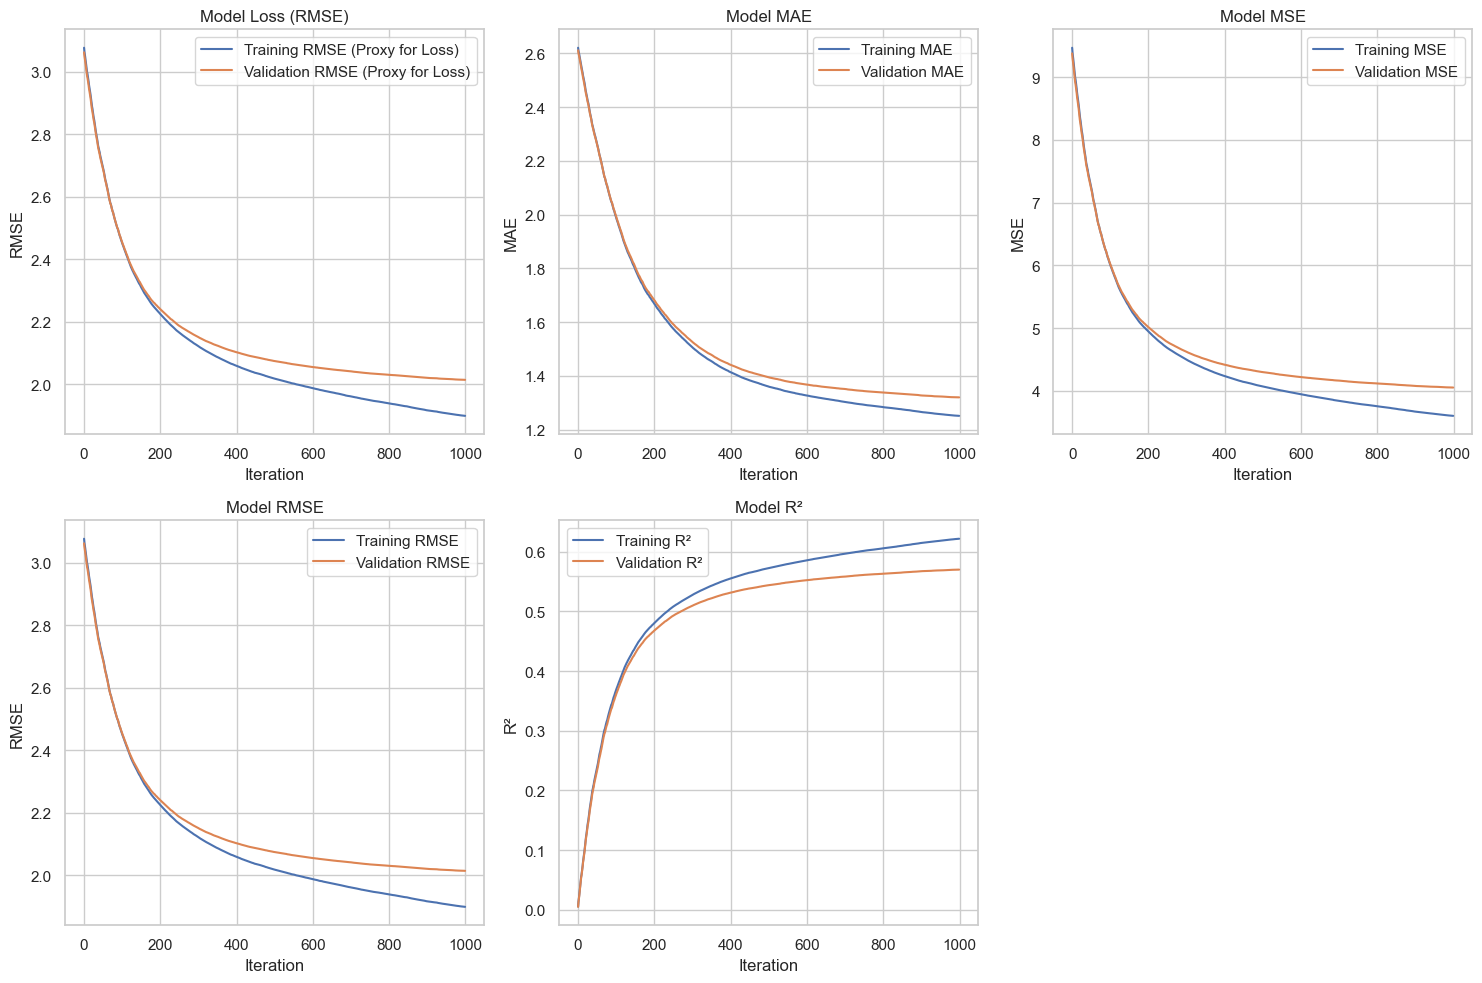

In [458]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
from xgboost.callback import TrainingCallback
import matplotlib.pyplot as plt

# Extraer las variables predictoras y la variable objetivo
X = df_transformed_regresor.drop(columns=['Tiempo', 'Mas_1_coche_True'])
y = df_transformed_regresor['Tiempo']

# Verificar y limpiar datos
print("Forma de X:", X.shape)
print("Forma de y:", y.shape)
print("Tipos de datos de y:", y.dtype)
print("Valores nulos en y:", y.isnull().sum())

# Convertir y a tipo numérico, manejando posibles errores
y = pd.to_numeric(y, errors='coerce')
if y.isnull().sum() > 0:
    print("Advertencia: Se encontraron valores no numéricos o nulos en 'Tiempo'. Rellenando NaN con la media.")
    y = y.fillna(y.mean())

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Convertir los datos a formato DMatrix
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

# Callback personalizado heredando de TrainingCallback
class MetricsCallback(TrainingCallback):
    def __init__(self, dtrain, dtest, y_train, y_test):
        self.dtrain = dtrain
        self.dtest = dtest
        self.y_train = y_train
        self.y_test = y_test
        self.train_mae = []
        self.val_mae = []
        self.train_mse = []
        self.val_mse = []
        self.train_rmse = []
        self.val_rmse = []
        self.train_r2 = []
        self.val_r2 = []
        self.iterations = []

    def after_iteration(self, model, epoch, evals_log):
        iteration = epoch
        self.iterations.append(iteration)

        # Predicciones en el conjunto de entrenamiento
        y_train_pred = model.predict(self.dtrain)
        mae_train = mean_absolute_error(self.y_train, y_train_pred)
        mse_train = mean_squared_error(self.y_train, y_train_pred)
        rmse_train = np.sqrt(mse_train)
        r2_train = r2_score(self.y_train, y_train_pred)

        # Predicciones en el conjunto de validación
        y_val_pred = model.predict(self.dtest)
        mae_val = mean_absolute_error(self.y_test, y_val_pred)
        mse_val = mean_squared_error(self.y_test, y_val_pred)
        rmse_val = np.sqrt(mse_val)
        r2_val = r2_score(self.y_test, y_val_pred)

        # Almacenar métricas
        self.train_mae.append(mae_train)
        self.val_mae.append(mae_val)
        self.train_mse.append(mse_train)
        self.val_mse.append(mse_val)
        self.train_rmse.append(rmse_train)
        self.val_rmse.append(rmse_val)
        self.train_r2.append(r2_train)
        self.val_r2.append(r2_val)
        return False  # False indica que no se detiene el entrenamiento

# Crear instancia del callback
metrics_callback = MetricsCallback(dtrain, dtest, y_train, y_test)

# Definir los parámetros de XGBoost
params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.01,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42,
    'eval_metric': 'rmse'
}

# Entrenar el modelo con xgboost.train y capturar evals_result
evals = [(dtrain, 'train'), (dtest, 'eval')]
evals_result = {}  # Diccionario para almacenar las métricas de evaluación
bst = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=10,
    evals_result=evals_result,  # Pasar el diccionario aquí
    callbacks=[metrics_callback],
    verbose_eval=True
)

# Predecir en los conjuntos de entrenamiento y prueba
y_train_pred = bst.predict(dtrain)
y_test_pred = bst.predict(dtest)

# Calcular métricas finales
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100 if np.any(mask) else np.nan

mape_train = mean_absolute_percentage_error(y_train, y_train_pred) if np.any(y_train != 0) else np.nan

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred) if np.any(y_test != 0) else np.nan

# Imprimir métricas
print("\nMétricas en el conjunto de entrenamiento:")
print(f"MAE: {mae_train:.4f}")
print(f"MSE: {mse_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print(f"R²: {r2_train:.4f}")
print(f"MAPE: {mape_train:.2f}%")

print("\nMétricas en el conjunto de prueba:")
print(f"MAE: {mae_test:.4f}")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"R²: {r2_test:.4f}")
print(f"MAPE: {mape_test:.2f}%")

# Gráficas de las métricas
plt.figure(figsize=(15, 10))

# Model Loss (usamos RMSE de evals_result como proxy para Loss)
plt.subplot(2, 3, 1)
plt.plot(evals_result['train']['rmse'], label='Training RMSE (Proxy for Loss)')
plt.plot(evals_result['eval']['rmse'], label='Validation RMSE (Proxy for Loss)')
plt.title('Model Loss (RMSE)')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)

# MAE
plt.subplot(2, 3, 2)
plt.plot(metrics_callback.iterations, metrics_callback.train_mae, label='Training MAE')
plt.plot(metrics_callback.iterations, metrics_callback.val_mae, label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Iteration')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

# MSE
plt.subplot(2, 3, 3)
plt.plot(metrics_callback.iterations, metrics_callback.train_mse, label='Training MSE')
plt.plot(metrics_callback.iterations, metrics_callback.val_mse, label='Validation MSE')
plt.title('Model MSE')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)

# RMSE
plt.subplot(2, 3, 4)
plt.plot(metrics_callback.iterations, metrics_callback.train_rmse, label='Training RMSE')
plt.plot(metrics_callback.iterations, metrics_callback.val_rmse, label='Validation RMSE')
plt.title('Model RMSE')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)

# R²
plt.subplot(2, 3, 5)
plt.plot(metrics_callback.iterations, metrics_callback.train_r2, label='Training R²')
plt.plot(metrics_callback.iterations, metrics_callback.val_r2, label='Validation R²')
plt.title('Model R²')
plt.xlabel('Iteration')
plt.ylabel('R²')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Ideas

- Validación cruzada
- Recuerda la segunda parte. Hacer  un intervalo en el tiempo, ya que no necesitamos un resutado preciso en el tiempo.
- LeakyRelu
- Métricas de la teoría.
- Dropaout que va bajando y utilizar earlystoper